In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
from time import sleep
import sys
#import disag_FSM

#from pyA20.gpio import gpio
#from pyA20.gpio import port

sys.path.insert(0,r'/home/elkin/Documents/Facenet')

import parking_utils
from parking_utils import disaggregator, init_bicycles, detect_event, update_station, assign_bicycle, n_point_df
from data import preprocessing

In [7]:
data_df = pd.read_excel(r'/home/elkin/Documents/Facenet/Prueba_parqueadero.xlsx', sheet_name='data')
data_df  = data_df.set_index('timestamp')
data_df.head()

date             time  app  rpp
timestamp                                          
1570713560108 2019-10-10  08:19:20.108000    0    0
1570713561618 2019-10-10  08:19:21.618000    0    0
1570713563085 2019-10-10  08:19:23.085000    0    0
1570713564274 2019-10-10  08:19:24.274000    0    0
1570713565607 2019-10-10  08:19:25.607000    0    0

2019-10-10 08:00:00
2019-10-10 14:00:00
1570712400000
1570734000000


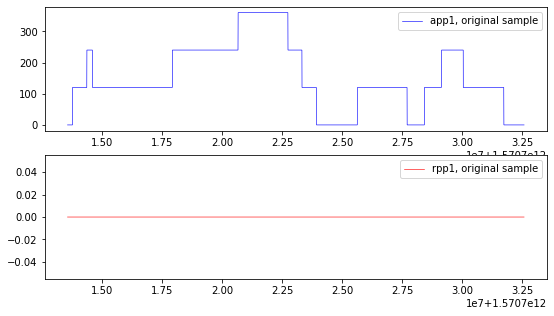

In [4]:
fig = plt.figure(figsize=(9, 5))

lw = 0.6

f_inicial = '191010'
h_inicial = '080000'
f_final = '191010'
h_final = '140000'

dt_inicial = datetime.strptime(f_inicial+h_inicial, '%y%m%d%H%M%S')
dt_final = datetime.strptime(f_final+h_final, '%y%m%d%H%M%S')

timestamp_inicial = int(datetime.timestamp(dt_inicial) * 1000)
timestamp_final = int(datetime.timestamp(dt_final) * 1000)

print (dt_inicial)
print (dt_final)
print (timestamp_inicial)
print (timestamp_final)

plt.subplot(211)
plt.plot(data_df['app'].loc[timestamp_inicial:timestamp_final],c='b',lw = lw, label = 'app1, original sample')
plt.legend()

plt.subplot(212)
plt.plot(data_df['rpp'].loc[timestamp_inicial:timestamp_final],c='r',lw = lw, label = 'rpp1, original sample')
plt.legend()

plt.show()

## Compactation preprocessing and training

In [20]:
#Filtering and denoising the data

In [8]:
processed_data = preprocessing(data_df, columns=['app','rpp'], m = 5)

In [11]:
disag = disaggregator()

## Real time simulation

In [27]:
start = time.time()

f_inicial = '191010'
h_inicial = '080000'
f_final = '191010'
h_final = '140000'

dt_inicial = datetime.strptime(f_inicial+h_inicial, '%y%m%d%H%M%S')
dt_final = datetime.strptime(f_final+h_final, '%y%m%d%H%M%S')

timestamp_inicial = int(datetime.timestamp(dt_inicial) * 1000)
timestamp_final = int(datetime.timestamp(dt_final) * 1000)

df_test = data_df[['app','rpp']].loc[timestamp_inicial:timestamp_final]
columns = ['app','rpp']

for i in range(len(df_test)):

    dictionary = {'timestamp': df_test.index[i],
           'app': df_test['app'].iloc[i],
           'rpp': df_test['rpp'].iloc[i]} 
    
    print('iteration', i)
    print ('app appended', df_test['app'].iloc[i])
            
    disag.n_point_df = n_point_df(disag.n_point_df, dictionary, columns = columns, n=12)

    cl_transients, detected = detect_event(disag.n_point_df, columns = columns, detect_position=4, median_window = 7, 
                            N = 4, n=10, niter= 100, kappa = 35, gamma = 0.15, state_threshold = 70, noise_level = 80)
    
    print ('cl_transients:', cl_transients)
    print('detected:', detected)
    
    if i==0:
        #Estado inicial disponibles
        Z, disponibles, idx_disp = init_bicycles(detected)

    #Cambio de estado disponibles
    if detected == True:
        if cl_transients[columns[0]].iloc[0] > 0:
            registro = True
        else:
            registro = False
        Z, disponibles, idx_disp = assign_bicycle(columns, Z, registro, idx_disp, disponibles, detected, cl_transients)     
        
    print('Stations with bicycles:', Z)
    
    #disag.n_point_df = disag.real_time_disag(dictionary, columns = ['app','rpp'], standby_power = 0, detect_position = 4, n=10, median_window = 5, 
    #            niter= 100, kappa = 30, gamma = 0.15, tolerance = 80, state_threshold = 70, noise_level=80, 
    #            metric = 'linear', large_threshold_distance=0.25) 
    
    print(disag.n_point_df)
    #print (disag.dict_open_submatches)
    
end = time.time()
print("Runtime =", end-start, "seconds.")

iteration 0
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
starts count init for station 1
ends count init for station 1
starts count init for station 2
ends count init for station 2
starts count init for station 3
ends count init for station 3
starts count init for station 4
ends count init for station 4
starts count init for station 5
ends count init for station 5
starts count init for station 6
ends count init for station 6
starts count init for station 7
ends count init for station 7
starts count init for station 8
ends count init for station 8
Estaciones disponibles: [1, 2, 3, 4, 5, 6, 7, 8]
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713560108    0    0
iteration 1
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713560108    0    0
1570713561618    0   

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713577994    0    0
1570713579327    0    0
1570713580774    0    0
1570713582504    0    0
1570713584069    0    0
1570713585469    0    0
1570713586736    0    0
1570713592333    0    0
1570713593679    0    0
1570713595400    0    0
1570713597075    0    0
1570713598476    0    0
iteration 21
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713579327    0    0
1570713580774    0    0
1570713582504    0    0
1570713584069    0    0
1570713585469    0    0
1570713586736    0    0
1570713592333    0    0
1570713593679    0    0
1570713595400    0    0
1570713597075    0    0
1570713598476    0    0
1570713600152    0    0
iteration 22
app appended 0
cl_transients: Empty DataFrame
Colum

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713611793    0    0
1570713613318    0    0
1570713616493    0    0
1570713619502    0    0
1570713620803    0    0
1570713623899    0    0
1570713626865    0    0
1570713628621    0    0
1570713634144    0    0
1570713635856    0    0
1570713643875    0    0
1570713645584    0    0
iteration 38
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713613318    0    0
1570713616493    0    0
1570713619502    0    0
1570713620803    0    0
1570713623899    0    0
1570713626865    0    0
1570713628621    0    0
1570713634144    0    0
1570713635856    0    0
1570713643875    0    0
1570713645584    0    0
1570713649161    0    0
iteration 39
app appended 0
cl_transients: Empty DataFrame
Colum

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713657055    0    0
1570713658309    0    0
1570713659810    0    0
1570713662920    0    0
1570713664621    0    0
1570713665996    0    0
1570713667595    0    0
1570713669063    0    0
1570713670772    0    0
1570713672105    0    0
1570713674049    0    0
1570713675515    0    0
iteration 55
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713658309    0    0
1570713659810    0    0
1570713662920    0    0
1570713664621    0    0
1570713665996    0    0
1570713667595    0    0
1570713669063    0    0
1570713670772    0    0
1570713672105    0    0
1570713674049    0    0
1570713675515    0    0
1570713677126    0    0
iteration 56
app appended 0
cl_transients: Empty DataFrame
Colum

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713686660    0    0
1570713690076    0    0
1570713691968    0    0
1570713695243    0    0
1570713696878    0    0
1570713699275    0    0
1570713700875    0    0
1570713702442    0    0
1570713708811    0    0
1570713710648    0    0
1570713712750    0    0
1570713714403    0    0
iteration 72
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713690076    0    0
1570713691968    0    0
1570713695243    0    0
1570713696878    0    0
1570713699275    0    0
1570713700875    0    0
1570713702442    0    0
1570713708811    0    0
1570713710648    0    0
1570713712750    0    0
1570713714403    0    0
1570713716980    0    0
iteration 73
app appended 0
cl_transients: Empty DataFrame
Colum

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713725669    0    0
1570713727600    0    0
1570713729344    0    0
1570713730977    0    0
1570713732522    0    0
1570713734298    0    0
1570713736199    0    0
1570713737943    0    0
1570713739720    0    0
1570713746274    0    0
1570713747776    0    0
1570713749541    0    0
iteration 89
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713727600    0    0
1570713729344    0    0
1570713730977    0    0
1570713732522    0    0
1570713734298    0    0
1570713736199    0    0
1570713737943    0    0
1570713739720    0    0
1570713746274    0    0
1570713747776    0    0
1570713749541    0    0
1570713751151    0    0
iteration 90
app appended 0
cl_transients: Empty DataFrame
Colum

cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713758426    0    0
1570713760193    0    0
1570713761603    0    0
1570713762959    0    0
1570713764570    0    0
1570713765993  120    0
1570713773001  120    0
1570713774381  120    0
1570713775967  120    0
1570713777468  120    0
1570713778701  120    0
1570713780266  120    0
iteration 106
app appended 120
cl_transients:                       app  rpp
1570713765993  119.994688  0.0
detected: True
Station assigned: 4
Estación de carga 4  activada
starts count connect
Bicicleta conectada!
ends count connect
Estaciones disponibles: [1, 2, 3, 5, 6, 7, 8]
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713760193    0    0
1570713761603    0    0
1570713762959    0    0
1570713764570    0    0
1570713765993  120    0
1570713773001  120    0
1570713774381  12

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713792399  120    0
1570713793896  120    0
1570713795486  120    0
1570713797162  120    0
1570713798463  120    0
1570713800130  120    0
1570713801940  120    0
1570713803584  120    0
1570713805049  120    0
1570713806341  120    0
1570713807604  120    0
1570713809116  120    0
iteration 123
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713793896  120    0
1570713795486  120    0
1570713797162  120    0
1570713798463  120    0
1570713800130  120    0
1570713801940  120    0
1570713803584  120    0
1570713805049  120    0
1570713806341  120    0
1570713807604  120    0
1570713809116  120    0
1570713812114  120    0
iteration 124
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713819690  120    0
1570713822867  120    0
1570713824778  120    0
1570713826211  120    0
1570713827786  120    0
1570713829296  120    0
1570713830854  120    0
1570713832555  120    0
1570713833920  120    0
1570713835321  120    0
1570713836633  120    0
1570713838187  120    0
iteration 140
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713822867  120    0
1570713824778  120    0
1570713826211  120    0
1570713827786  120    0
1570713829296  120    0
1570713830854  120    0
1570713832555  120    0
1570713833920  120    0
1570713835321  120    0
1570713836633  120    0
1570713838187  120    0
1570713841396  120    0
iteration 141
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713850584  120    0
1570713852249  120    0
1570713853859  120    0
1570713855327  120    0
1570713856828  120    0
1570713858293  120    0
1570713859904  120    0
1570713870567  120    0
1570713872190  120    0
1570713873722  120    0
1570713875397  120    0
1570713876900  120    0
iteration 157
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713852249  120    0
1570713853859  120    0
1570713855327  120    0
1570713856828  120    0
1570713858293  120    0
1570713859904  120    0
1570713870567  120    0
1570713872190  120    0
1570713873722  120    0
1570713875397  120    0
1570713876900  120    0
1570713878615  120    0
iteration 158
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713891670  120    0
1570713893525  120    0
1570713895237  120    0
1570713896982  120    0
1570713898636  120    0
1570713900871  120    0
1570713903138  120    0
1570713905502  120    0
1570713907313  120    0
1570713909056  120    0
1570713910944  120    0
1570713913055  120    0
iteration 174
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713893525  120    0
1570713895237  120    0
1570713896982  120    0
1570713898636  120    0
1570713900871  120    0
1570713903138  120    0
1570713905502  120    0
1570713907313  120    0
1570713909056  120    0
1570713910944  120    0
1570713913055  120    0
1570713916264  120    0
iteration 175
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713929045  120    0
1570713930771  120    0
1570713932527  120    0
1570713934182  120    0
1570713935903  120    0
1570713937348  120    0
1570713939179  120    0
1570713942737  120    0
1570713944781  120    0
1570713946477  120    0
1570713948168  120    0
1570713950186  120    0
iteration 191
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713930771  120    0
1570713932527  120    0
1570713934182  120    0
1570713935903  120    0
1570713937348  120    0
1570713939179  120    0
1570713942737  120    0
1570713944781  120    0
1570713946477  120    0
1570713948168  120    0
1570713950186  120    0
1570713951976  120    0
iteration 192
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713965485  120    0
1570713967118  120    0
1570713969105  120    0
1570713971552  120    0
1570713973451  120    0
1570713975028  120    0
1570713977253  120    0
1570713978894  120    0
1570713980646  120    0
1570713983013  120    0
1570713984525  120    0
1570713987563  120    0
iteration 208
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713967118  120    0
1570713969105  120    0
1570713971552  120    0
1570713973451  120    0
1570713975028  120    0
1570713977253  120    0
1570713978894  120    0
1570713980646  120    0
1570713983013  120    0
1570713984525  120    0
1570713987563  120    0
1570713989167  120    0
iteration 209
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713997554  120    0
1570713998855  120    0
1570714000731  120    0
1570714002232  120    0
1570714003564  120    0
1570714006251  120    0
1570714007963  120    0
1570714010862  120    0
1570714012373  120    0
1570714014007  120    0
1570714015450  120    0
1570714016773  120    0
iteration 225
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570713998855  120    0
1570714000731  120    0
1570714002232  120    0
1570714003564  120    0
1570714006251  120    0
1570714007963  120    0
1570714010862  120    0
1570714012373  120    0
1570714014007  120    0
1570714015450  120    0
1570714016773  120    0
1570714018036  120    0
iteration 226
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714034422  120    0
1570714036021  120    0
1570714037564  120    0
1570714038988  120    0
1570714040431  120    0
1570714041897  120    0
1570714043500  120    0
1570714044963  120    0
1570714046586  120    0
1570714047830  120    0
1570714049951  120    0
1570714051595  120    0
iteration 242
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714036021  120    0
1570714037564  120    0
1570714038988  120    0
1570714040431  120    0
1570714041897  120    0
1570714043500  120    0
1570714044963  120    0
1570714046586  120    0
1570714047830  120    0
1570714049951  120    0
1570714051595  120    0
1570714053052  120    0
iteration 243
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714061416  120    0
1570714062859  120    0
1570714064115  120    0
1570714065825  120    0
1570714071486  120    0
1570714072989  120    0
1570714074322  120    0
1570714075989  120    0
1570714079064  120    0
1570714080575  120    0
1570714082241  120    0
1570714083844  120    0
iteration 259
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714062859  120    0
1570714064115  120    0
1570714065825  120    0
1570714071486  120    0
1570714072989  120    0
1570714074322  120    0
1570714075989  120    0
1570714079064  120    0
1570714080575  120    0
1570714082241  120    0
1570714083844  120    0
1570714090939  120    0
iteration 260
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714098727  120    0
1570714100537  120    0
1570714102103  120    0
1570714103624  120    0
1570714104969  120    0
1570714106580  120    0
1570714109689  120    0
1570714111289  120    0
1570714112757  120    0
1570714114468  120    0
1570714115932  120    0
1570714117633  120    0
iteration 276
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714100537  120    0
1570714102103  120    0
1570714103624  120    0
1570714104969  120    0
1570714106580  120    0
1570714109689  120    0
1570714111289  120    0
1570714112757  120    0
1570714114468  120    0
1570714115932  120    0
1570714117633  120    0
1570714119177  120    0
iteration 277
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714132075  120    0
1570714133617  120    0
1570714135383  120    0
1570714137155  120    0
1570714142928  120    0
1570714144570  120    0
1570714151669  120    0
1570714153267  120    0
1570714155322  120    0
1570714157166  120    0
1570714158832  120    0
1570714160332  120    0
iteration 293
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714133617  120    0
1570714135383  120    0
1570714137155  120    0
1570714142928  120    0
1570714144570  120    0
1570714151669  120    0
1570714153267  120    0
1570714155322  120    0
1570714157166  120    0
1570714158832  120    0
1570714160332  120    0
1570714162318  120    0
iteration 294
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714172017  120    0
1570714173374  120    0
1570714178090  120    0
1570714179493  120    0
1570714181037  120    0
1570714182492  120    0
1570714184104  120    0
1570714185559  120    0
1570714186960  120    0
1570714188326  120    0
1570714189826  120    0
1570714191470  120    0
iteration 310
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714173374  120    0
1570714178090  120    0
1570714179493  120    0
1570714181037  120    0
1570714182492  120    0
1570714184104  120    0
1570714185559  120    0
1570714186960  120    0
1570714188326  120    0
1570714189826  120    0
1570714191470  120    0
1570714193035  120    0
iteration 311
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714200578  120    0
1570714201911  120    0
1570714203346  120    0
1570714204877  120    0
1570714206343  120    0
1570714207854  120    0
1570714210853  120    0
1570714212454  120    0
1570714213998  120    0
1570714215364  120    0
1570714216653  120    0
1570714218229  120    0
iteration 327
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714201911  120    0
1570714203346  120    0
1570714204877  120    0
1570714206343  120    0
1570714207854  120    0
1570714210853  120    0
1570714212454  120    0
1570714213998  120    0
1570714215364  120    0
1570714216653  120    0
1570714218229  120    0
1570714219832  120    0
iteration 328
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714227207  120    0
1570714228771  120    0
1570714234413  120    0
1570714240101  120    0
1570714241579  120    0
1570714243278  120    0
1570714244713  120    0
1570714245946  120    0
1570714247511  120    0
1570714250344  120    0
1570714251789  120    0
1570714253422  120    0
iteration 344
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714228771  120    0
1570714234413  120    0
1570714240101  120    0
1570714241579  120    0
1570714243278  120    0
1570714244713  120    0
1570714245946  120    0
1570714247511  120    0
1570714250344  120    0
1570714251789  120    0
1570714253422  120    0
1570714254986  120    0
iteration 345
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714269294  120    0
1570714270859  120    0
1570714272160  120    0
1570714273603  120    0
1570714275368  120    0
1570714276770  120    0
1570714279969  120    0
1570714281378  120    0
1570714282944  120    0
1570714284334  120    0
1570714287224  120    0
1570714288954  120    0
iteration 361
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714270859  120    0
1570714272160  120    0
1570714273603  120    0
1570714275368  120    0
1570714276770  120    0
1570714279969  120    0
1570714281378  120    0
1570714282944  120    0
1570714284334  120    0
1570714287224  120    0
1570714288954  120    0
1570714290310  120    0
iteration 362
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714305129  120    0
1570714306596  120    0
1570714307895  120    0
1570714309839  120    0
1570714311315  120    0
1570714313016  120    0
1570714314391  120    0
1570714315682  120    0
1570714316937  120    0
1570714318750  120    0
1570714320081  120    0
1570714323090  120    0
iteration 378
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714306596  120    0
1570714307895  120    0
1570714309839  120    0
1570714311315  120    0
1570714313016  120    0
1570714314391  120    0
1570714315682  120    0
1570714316937  120    0
1570714318750  120    0
1570714320081  120    0
1570714323090  120    0
1570714324581  120    0
iteration 379
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714333603  120    0
1570714335244  120    0
1570714338231  120    0
1570714339844  120    0
1570714341199  120    0
1570714342909  120    0
1570714344354  120    0
1570714346019  120    0
1570714347829  120    0
1570714350637  120    0
1570714352130  120    0
1570714355105  120    0
iteration 395
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714335244  120    0
1570714338231  120    0
1570714339844  120    0
1570714341199  120    0
1570714342909  120    0
1570714344354  120    0
1570714346019  120    0
1570714347829  120    0
1570714350637  120    0
1570714352130  120    0
1570714355105  120    0
1570714356329  120    0
iteration 396
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [1, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714364357  240    0
1570714365870  240    0
1570714367081  240    0
1570714368433  240    0
1570714370048  240    0
1570714371523  240    0
1570714373023  240    0
1570714374379  240    0
1570714375990  240    0
1570714377653  240    0
1570714380521  240    0
1570714382165  240    0
iteration 412
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [1, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714365870  240    0
1570714367081  240    0
1570714368433  240    0
1570714370048  240    0
1570714371523  240    0
1570714373023  240    0
1570714374379  240    0
1570714375990  240    0
1570714377653  240    0
1570714380521  240    0
1570714382165  240    0
1570714383778  240    0
iteration 413
app appended 240
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [1, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714393330  240    0
1570714395142  240    0
1570714401916  240    0
1570714403429  240    0
1570714406337  240    0
1570714407938  240    0
1570714409403  240    0
1570714412470  240    0
1570714413779  240    0
1570714415813  240    0
1570714417389  240    0
1570714418900  240    0
iteration 429
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [1, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714395142  240    0
1570714401916  240    0
1570714403429  240    0
1570714406337  240    0
1570714407938  240    0
1570714409403  240    0
1570714412470  240    0
1570714413779  240    0
1570714415813  240    0
1570714417389  240    0
1570714418900  240    0
1570714421901  240    0
iteration 430
app appended 240
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [1, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714472131  240    0
1570714473574  240    0
1570714475109  240    0
1570714476352  240    0
1570714478184  240    0
1570714479640  240    0
1570714481050  240    0
1570714482617  240    0
1570714484327  240    0
1570714485761  240    0
1570714489401  240    0
1570714490781  240    0
iteration 463
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [1, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714473574  240    0
1570714475109  240    0
1570714476352  240    0
1570714478184  240    0
1570714479640  240    0
1570714481050  240    0
1570714482617  240    0
1570714484327  240    0
1570714485761  240    0
1570714489401  240    0
1570714490781  240    0
1570714492357  240    0
iteration 464
app appended 240
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [1, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714501734  240    0
1570714503478  240    0
1570714505454  240    0
1570714512210  240    0
1570714513820  240    0
1570714515255  240    0
1570714516576  240    0
1570714517911  240    0
1570714520263  240    0
1570714521817  240    0
1570714524906  240    0
1570714526517  240    0
iteration 480
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [1, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714503478  240    0
1570714505454  240    0
1570714512210  240    0
1570714513820  240    0
1570714515255  240    0
1570714516576  240    0
1570714517911  240    0
1570714520263  240    0
1570714521817  240    0
1570714524906  240    0
1570714526517  240    0
1570714528082  240    0
iteration 481
app appended 240
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [1, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714535461  240    0
1570714536959  240    0
1570714538424  240    0
1570714539926  240    0
1570714541501  240    0
1570714543615  240    0
1570714544948  240    0
1570714546934  240    0
1570714548434  240    0
1570714549900  240    0
1570714551500  240    0
1570714553176  240    0
iteration 497
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [1, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714536959  240    0
1570714538424  240    0
1570714539926  240    0
1570714541501  240    0
1570714543615  240    0
1570714544948  240    0
1570714546934  240    0
1570714548434  240    0
1570714549900  240    0
1570714551500  240    0
1570714553176  240    0
1570714554776  240    0
iteration 498
app appended 240
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [1, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714568225  240    0
1570714571393  240    0
1570714572925  240    0
1570714576013  240    0
1570714577616  240    0
1570714578949  240    0
1570714585524  240    0
1570714587035  240    0
1570714588600  240    0
1570714592256  240    0
1570714593722  240    0
1570714596787  120    0
iteration 514
app appended 120
cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [1, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714571393  240    0
1570714572925  240    0
1570714576013  240    0
1570714577616  240    0
1570714578949  240    0
1570714585524  240    0
1570714587035  240    0
1570714588600  240    0
1570714592256  240    0
1570714593722  240    0
1570714596787  120    0
1570714599865  120    0
iteration 515
app appended 120
cl_transients:

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714611639  120    0
1570714612949  120    0
1570714614983  120    0
1570714616560  120    0
1570714618774  120    0
1570714620225  120    0
1570714621670  120    0
1570714623071  120    0
1570714624638  120    0
1570714626148  120    0
1570714628192  120    0
1570714631090  120    0
iteration 531
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714612949  120    0
1570714614983  120    0
1570714616560  120    0
1570714618774  120    0
1570714620225  120    0
1570714621670  120    0
1570714623071  120    0
1570714624638  120    0
1570714626148  120    0
1570714628192  120    0
1570714631090  120    0
1570714632401  120    0
iteration 532
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714689253  120    0
1570714691336  120    0
1570714692819  120    0
1570714695774  120    0
1570714701139  120    0
1570714702439  120    0
1570714703785  120    0
1570714705204  120    0
1570714706659  120    0
1570714709853  120    0
1570714711169  120    0
1570714712880  120    0
iteration 565
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714691336  120    0
1570714692819  120    0
1570714695774  120    0
1570714701139  120    0
1570714702439  120    0
1570714703785  120    0
1570714705204  120    0
1570714706659  120    0
1570714709853  120    0
1570714711169  120    0
1570714712880  120    0
1570714714447  120    0
iteration 566
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714733874  120    0
1570714735340  120    0
1570714736850  120    0
1570714738214  120    0
1570714739909  120    0
1570714741483  120    0
1570714742883  120    0
1570714744326  120    0
1570714747415  120    0
1570714748926  120    0
1570714750281  120    0
1570714753880  120    0
iteration 582
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714735340  120    0
1570714736850  120    0
1570714738214  120    0
1570714739909  120    0
1570714741483  120    0
1570714742883  120    0
1570714744326  120    0
1570714747415  120    0
1570714748926  120    0
1570714750281  120    0
1570714753880  120    0
1570714755379  120    0
iteration 583
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714766332  120    0
1570714767875  120    0
1570714769441  120    0
1570714777418  120    0
1570714779029  120    0
1570714794934  120    0
1570714796435  120    0
1570714799545  120    0
1570714801367  120    0
1570714807941  120    0
1570714809361  120    0
1570714817581  120    0
iteration 599
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714767875  120    0
1570714769441  120    0
1570714777418  120    0
1570714779029  120    0
1570714794934  120    0
1570714796435  120    0
1570714799545  120    0
1570714801367  120    0
1570714807941  120    0
1570714809361  120    0
1570714817581  120    0
1570714819072  120    0
iteration 600
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714827460  120    0
1570714829035  120    0
1570714832207  120    0
1570714835385  120    0
1570714836985  120    0
1570714839895  120    0
1570714847980  120    0
1570714849381  120    0
1570714850916  120    0
1570714852380  120    0
1570714853881  120    0
1570714855466  120    0
iteration 616
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714829035  120    0
1570714832207  120    0
1570714835385  120    0
1570714836985  120    0
1570714839895  120    0
1570714847980  120    0
1570714849381  120    0
1570714850916  120    0
1570714852380  120    0
1570714853881  120    0
1570714855466  120    0
1570714856859  120    0
iteration 617
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714868984  120    0
1570714872012  120    0
1570714873442  120    0
1570714879005  120    0
1570714880516  120    0
1570714881972  120    0
1570714883473  120    0
1570714889779  120    0
1570714895078  120    0
1570714896580  120    0
1570714898233  120    0
1570714899688  120    0
iteration 633
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714872012  120    0
1570714873442  120    0
1570714879005  120    0
1570714880516  120    0
1570714881972  120    0
1570714883473  120    0
1570714889779  120    0
1570714895078  120    0
1570714896580  120    0
1570714898233  120    0
1570714899688  120    0
1570714903065  120    0
iteration 634
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714910411  120    0
1570714911942  120    0
1570714914941  120    0
1570714920339  120    0
1570714921784  120    0
1570714924981  120    0
1570714926613  120    0
1570714927948  120    0
1570714929248  120    0
1570714930714  120    0
1570714932216  120    0
1570714935173  120    0
iteration 650
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714911942  120    0
1570714914941  120    0
1570714920339  120    0
1570714921784  120    0
1570714924981  120    0
1570714926613  120    0
1570714927948  120    0
1570714929248  120    0
1570714930714  120    0
1570714932216  120    0
1570714935173  120    0
1570714936634  120    0
iteration 651
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714950276  120    0
1570714953242  120    0
1570714955155  120    0
1570714956598  120    0
1570714957953  120    0
1570714959454  120    0
1570714962372  120    0
1570714964587  120    0
1570714966317  120    0
1570714967851  120    0
1570714969316  120    0
1570714970710  120    0
iteration 667
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714953242  120    0
1570714955155  120    0
1570714956598  120    0
1570714957953  120    0
1570714959454  120    0
1570714962372  120    0
1570714964587  120    0
1570714966317  120    0
1570714967851  120    0
1570714969316  120    0
1570714970710  120    0
1570714972393  120    0
iteration 668
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714979536  120    0
1570714980859  120    0
1570714982424  120    0
1570714984138  120    0
1570714985812  120    0
1570714987214  120    0
1570714988470  120    0
1570714989879  120    0
1570714994643  120    0
1570714998210  120    0
1570714999701  120    0
1570715001266  120    0
iteration 684
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570714980859  120    0
1570714982424  120    0
1570714984138  120    0
1570714985812  120    0
1570714987214  120    0
1570714988470  120    0
1570714989879  120    0
1570714994643  120    0
1570714998210  120    0
1570714999701  120    0
1570715001266  120    0
1570715003087  120    0
iteration 685
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715011487  120    0
1570715012942  120    0
1570715014653  120    0
1570715015984  120    0
1570715017550  120    0
1570715019060  120    0
1570715020417  120    0
1570715021696  120    0
1570715023493  120    0
1570715024783  120    0
1570715026217  120    0
1570715027560  120    0
iteration 701
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715012942  120    0
1570715014653  120    0
1570715015984  120    0
1570715017550  120    0
1570715019060  120    0
1570715020417  120    0
1570715021696  120    0
1570715023493  120    0
1570715024783  120    0
1570715026217  120    0
1570715027560  120    0
1570715029405  120    0
iteration 702
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715037381  120    0
1570715038915  120    0
1570715040370  120    0
1570715042191  120    0
1570715044067  120    0
1570715045930  120    0
1570715047244  120    0
1570715048847  120    0
1570715050600  120    0
1570715053487  120    0
1570715054998  120    0
1570715056665  120    0
iteration 718
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715038915  120    0
1570715040370  120    0
1570715042191  120    0
1570715044067  120    0
1570715045930  120    0
1570715047244  120    0
1570715048847  120    0
1570715050600  120    0
1570715053487  120    0
1570715054998  120    0
1570715056665  120    0
1570715058065  120    0
iteration 719
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715071993  120    0
1570715073326  120    0
1570715074759  120    0
1570715077657  120    0
1570715079058  120    0
1570715080735  120    0
1570715082115  120    0
1570715083702  120    0
1570715085292  120    0
1570715086745  120    0
1570715088200  120    0
1570715089711  120    0
iteration 735
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715073326  120    0
1570715074759  120    0
1570715077657  120    0
1570715079058  120    0
1570715080735  120    0
1570715082115  120    0
1570715083702  120    0
1570715085292  120    0
1570715086745  120    0
1570715088200  120    0
1570715089711  120    0
1570715091286  120    0
iteration 736
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715101117  120    0
1570715102710  120    0
1570715104074  120    0
1570715107930  120    0
1570715109474  120    0
1570715111139  120    0
1570715112540  120    0
1570715117322  120    0
1570715118895  120    0
1570715120537  120    0
1570715122372  120    0
1570715124166  120    0
iteration 752
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715102710  120    0
1570715104074  120    0
1570715107930  120    0
1570715109474  120    0
1570715111139  120    0
1570715112540  120    0
1570715117322  120    0
1570715118895  120    0
1570715120537  120    0
1570715122372  120    0
1570715124166  120    0
1570715125957  120    0
iteration 753
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715133744  120    0
1570715135321  120    0
1570715136922  120    0
1570715143365  120    0
1570715144677  120    0
1570715146411  120    0
1570715147687  120    0
1570715149518  120    0
1570715151284  120    0
1570715152685  120    0
1570715153921  120    0
1570715164901  120    0
iteration 769
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715135321  120    0
1570715136922  120    0
1570715143365  120    0
1570715144677  120    0
1570715146411  120    0
1570715147687  120    0
1570715149518  120    0
1570715151284  120    0
1570715152685  120    0
1570715153921  120    0
1570715164901  120    0
1570715166412  120    0
iteration 770
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715173267  120    0
1570715174722  120    0
1570715176143  120    0
1570715177499  120    0
1570715178899  120    0
1570715180231  120    0
1570715181897  120    0
1570715183218  120    0
1570715186406  120    0
1570715187919  120    0
1570715189272  120    0
1570715192317  120    0
iteration 786
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715174722  120    0
1570715176143  120    0
1570715177499  120    0
1570715178899  120    0
1570715180231  120    0
1570715181897  120    0
1570715183218  120    0
1570715186406  120    0
1570715187919  120    0
1570715189272  120    0
1570715192317  120    0
1570715193882  120    0
iteration 787
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715203780  120    0
1570715205245  120    0
1570715207067  120    0
1570715208523  120    0
1570715210135  120    0
1570715211408  120    0
1570715212989  120    0
1570715215766  120    0
1570715216988  120    0
1570715220077  120    0
1570715221699  120    0
1570715223746  120    0
iteration 803
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715205245  120    0
1570715207067  120    0
1570715208523  120    0
1570715210135  120    0
1570715211408  120    0
1570715212989  120    0
1570715215766  120    0
1570715216988  120    0
1570715220077  120    0
1570715221699  120    0
1570715223746  120    0
1570715225306  120    0
iteration 804
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715241493  120    0
1570715243103  120    0
1570715244468  120    0
1570715246069  120    0
1570715247434  120    0
1570715248946  120    0
1570715250449  120    0
1570715251702  120    0
1570715253446  120    0
1570715254700  120    0
1570715256200  120    0
1570715257565  120    0
iteration 820
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715243103  120    0
1570715244468  120    0
1570715246069  120    0
1570715247434  120    0
1570715248946  120    0
1570715250449  120    0
1570715251702  120    0
1570715253446  120    0
1570715254700  120    0
1570715256200  120    0
1570715257565  120    0
1570715259076  120    0
iteration 821
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715300136  120    0
1570715301568  120    0
1570715303244  120    0
1570715311086  120    0
1570715312582  120    0
1570715314373  120    0
1570715315838  120    0
1570715318905  120    0
1570715320617  120    0
1570715321951  120    0
1570715323305  120    0
1570715324916  120    0
iteration 854
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715301568  120    0
1570715303244  120    0
1570715311086  120    0
1570715312582  120    0
1570715314373  120    0
1570715315838  120    0
1570715318905  120    0
1570715320617  120    0
1570715321951  120    0
1570715323305  120    0
1570715324916  120    0
1570715326481  120    0
iteration 855
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715333733  120    0
1570715335156  120    0
1570715336644  120    0
1570715338022  120    0
1570715339289  120    0
1570715340589  120    0
1570715342765  120    0
1570715344168  120    0
1570715345502  120    0
1570715346832  120    0
1570715348465  120    0
1570715349730  120    0
iteration 871
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715335156  120    0
1570715336644  120    0
1570715338022  120    0
1570715339289  120    0
1570715340589  120    0
1570715342765  120    0
1570715344168  120    0
1570715345502  120    0
1570715346832  120    0
1570715348465  120    0
1570715349730  120    0
1570715351042  120    0
iteration 872
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715360072  120    0
1570715361672  120    0
1570715363248  120    0
1570715364749  120    0
1570715366214  120    0
1570715368236  120    0
1570715369669  120    0
1570715372658  120    0
1570715373979  120    0
1570715380413  120    0
1570715381955  120    0
1570715383521  120    0
iteration 888
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715361672  120    0
1570715363248  120    0
1570715364749  120    0
1570715366214  120    0
1570715368236  120    0
1570715369669  120    0
1570715372658  120    0
1570715373979  120    0
1570715380413  120    0
1570715381955  120    0
1570715383521  120    0
1570715385001  120    0
iteration 889
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715396385  120    0
1570715401859  120    0
1570715403349  120    0
1570715404884  120    0
1570715413013  120    0
1570715414412  120    0
1570715415654  120    0
1570715417067  120    0
1570715418610  120    0
1570715420589  120    0
1570715421987  120    0
1570715423352  120    0
iteration 905
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715401859  120    0
1570715403349  120    0
1570715404884  120    0
1570715413013  120    0
1570715414412  120    0
1570715415654  120    0
1570715417067  120    0
1570715418610  120    0
1570715420589  120    0
1570715421987  120    0
1570715423352  120    0
1570715425054  120    0
iteration 906
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715432339  120    0
1570715434017  120    0
1570715435518  120    0
1570715438372  120    0
1570715439804  120    0
1570715442504  120    0
1570715444104  120    0
1570715450358  120    0
1570715451680  120    0
1570715453355  120    0
1570715454857  120    0
1570715456432  120    0
iteration 922
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715434017  120    0
1570715435518  120    0
1570715438372  120    0
1570715439804  120    0
1570715442504  120    0
1570715444104  120    0
1570715450358  120    0
1570715451680  120    0
1570715453355  120    0
1570715454857  120    0
1570715456432  120    0
1570715457834  120    0
iteration 923
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715466133  120    0
1570715467654  120    0
1570715469219  120    0
1570715470629  120    0
1570715471895  120    0
1570715473186  120    0
1570715474628  120    0
1570715476065  120    0
1570715477605  120    0
1570715480683  120    0
1570715482204  120    0
1570715483790  120    0
iteration 939
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715467654  120    0
1570715469219  120    0
1570715470629  120    0
1570715471895  120    0
1570715473186  120    0
1570715474628  120    0
1570715476065  120    0
1570715477605  120    0
1570715480683  120    0
1570715482204  120    0
1570715483790  120    0
1570715485173  120    0
iteration 940
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715494181  120    0
1570715495636  120    0
1570715497147  120    0
1570715498378  120    0
1570715499724  120    0
1570715501447  120    0
1570715502831  120    0
1570715504311  120    0
1570715505997  120    0
1570715508922  120    0
1570715510878  120    0
1570715514174  120    0
iteration 956
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715495636  120    0
1570715497147  120    0
1570715498378  120    0
1570715499724  120    0
1570715501447  120    0
1570715502831  120    0
1570715504311  120    0
1570715505997  120    0
1570715508922  120    0
1570715510878  120    0
1570715514174  120    0
1570715515575  120    0
iteration 957
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715522751  120    0
1570715524016  120    0
1570715525308  120    0
1570715528407  120    0
1570715529815  120    0
1570715531281  120    0
1570715534416  120    0
1570715535679  120    0
1570715538646  120    0
1570715540157  120    0
1570715545378  120    0
1570715546711  120    0
iteration 973
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715524016  120    0
1570715525308  120    0
1570715528407  120    0
1570715529815  120    0
1570715531281  120    0
1570715534416  120    0
1570715535679  120    0
1570715538646  120    0
1570715540157  120    0
1570715545378  120    0
1570715546711  120    0
1570715547966  120    0
iteration 974
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715555620  120    0
1570715558618  120    0
1570715565173  120    0
1570715568197  120    0
1570715569538  120    0
1570715571083  120    0
1570715572338  120    0
1570715573618  120    0
1570715575104  120    0
1570715580093  120    0
1570715581424  120    0
1570715582869  120    0
iteration 990
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715558618  120    0
1570715565173  120    0
1570715568197  120    0
1570715569538  120    0
1570715571083  120    0
1570715572338  120    0
1570715573618  120    0
1570715575104  120    0
1570715580093  120    0
1570715581424  120    0
1570715582869  120    0
1570715584390  120    0
iteration 991
app appended 120
cl_transients: Empty DataFrame

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715591746  120    0
1570715593098  120    0
1570715594542  120    0
1570715595888  120    0
1570715597608  120    0
1570715599064  120    0
1570715600466  120    0
1570715601828  120    0
1570715603562  120    0
1570715604973  120    0
1570715606338  120    0
1570715607639  120    0
iteration 1007
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715593098  120    0
1570715594542  120    0
1570715595888  120    0
1570715597608  120    0
1570715599064  120    0
1570715600466  120    0
1570715601828  120    0
1570715603562  120    0
1570715604973  120    0
1570715606338  120    0
1570715607639  120    0
1570715609004  120    0
iteration 1008
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715617460  120    0
1570715618935  120    0
1570715620438  120    0
1570715621681  120    0
1570715622992  120    0
1570715624567  120    0
1570715625967  120    0
1570715632345  120    0
1570715633844  120    0
1570715635320  120    0
1570715636820  120    0
1570715638143  120    0
iteration 1024
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715618935  120    0
1570715620438  120    0
1570715621681  120    0
1570715622992  120    0
1570715624567  120    0
1570715625967  120    0
1570715632345  120    0
1570715633844  120    0
1570715635320  120    0
1570715636820  120    0
1570715638143  120    0
1570715639386  120    0
iteration 1025
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715649619  120    0
1570715651051  120    0
1570715652485  120    0
1570715653849  120    0
1570715655251  120    0
1570715656516  120    0
1570715658016  120    0
1570715659482  120    0
1570715660882  120    0
1570715663848  120    0
1570715665391  120    0
1570715666857  120    0
iteration 1041
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715651051  120    0
1570715652485  120    0
1570715653849  120    0
1570715655251  120    0
1570715656516  120    0
1570715658016  120    0
1570715659482  120    0
1570715660882  120    0
1570715663848  120    0
1570715665391  120    0
1570715666857  120    0
1570715672378  120    0
iteration 1042
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715681465  120    0
1570715682731  120    0
1570715684121  120    0
1570715685354  120    0
1570715686887  120    0
1570715688223  120    0
1570715690918  120    0
1570715692421  120    0
1570715693885  120    0
1570715695184  120    0
1570715705769  120    0
1570715707270  120    0
iteration 1058
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715682731  120    0
1570715684121  120    0
1570715685354  120    0
1570715686887  120    0
1570715688223  120    0
1570715690918  120    0
1570715692421  120    0
1570715693885  120    0
1570715695184  120    0
1570715705769  120    0
1570715707270  120    0
1570715710137  120    0
iteration 1059
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715716890  120    0
1570715718258  120    0
1570715719866  120    0
1570715728186  120    0
1570715729686  120    0
1570715732464  120    0
1570715733794  120    0
1570715736795  120    0
1570715738195  120    0
1570715739759  120    0
1570715741270  120    0
1570715742626  120    0
iteration 1075
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715718258  120    0
1570715719866  120    0
1570715728186  120    0
1570715729686  120    0
1570715732464  120    0
1570715733794  120    0
1570715736795  120    0
1570715738195  120    0
1570715739759  120    0
1570715741270  120    0
1570715742626  120    0
1570715743826  120    0
iteration 1076
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715754057  120    0
1570715755601  120    0
1570715756835  120    0
1570715758176  120    0
1570715759631  120    0
1570715761022  120    0
1570715762488  120    0
1570715763788  120    0
1570715765383  120    0
1570715766964  120    0
1570715768306  120    0
1570715771273  120    0
iteration 1092
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715755601  120    0
1570715756835  120    0
1570715758176  120    0
1570715759631  120    0
1570715761022  120    0
1570715762488  120    0
1570715763788  120    0
1570715765383  120    0
1570715766964  120    0
1570715768306  120    0
1570715771273  120    0
1570715777850  120    0
iteration 1093
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715784613  120    0
1570715785913  120    0
1570715787268  120    0
1570715788679  120    0
1570715789944  120    0
1570715791545  120    0
1570715792879  120    0
1570715794233  120    0
1570715795533  120    0
1570715796798  120    0
1570715798200  120    0
1570715799765  120    0
iteration 1109
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715785913  120    0
1570715787268  120    0
1570715788679  120    0
1570715789944  120    0
1570715791545  120    0
1570715792879  120    0
1570715794233  120    0
1570715795533  120    0
1570715796798  120    0
1570715798200  120    0
1570715799765  120    0
1570715801165  120    0
iteration 1110
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715808441  120    0
1570715809796  120    0
1570715811306  120    0
1570715812672  120    0
1570715814073  120    0
1570715815506  120    0
1570715818404  120    0
1570715819694  120    0
1570715826079  120    0
1570715827280  120    0
1570715828613  120    0
1570715829836  120    0
iteration 1126
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715809796  120    0
1570715811306  120    0
1570715812672  120    0
1570715814073  120    0
1570715815506  120    0
1570715818404  120    0
1570715819694  120    0
1570715826079  120    0
1570715827280  120    0
1570715828613  120    0
1570715829836  120    0
1570715831301  120    0
iteration 1127
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715840178  120    0
1570715841412  120    0
1570715842777  120    0
1570715844178  120    0
1570715845643  120    0
1570715847043  120    0
1570715848709  120    0
1570715850219  120    0
1570715851562  120    0
1570715852777  120    0
1570715854318  120    0
1570715859772  120    0
iteration 1143
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715841412  120    0
1570715842777  120    0
1570715844178  120    0
1570715845643  120    0
1570715847043  120    0
1570715848709  120    0
1570715850219  120    0
1570715851562  120    0
1570715852777  120    0
1570715854318  120    0
1570715859772  120    0
1570715862505  120    0
iteration 1144
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715876124  120    0
1570715877580  120    0
1570715883773  120    0
1570715885635  120    0
1570715886976  120    0
1570715888221  120    0
1570715889542  120    0
1570715890797  120    0
1570715892199  120    0
1570715893462  120    0
1570715894963  120    0
1570715896529  120    0
iteration 1160
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715877580  120    0
1570715883773  120    0
1570715885635  120    0
1570715886976  120    0
1570715888221  120    0
1570715889542  120    0
1570715890797  120    0
1570715892199  120    0
1570715893462  120    0
1570715894963  120    0
1570715896529  120    0
1570715898241  120    0
iteration 1161
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715909095  120    0
1570715910426  120    0
1570715911661  120    0
1570715926943  120    0
1570715928243  120    0
1570715936362  120    0
1570715937974  120    0
1570715945841  120    0
1570715947294  120    0
1570715948768  120    0
1570715950569  120    0
1570715951934  120    0
iteration 1177
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715910426  120    0
1570715911661  120    0
1570715926943  120    0
1570715928243  120    0
1570715936362  120    0
1570715937974  120    0
1570715945841  120    0
1570715947294  120    0
1570715948768  120    0
1570715950569  120    0
1570715951934  120    0
1570715953536  120    0
iteration 1178
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715961421  120    0
1570715969518  120    0
1570715970941  120    0
1570715972509  120    0
1570715974529  120    0
1570715976163  120    0
1570715979240  120    0
1570715980773  120    0
1570715982106  120    0
1570715983571  120    0
1570715985072  120    0
1570715986337  120    0
iteration 1194
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570715969518  120    0
1570715970941  120    0
1570715972509  120    0
1570715974529  120    0
1570715976163  120    0
1570715979240  120    0
1570715980773  120    0
1570715982106  120    0
1570715983571  120    0
1570715985072  120    0
1570715986337  120    0
1570715987728  120    0
iteration 1195
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716001288  120    0
1570716002889  120    0
1570716009475  120    0
1570716010976  120    0
1570716017640  120    0
1570716018915  120    0
1570716020597  120    0
1570716022073  120    0
1570716026439  120    0
1570716028283  120    0
1570716030782  120    0
1570716032181  120    0
iteration 1211
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716002889  120    0
1570716009475  120    0
1570716010976  120    0
1570716017640  120    0
1570716018915  120    0
1570716020597  120    0
1570716022073  120    0
1570716026439  120    0
1570716028283  120    0
1570716030782  120    0
1570716032181  120    0
1570716033558  120    0
iteration 1212
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716043966  120    0
1570716045422  120    0
1570716051943  120    0
1570716053165  120    0
1570716054431  120    0
1570716056052  120    0
1570716057396  120    0
1570716058807  120    0
1570716060072  120    0
1570716061664  120    0
1570716069583  120    0
1570716071093  120    0
iteration 1228
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716045422  120    0
1570716051943  120    0
1570716053165  120    0
1570716054431  120    0
1570716056052  120    0
1570716057396  120    0
1570716058807  120    0
1570716060072  120    0
1570716061664  120    0
1570716069583  120    0
1570716071093  120    0
1570716072349  120    0
iteration 1229
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716086053  120    0
1570716087677  120    0
1570716089142  120    0
1570716090433  120    0
1570716091708  120    0
1570716093129  120    0
1570716094775  120    0
1570716101549  120    0
1570716102940  120    0
1570716104406  120    0
1570716105696  120    0
1570716107271  120    0
iteration 1245
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716087677  120    0
1570716089142  120    0
1570716090433  120    0
1570716091708  120    0
1570716093129  120    0
1570716094775  120    0
1570716101549  120    0
1570716102940  120    0
1570716104406  120    0
1570716105696  120    0
1570716107271  120    0
1570716108974  120    0
iteration 1246
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716117580  120    0
1570716118836  120    0
1570716120237  120    0
1570716123225  120    0
1570716124847  120    0
1570716126112  120    0
1570716127711  120    0
1570716135498  120    0
1570716136863  120    0
1570716138167  120    0
1570716140040  120    0
1570716141332  120    0
iteration 1262
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716118836  120    0
1570716120237  120    0
1570716123225  120    0
1570716124847  120    0
1570716126112  120    0
1570716127711  120    0
1570716135498  120    0
1570716136863  120    0
1570716138167  120    0
1570716140040  120    0
1570716141332  120    0
1570716143006  120    0
iteration 1263
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716150283  120    0
1570716153268  120    0
1570716154848  120    0
1570716157614  120    0
1570716158847  120    0
1570716160103  120    0
1570716161815  120    0
1570716168067  120    0
1570716169490  120    0
1570716171034  120    0
1570716172398  120    0
1570716173899  120    0
iteration 1279
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716153268  120    0
1570716154848  120    0
1570716157614  120    0
1570716158847  120    0
1570716160103  120    0
1570716161815  120    0
1570716168067  120    0
1570716169490  120    0
1570716171034  120    0
1570716172398  120    0
1570716173899  120    0
1570716175265  120    0
iteration 1280
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716189974  120    0
1570716191306  120    0
1570716192639  120    0
1570716193862  120    0
1570716195327  120    0
1570716196628  120    0
1570716197894  120    0
1570716199295  120    0
1570716200560  120    0
1570716202059  120    0
1570716203592  120    0
1570716204925  120    0
iteration 1296
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716191306  120    0
1570716192639  120    0
1570716193862  120    0
1570716195327  120    0
1570716196628  120    0
1570716197894  120    0
1570716199295  120    0
1570716200560  120    0
1570716202059  120    0
1570716203592  120    0
1570716204925  120    0
1570716207926  120    0
iteration 1297
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716216701  120    0
1570716217932  120    0
1570716219199  120    0
1570716225520  120    0
1570716226851  120    0
1570716228174  120    0
1570716231072  120    0
1570716232365  120    0
1570716233948  120    0
1570716235439  120    0
1570716238326  120    0
1570716239628  120    0
iteration 1313
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716217932  120    0
1570716219199  120    0
1570716225520  120    0
1570716226851  120    0
1570716228174  120    0
1570716231072  120    0
1570716232365  120    0
1570716233948  120    0
1570716235439  120    0
1570716238326  120    0
1570716239628  120    0
1570716240971  120    0
iteration 1314
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716255133  120    0
1570716256435  120    0
1570716259231  120    0
1570716260833  120    0
1570716262166  120    0
1570716263589  120    0
1570716264832  120    0
1570716266397  120    0
1570716267697  120    0
1570716269263  120    0
1570716270464  120    0
1570716277118  120    0
iteration 1330
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716256435  120    0
1570716259231  120    0
1570716260833  120    0
1570716262166  120    0
1570716263589  120    0
1570716264832  120    0
1570716266397  120    0
1570716267697  120    0
1570716269263  120    0
1570716270464  120    0
1570716277118  120    0
1570716278703  120    0
iteration 1331
app appended 120
cl_transients: Empty DataFra

iteration 1346
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716285415  120    0
1570716286737  120    0
1570716288382  120    0
1570716291280  120    0
1570716292880  120    0
1570716299333  120    0
1570716300576  120    0
1570716301932  120    0
1570716303332  120    0
1570716305110  120    0
1570716313085  120    0
1570716314386  120    0
iteration 1347
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716286737  120    0
1570716288382  120    0
1570716291280  120    0
1570716292880  120    0
1570716299333  120    0
1570716300576  120    0
1570716301932  120    0
1570716303332  120    0
1570716305110  120    0
1570716313085  120    0
1570716314386  120    0
1570716315651  120    0
iteration 1348
app appended 

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716330192  120    0
1570716331902  120    0
1570716333536  120    0
1570716334869  120    0
1570716336092  120    0
1570716337458  120    0
1570716339080  120    0
1570716340333  120    0
1570716343601  120    0
1570716345011  120    0
1570716346233  120    0
1570716347466  120    0
iteration 1364
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716331902  120    0
1570716333536  120    0
1570716334869  120    0
1570716336092  120    0
1570716337458  120    0
1570716339080  120    0
1570716340333  120    0
1570716343601  120    0
1570716345011  120    0
1570716346233  120    0
1570716347466  120    0
1570716349031  120    0
iteration 1365
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716361697  120    0
1570716363060  120    0
1570716364361  120    0
1570716365716  120    0
1570716368759  120    0
1570716373222  120    0
1570716374803  120    0
1570716376068  120    0
1570716383953  120    0
1570716385456  120    0
1570716387121  120    0
1570716388522  120    0
iteration 1381
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716363060  120    0
1570716364361  120    0
1570716365716  120    0
1570716368759  120    0
1570716373222  120    0
1570716374803  120    0
1570716376068  120    0
1570716383953  120    0
1570716385456  120    0
1570716387121  120    0
1570716388522  120    0
1570716389847  120    0
iteration 1382
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716402993  120    0
1570716409347  120    0
1570716412523  120    0
1570716422645  120    0
1570716424064  120    0
1570716425421  120    0
1570716433718  120    0
1570716435528  120    0
1570716436995  120    0
1570716438294  120    0
1570716439627  120    0
1570716440860  120    0
iteration 1398
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716409347  120    0
1570716412523  120    0
1570716422645  120    0
1570716424064  120    0
1570716425421  120    0
1570716433718  120    0
1570716435528  120    0
1570716436995  120    0
1570716438294  120    0
1570716439627  120    0
1570716440860  120    0
1570716442235  120    0
iteration 1399
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716449449  120    0
1570716451202  120    0
1570716454270  120    0
1570716455835  120    0
1570716457334  120    0
1570716458692  120    0
1570716460100  120    0
1570716461777  120    0
1570716463377  120    0
1570716464760  120    0
1570716466076  120    0
1570716467478  120    0
iteration 1415
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716451202  120    0
1570716454270  120    0
1570716455835  120    0
1570716457334  120    0
1570716458692  120    0
1570716460100  120    0
1570716461777  120    0
1570716463377  120    0
1570716464760  120    0
1570716466076  120    0
1570716467478  120    0
1570716468751  120    0
iteration 1416
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716485526  120    0
1570716488581  120    0
1570716490858  120    0
1570716492259  120    0
1570716493624  120    0
1570716494925  120    0
1570716496382  120    0
1570716497893  120    0
1570716499625  120    0
1570716501102  120    0
1570716502702  120    0
1570716503968  120    0
iteration 1432
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716488581  120    0
1570716490858  120    0
1570716492259  120    0
1570716493624  120    0
1570716494925  120    0
1570716496382  120    0
1570716497893  120    0
1570716499625  120    0
1570716501102  120    0
1570716502702  120    0
1570716503968  120    0
1570716505256  120    0
iteration 1433
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716521450  120    0
1570716522773  120    0
1570716525062  120    0
1570716526671  120    0
1570716528228  120    0
1570716529739  120    0
1570716532526  120    0
1570716535672  120    0
1570716537037  120    0
1570716539068  120    0
1570716540593  120    0
1570716542157  120    0
iteration 1449
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716522773  120    0
1570716525062  120    0
1570716526671  120    0
1570716528228  120    0
1570716529739  120    0
1570716532526  120    0
1570716535672  120    0
1570716537037  120    0
1570716539068  120    0
1570716540593  120    0
1570716542157  120    0
1570716544079  120    0
iteration 1450
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716559532  120    0
1570716562429  120    0
1570716569361  120    0
1570716570896  120    0
1570716572571  120    0
1570716575437  120    0
1570716576737  120    0
1570716578303  120    0
1570716581638  120    0
1570716583114  120    0
1570716584413  120    0
1570716585679  120    0
iteration 1466
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716562429  120    0
1570716569361  120    0
1570716570896  120    0
1570716572571  120    0
1570716575437  120    0
1570716576737  120    0
1570716578303  120    0
1570716581638  120    0
1570716583114  120    0
1570716584413  120    0
1570716585679  120    0
1570716587179  120    0
iteration 1467
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716601340  120    0
1570716603153  120    0
1570716604484  120    0
1570716605817  120    0
1570716607250  120    0
1570716608927  120    0
1570716610427  120    0
1570716611812  120    0
1570716613293  120    0
1570716619580  120    0
1570716620869  120    0
1570716622265  120    0
iteration 1483
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716603153  120    0
1570716604484  120    0
1570716605817  120    0
1570716607250  120    0
1570716608927  120    0
1570716610427  120    0
1570716611812  120    0
1570716613293  120    0
1570716619580  120    0
1570716620869  120    0
1570716622265  120    0
1570716623725  120    0
iteration 1484
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716635611  120    0
1570716637287  120    0
1570716646307  120    0
1570716648107  120    0
1570716649674  120    0
1570716656027  120    0
1570716657637  120    0
1570716659082  120    0
1570716662070  120    0
1570716663682  120    0
1570716665115  120    0
1570716668112  120    0
iteration 1500
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716637287  120    0
1570716646307  120    0
1570716648107  120    0
1570716649674  120    0
1570716656027  120    0
1570716657637  120    0
1570716659082  120    0
1570716662070  120    0
1570716663682  120    0
1570716665115  120    0
1570716668112  120    0
1570716676367  120    0
iteration 1501
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716688573  120    0
1570716689800  120    0
1570716692052  120    0
1570716693574  120    0
1570716695038  120    0
1570716696549  120    0
1570716698082  120    0
1570716699405  120    0
1570716700848  120    0
1570716702395  120    0
1570716704015  120    0
1570716705380  120    0
iteration 1517
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716689800  120    0
1570716692052  120    0
1570716693574  120    0
1570716695038  120    0
1570716696549  120    0
1570716698082  120    0
1570716699405  120    0
1570716700848  120    0
1570716702395  120    0
1570716704015  120    0
1570716705380  120    0
1570716706993  120    0
iteration 1518
app appended 120
cl_transients: Empty DataFra

1570716742828  120    0
iteration 1533
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716719641  120    0
1570716721323  120    0
1570716722857  120    0
1570716724432  120    0
1570716726033  120    0
1570716734331  120    0
1570716735984  120    0
1570716737739  120    0
1570716739139  120    0
1570716740916  120    0
1570716742828  120    0
1570716744082  120    0
iteration 1534
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716721323  120    0
1570716722857  120    0
1570716724432  120    0
1570716726033  120    0
1570716734331  120    0
1570716735984  120    0
1570716737739  120    0
1570716739139  120    0
1570716740916  120    0
1570716742828  120    0
1570716744082  120    0
1570716746406  120    0
iter

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716753371  120    0
1570716755000  120    0
1570716760186  120    0
1570716768511  120    0
1570716770276  120    0
1570716771908  120    0
1570716775017  120    0
1570716776419  120    0
1570716777883  120    0
1570716779283  120    0
1570716781287  120    0
1570716782790  120    0
iteration 1551
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716755000  120    0
1570716760186  120    0
1570716768511  120    0
1570716770276  120    0
1570716771908  120    0
1570716775017  120    0
1570716776419  120    0
1570716777883  120    0
1570716779283  120    0
1570716781287  120    0
1570716782790  120    0
1570716788223  120    0
iteration 1552
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716808086  120    0
1570716809608  120    0
1570716811154  120    0
1570716814129  120    0
1570716815840  120    0
1570716817275  120    0
1570716818850  120    0
1570716820550  120    0
1570716823679  120    0
1570716825360  120    0
1570716826936  120    0
1570716829692  120    0
iteration 1568
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716809608  120    0
1570716811154  120    0
1570716814129  120    0
1570716815840  120    0
1570716817275  120    0
1570716818850  120    0
1570716820550  120    0
1570716823679  120    0
1570716825360  120    0
1570716826936  120    0
1570716829692  120    0
1570716831102  120    0
iteration 1569
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716845254  120    0
1570716846565  120    0
1570716847921  120    0
1570716849322  120    0
1570716850864  120    0
1570716859294  120    0
1570716860897  120    0
1570716862429  120    0
1570716863863  120    0
1570716865605  120    0
1570716867181  120    0
1570716868884  120    0
iteration 1585
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716846565  120    0
1570716847921  120    0
1570716849322  120    0
1570716850864  120    0
1570716859294  120    0
1570716860897  120    0
1570716862429  120    0
1570716863863  120    0
1570716865605  120    0
1570716867181  120    0
1570716868884  120    0
1570716870559  120    0
iteration 1586
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716885367  120    0
1570716886900  120    0
1570716890009  120    0
1570716891722  120    0
1570716893386  120    0
1570716895008  120    0
1570716896464  120    0
1570716897864  120    0
1570716899297  120    0
1570716900772  120    0
1570716902463  120    0
1570716904040  120    0
iteration 1602
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716886900  120    0
1570716890009  120    0
1570716891722  120    0
1570716893386  120    0
1570716895008  120    0
1570716896464  120    0
1570716897864  120    0
1570716899297  120    0
1570716900772  120    0
1570716902463  120    0
1570716904040  120    0
1570716905552  120    0
iteration 1603
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716921144  120    0
1570716922756  120    0
1570716924379  120    0
1570716925646  120    0
1570716927047  120    0
1570716928721  120    0
1570716930113  120    0
1570716936345  120    0
1570716937930  120    0
1570716939441  120    0
1570716940898  120    0
1570716942858  120    0
iteration 1619
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716922756  120    0
1570716924379  120    0
1570716925646  120    0
1570716927047  120    0
1570716928721  120    0
1570716930113  120    0
1570716936345  120    0
1570716937930  120    0
1570716939441  120    0
1570716940898  120    0
1570716942858  120    0
1570716944242  120    0
iteration 1620
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716959594  120    0
1570716960970  120    0
1570716972572  120    0
1570716973942  120    0
1570716978414  120    0
1570716980186  120    0
1570716981619  120    0
1570716983294  120    0
1570716985106  120    0
1570716986582  120    0
1570716993092  120    0
1570717001123  120    0
iteration 1636
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570716960970  120    0
1570716972572  120    0
1570716973942  120    0
1570716978414  120    0
1570716980186  120    0
1570716981619  120    0
1570716983294  120    0
1570716985106  120    0
1570716986582  120    0
1570716993092  120    0
1570717001123  120    0
1570717002712  120    0
iteration 1637
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717015829  120    0
1570717017142  120    0
1570717018617  120    0
1570717020021  120    0
1570717022885  120    0
1570717024460  120    0
1570717025961  120    0
1570717027395  120    0
1570717028726  120    0
1570717030360  120    0
1570717032046  120    0
1570717033747  120    0
iteration 1653
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717017142  120    0
1570717018617  120    0
1570717020021  120    0
1570717022885  120    0
1570717024460  120    0
1570717025961  120    0
1570717027395  120    0
1570717028726  120    0
1570717030360  120    0
1570717032046  120    0
1570717033747  120    0
1570717035212  120    0
iteration 1654
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717043300  120    0
1570717051355  120    0
1570717055632  120    0
1570717057099  120    0
1570717058562  120    0
1570717060272  120    0
1570717061839  120    0
1570717063749  120    0
1570717069313  120    0
1570717071325  120    0
1570717072970  120    0
1570717074614  120    0
iteration 1670
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717051355  120    0
1570717055632  120    0
1570717057099  120    0
1570717058562  120    0
1570717060272  120    0
1570717061839  120    0
1570717063749  120    0
1570717069313  120    0
1570717071325  120    0
1570717072970  120    0
1570717074614  120    0
1570717075935  120    0
iteration 1671
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717088221  120    0
1570717089687  120    0
1570717091088  120    0
1570717092652  120    0
1570717094464  120    0
1570717095829  120    0
1570717097541  120    0
1570717099496  120    0
1570717100709  120    0
1570717102152  120    0
1570717104096  120    0
1570717105661  120    0
iteration 1687
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717089687  120    0
1570717091088  120    0
1570717092652  120    0
1570717094464  120    0
1570717095829  120    0
1570717097541  120    0
1570717099496  120    0
1570717100709  120    0
1570717102152  120    0
1570717104096  120    0
1570717105661  120    0
1570717107431  120    0
iteration 1688
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717116923  120    0
1570717118626  120    0
1570717120400  120    0
1570717122011  120    0
1570717123445  120    0
1570717139150  120    0
1570717140650  120    0
1570717142016  120    0
1570717145050  120    0
1570717146383  120    0
1570717147717  120    0
1570717149264  120    0
iteration 1704
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717118626  120    0
1570717120400  120    0
1570717122011  120    0
1570717123445  120    0
1570717139150  120    0
1570717140650  120    0
1570717142016  120    0
1570717145050  120    0
1570717146383  120    0
1570717147717  120    0
1570717149264  120    0
1570717152368  120    0
iteration 1705
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717160235  120    0
1570717163721  120    0
1570717165533  120    0
1570717167099  120    0
1570717168910  120    0
1570717174785  120    0
1570717186860  120    0
1570717188472  120    0
1570717197201  120    0
1570717204133  120    0
1570717205877  120    0
1570717207509  120    0
iteration 1721
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717163721  120    0
1570717165533  120    0
1570717167099  120    0
1570717168910  120    0
1570717174785  120    0
1570717186860  120    0
1570717188472  120    0
1570717197201  120    0
1570717204133  120    0
1570717205877  120    0
1570717207509  120    0
1570717211127  120    0
iteration 1722
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717218602  120    0
1570717221779  120    0
1570717223500  120    0
1570717225266  120    0
1570717226866  120    0
1570717228922  120    0
1570717230454  120    0
1570717232320  120    0
1570717235606  120    0
1570717244112  120    0
1570717247659  120    0
1570717249521  120    0
iteration 1738
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717221779  120    0
1570717223500  120    0
1570717225266  120    0
1570717226866  120    0
1570717228922  120    0
1570717230454  120    0
1570717232320  120    0
1570717235606  120    0
1570717244112  120    0
1570717247659  120    0
1570717249521  120    0
1570717253949  120    0
iteration 1739
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717274979  120    0
1570717276623  120    0
1570717278166  120    0
1570717279942  120    0
1570717282388  120    0
1570717290683  120    0
1570717292295  120    0
1570717293749  120    0
1570717295360  120    0
1570717303277  120    0
1570717304879  120    0
1570717306344  120    0
iteration 1755
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717276623  120    0
1570717278166  120    0
1570717279942  120    0
1570717282388  120    0
1570717290683  120    0
1570717292295  120    0
1570717293749  120    0
1570717295360  120    0
1570717303277  120    0
1570717304879  120    0
1570717306344  120    0
1570717307754  120    0
iteration 1756
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717317934  120    0
1570717319560  120    0
1570717321260  120    0
1570717322804  120    0
1570717330412  120    0
1570717331811  120    0
1570717338085  120    0
1570717339796  120    0
1570717346240  120    0
1570717347685  120    0
1570717349116  120    0
1570717350959  120    0
iteration 1772
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717319560  120    0
1570717321260  120    0
1570717322804  120    0
1570717330412  120    0
1570717331811  120    0
1570717338085  120    0
1570717339796  120    0
1570717346240  120    0
1570717347685  120    0
1570717349116  120    0
1570717350959  120    0
1570717366752  120    0
iteration 1773
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717374127  120    0
1570717375737  120    0
1570717378937  120    0
1570717380237  120    0
1570717381771  120    0
1570717391961  120    0
1570717393542  120    0
1570717395186  120    0
1570717396752  120    0
1570717399215  120    0
1570717401127  120    0
1570717402794  120    0
iteration 1789
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717375737  120    0
1570717378937  120    0
1570717380237  120    0
1570717381771  120    0
1570717391961  120    0
1570717393542  120    0
1570717395186  120    0
1570717396752  120    0
1570717399215  120    0
1570717401127  120    0
1570717402794  120    0
1570717414165  120    0
iteration 1790
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717435759  120    0
1570717437449  120    0
1570717440136  120    0
1570717441871  120    0
1570717443444  120    0
1570717447042  120    0
1570717448642  120    0
1570717451609  120    0
1570717453141  120    0
1570717454566  120    0
1570717456240  120    0
1570717464404  120    0
iteration 1806
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717437449  120    0
1570717440136  120    0
1570717441871  120    0
1570717443444  120    0
1570717447042  120    0
1570717448642  120    0
1570717451609  120    0
1570717453141  120    0
1570717454566  120    0
1570717456240  120    0
1570717464404  120    0
1570717465936  120    0
iteration 1807
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717475044  120    0
1570717476277  120    0
1570717477714  120    0
1570717479023  120    0
1570717487231  120    0
1570717488763  120    0
1570717490307  120    0
1570717491738  120    0
1570717493203  120    0
1570717495115  120    0
1570717496891  120    0
1570717507943  120    0
iteration 1823
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717476277  120    0
1570717477714  120    0
1570717479023  120    0
1570717487231  120    0
1570717488763  120    0
1570717490307  120    0
1570717491738  120    0
1570717493203  120    0
1570717495115  120    0
1570717496891  120    0
1570717507943  120    0
1570717509455  120    0
iteration 1824
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717528623  120    0
1570717529924  120    0
1570717538152  120    0
1570717539653  120    0
1570717541429  120    0
1570717542929  120    0
1570717544516  120    0
1570717547550  120    0
1570717549104  120    0
1570717552692  120    0
1570717553991  120    0
1570717555457  120    0
iteration 1840
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717529924  120    0
1570717538152  120    0
1570717539653  120    0
1570717541429  120    0
1570717542929  120    0
1570717544516  120    0
1570717547550  120    0
1570717549104  120    0
1570717552692  120    0
1570717553991  120    0
1570717555457  120    0
1570717557478  120    0
iteration 1841
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717565766  120    0
1570717567230  120    0
1570717572961  120    0
1570717574884  120    0
1570717576338  120    0
1570717578379  120    0
1570717580303  120    0
1570717581516  120    0
1570717582869  120    0
1570717584402  120    0
1570717586278  120    0
1570717588089  120    0
iteration 1857
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717567230  120    0
1570717572961  120    0
1570717574884  120    0
1570717576338  120    0
1570717578379  120    0
1570717580303  120    0
1570717581516  120    0
1570717582869  120    0
1570717584402  120    0
1570717586278  120    0
1570717588089  120    0
1570717589642  120    0
iteration 1858
app appended 120
cl_transients: Empty DataFra

1570717623131  120    0
iteration 1873
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717604273  120    0
1570717606524  120    0
1570717608288  120    0
1570717610412  120    0
1570717612046  120    0
1570717613310  120    0
1570717614912  120    0
1570717616463  120    0
1570717618399  120    0
1570717619911  120    0
1570717623131  120    0
1570717624951  120    0
iteration 1874
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717606524  120    0
1570717608288  120    0
1570717610412  120    0
1570717612046  120    0
1570717613310  120    0
1570717614912  120    0
1570717616463  120    0
1570717618399  120    0
1570717619911  120    0
1570717623131  120    0
1570717624951  120    0
1570717628540  120    0
iter

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717637749  120    0
1570717639612  120    0
1570717647711  120    0
1570717649531  120    0
1570717651296  120    0
1570717652799  120    0
1570717654642  120    0
1570717656008  120    0
1570717657507  120    0
1570717660818  120    0
1570717662017  120    0
1570717663652  120    0
iteration 1891
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717639612  120    0
1570717647711  120    0
1570717649531  120    0
1570717651296  120    0
1570717652799  120    0
1570717654642  120    0
1570717656008  120    0
1570717657507  120    0
1570717660818  120    0
1570717662017  120    0
1570717663652  120    0
1570717665083  120    0
iteration 1892
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717673481  120    0
1570717676967  120    0
1570717678743  120    0
1570717680123  120    0
1570717681809  120    0
1570717683360  120    0
1570717685086  120    0
1570717686897  120    0
1570717695116  120    0
1570717697028  120    0
1570717698981  120    0
1570717704947  120    0
iteration 1908
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717676967  120    0
1570717678743  120    0
1570717680123  120    0
1570717681809  120    0
1570717683360  120    0
1570717685086  120    0
1570717686897  120    0
1570717695116  120    0
1570717697028  120    0
1570717698981  120    0
1570717704947  120    0
1570717706756  120    0
iteration 1909
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717715965  120    0
1570717718875  120    0
1570717721128  120    0
1570717722840  120    0
1570717724684  120    0
1570717726339  120    0
1570717728260  120    0
1570717729805  120    0
1570717731469  120    0
1570717733282  120    0
1570717734593  120    0
1570717736247  120    0
iteration 1925
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717718875  120    0
1570717721128  120    0
1570717722840  120    0
1570717724684  120    0
1570717726339  120    0
1570717728260  120    0
1570717729805  120    0
1570717731469  120    0
1570717733282  120    0
1570717734593  120    0
1570717736247  120    0
1570717745187  120    0
iteration 1926
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717754985  120    0
1570717756760  120    0
1570717758362  120    0
1570717760004  120    0
1570717766079  120    0
1570717768091  120    0
1570717780907  120    0
1570717782319  120    0
1570717783662  120    0
1570717785287  120    0
1570717787240  120    0
1570717788806  120    0
iteration 1942
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717756760  120    0
1570717758362  120    0
1570717760004  120    0
1570717766079  120    0
1570717768091  120    0
1570717780907  120    0
1570717782319  120    0
1570717783662  120    0
1570717785287  120    0
1570717787240  120    0
1570717788806  120    0
1570717791771  120    0
iteration 1943
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717803968  120    0
1570717806489  120    0
1570717808365  120    0
1570717809675  120    0
1570717818062  120    0
1570717819596  120    0
1570717823105  120    0
1570717824506  120    0
1570717831371  120    0
1570717834578  120    0
1570717836280  120    0
1570717838166  120    0
iteration 1959
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717806489  120    0
1570717808365  120    0
1570717809675  120    0
1570717818062  120    0
1570717819596  120    0
1570717823105  120    0
1570717824506  120    0
1570717831371  120    0
1570717834578  120    0
1570717836280  120    0
1570717838166  120    0
1570717839978  120    0
iteration 1960
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717857792  120    0
1570717859759  120    0
1570717861681  120    0
1570717863314  120    0
1570717864546  120    0
1570717869900  120    0
1570717873587  120    0
1570717875088  120    0
1570717876722  120    0
1570717878198  120    0
1570717879908  120    0
1570717881774  120    0
iteration 1976
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717859759  120    0
1570717861681  120    0
1570717863314  120    0
1570717864546  120    0
1570717869900  120    0
1570717873587  120    0
1570717875088  120    0
1570717876722  120    0
1570717878198  120    0
1570717879908  120    0
1570717881774  120    0
1570717884769  120    0
iteration 1977
app appended 120
cl_transients: Empty DataFra

1570717921917  120    0
iteration 1992
app appended 240
cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717892225  120    0
1570717893847  120    0
1570717895403  120    0
1570717897113  120    0
1570717900591  120    0
1570717902013  120    0
1570717905232  120    0
1570717908198  120    0
1570717909700  120    0
1570717911545  120    0
1570717921917  120    0
1570717923429  240    0
iteration 1993
app appended 240
cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717893847  120    0
1570717895403  120    0
1570717897113  120    0
1570717900591  120    0
1570717902013  120    0
1570717905232  120    0
1570717908198  120    0
1570717909700  120    0
1570717911545  120    0
1570717921917  120    0
1570717923429  240    0
157071792641

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717933868  240    0
1570717935301  240    0
1570717936835  240    0
1570717938491  240    0
1570717940111  240    0
1570717941465  240    0
1570717944652  240    0
1570717946253  240    0
1570717947998  240    0
1570717950384  240    0
1570717952296  240    0
1570717953862  240    0
iteration 2010
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717935301  240    0
1570717936835  240    0
1570717938491  240    0
1570717940111  240    0
1570717941465  240    0
1570717944652  240    0
1570717946253  240    0
1570717947998  240    0
1570717950384  240    0
1570717952296  240    0
1570717953862  240    0
1570717957138  240    0
iteration 2011
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717973543  240    0
1570717976287  240    0
1570717977899  240    0
1570717981266  240    0
1570717982597  240    0
1570717983942  240    0
1570717985305  240    0
1570717987007  240    0
1570717988363  240    0
1570717989664  240    0
1570717991128  240    0
1570717992739  240    0
iteration 2027
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570717976287  240    0
1570717977899  240    0
1570717981266  240    0
1570717982597  240    0
1570717983942  240    0
1570717985305  240    0
1570717987007  240    0
1570717988363  240    0
1570717989664  240    0
1570717991128  240    0
1570717992739  240    0
1570717994492  240    0
iteration 2028
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718001370  240    0
1570718002971  240    0
1570718005847  240    0
1570718007169  240    0
1570718008612  240    0
1570718010246  240    0
1570718013245  240    0
1570718014865  240    0
1570718022976  240    0
1570718024374  240    0
1570718026561  240    0
1570718029405  240    0
iteration 2044
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718002971  240    0
1570718005847  240    0
1570718007169  240    0
1570718008612  240    0
1570718010246  240    0
1570718013245  240    0
1570718014865  240    0
1570718022976  240    0
1570718024374  240    0
1570718026561  240    0
1570718029405  240    0
1570718030629  240    0
iteration 2045
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718038967  240    0
1570718040348  240    0
1570718041682  240    0
1570718043618  240    0
1570718045168  240    0
1570718046734  240    0
1570718048455  240    0
1570718050011  240    0
1570718051301  240    0
1570718052744  240    0
1570718054078  240    0
1570718060562  240    0
iteration 2061
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718040348  240    0
1570718041682  240    0
1570718043618  240    0
1570718045168  240    0
1570718046734  240    0
1570718048455  240    0
1570718050011  240    0
1570718051301  240    0
1570718052744  240    0
1570718054078  240    0
1570718060562  240    0
1570718062263  240    0
iteration 2062
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718078656  240    0
1570718080313  240    0
1570718088479  240    0
1570718089911  240    0
1570718091788  240    0
1570718093390  240    0
1570718094863  240    0
1570718096264  240    0
1570718097719  240    0
1570718100866  240    0
1570718102449  240    0
1570718104041  240    0
iteration 2078
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718080313  240    0
1570718088479  240    0
1570718089911  240    0
1570718091788  240    0
1570718093390  240    0
1570718094863  240    0
1570718096264  240    0
1570718097719  240    0
1570718100866  240    0
1570718102449  240    0
1570718104041  240    0
1570718109393  240    0
iteration 2079
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718116359  240    0
1570718118070  240    0
1570718119435  240    0
1570718120934  240    0
1570718122678  240    0
1570718124212  240    0
1570718125645  240    0
1570718133874  240    0
1570718135377  240    0
1570718136908  240    0
1570718138784  240    0
1570718140397  240    0
iteration 2095
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718118070  240    0
1570718119435  240    0
1570718120934  240    0
1570718122678  240    0
1570718124212  240    0
1570718125645  240    0
1570718133874  240    0
1570718135377  240    0
1570718136908  240    0
1570718138784  240    0
1570718140397  240    0
1570718142063  240    0
iteration 2096
app appended 240
cl_transients: Empty DataFra

iteration 2111
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718149947  240    0
1570718151548  240    0
1570718154958  240    0
1570718161722  240    0
1570718163223  240    0
1570718164797  240    0
1570718166197  240    0
1570718167653  240    0
1570718168954  240    0
1570718170497  240    0
1570718171820  240    0
1570718175029  240    0
iteration 2112
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718151548  240    0
1570718154958  240    0
1570718161722  240    0
1570718163223  240    0
1570718164797  240    0
1570718166197  240    0
1570718167653  240    0
1570718168954  240    0
1570718170497  240    0
1570718171820  240    0
1570718175029  240    0
1570718181661  240    0
iteration 2113
app appended 

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718189489  240    0
1570718191070  240    0
1570718192337  240    0
1570718200532  240    0
1570718201992  240    0
1570718203398  240    0
1570718204900  240    0
1570718206433  240    0
1570718207998  240    0
1570718209619  240    0
1570718211174  240    0
1570718212985  240    0
iteration 2129
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718191070  240    0
1570718192337  240    0
1570718200532  240    0
1570718201992  240    0
1570718203398  240    0
1570718204900  240    0
1570718206433  240    0
1570718207998  240    0
1570718209619  240    0
1570718211174  240    0
1570718212985  240    0
1570718214661  240    0
iteration 2130
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718227015  240    0
1570718228450  240    0
1570718229782  240    0
1570718232680  240    0
1570718234181  240    0
1570718237289  240    0
1570718239000  240    0
1570718264291  240    0
1570718265824  240    0
1570718267258  240    0
1570718268734  240    0
1570718274045  240    0
iteration 2146
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718228450  240    0
1570718229782  240    0
1570718232680  240    0
1570718234181  240    0
1570718237289  240    0
1570718239000  240    0
1570718264291  240    0
1570718265824  240    0
1570718267258  240    0
1570718268734  240    0
1570718274045  240    0
1570718276997  240    0
iteration 2147
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718294084  240    0
1570718295548  240    0
1570718296958  240    0
1570718304977  240    0
1570718306488  240    0
1570718308044  240    0
1570718311077  240    0
1570718312410  240    0
1570718313653  240    0
1570718315109  240    0
1570718321863  240    0
1570718323573  240    0
iteration 2163
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718295548  240    0
1570718296958  240    0
1570718304977  240    0
1570718306488  240    0
1570718308044  240    0
1570718311077  240    0
1570718312410  240    0
1570718313653  240    0
1570718315109  240    0
1570718321863  240    0
1570718323573  240    0
1570718329587  240    0
iteration 2164
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718341191  240    0
1570718346521  240    0
1570718348045  240    0
1570718349378  240    0
1570718355663  240    0
1570718363487  240    0
1570718371913  240    0
1570718373547  240    0
1570718376073  240    0
1570718382574  240    0
1570718388460  240    0
1570718395149  240    0
iteration 2180
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718346521  240    0
1570718348045  240    0
1570718349378  240    0
1570718355663  240    0
1570718363487  240    0
1570718371913  240    0
1570718373547  240    0
1570718376073  240    0
1570718382574  240    0
1570718388460  240    0
1570718395149  240    0
1570718402246  240    0
iteration 2181
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718414088  240    0
1570718419931  240    0
1570718426926  240    0
1570718428948  240    0
1570718430993  240    0
1570718437990  240    0
1570718439691  240    0
1570718441334  240    0
1570718443178  240    0
1570718445566  240    0
1570718447165  240    0
1570718448640  240    0
iteration 2197
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718419931  240    0
1570718426926  240    0
1570718428948  240    0
1570718430993  240    0
1570718437990  240    0
1570718439691  240    0
1570718441334  240    0
1570718443178  240    0
1570718445566  240    0
1570718447165  240    0
1570718448640  240    0
1570718452216  240    0
iteration 2198
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718466023  240    0
1570718469423  240    0
1570718471034  240    0
1570718474135  240    0
1570718475524  240    0
1570718477379  240    0
1570718479012  240    0
1570718480798  240    0
1570718482389  240    0
1570718484476  240    0
1570718487130  240    0
1570718494305  240    0
iteration 2214
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718469423  240    0
1570718471034  240    0
1570718474135  240    0
1570718475524  240    0
1570718477379  240    0
1570718479012  240    0
1570718480798  240    0
1570718482389  240    0
1570718484476  240    0
1570718487130  240    0
1570718494305  240    0
1570718496106  240    0
iteration 2215
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718516009  240    0
1570718517208  240    0
1570718518464  240    0
1570718520076  240    0
1570718521489  240    0
1570718523141  240    0
1570718524786  240    0
1570718526161  240    0
1570718528063  240    0
1570718529727  240    0
1570718531340  240    0
1570718533426  240    0
iteration 2231
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718517208  240    0
1570718518464  240    0
1570718520076  240    0
1570718521489  240    0
1570718523141  240    0
1570718524786  240    0
1570718526161  240    0
1570718528063  240    0
1570718529727  240    0
1570718531340  240    0
1570718533426  240    0
1570718534907  240    0
iteration 2232
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718556319  240    0
1570718557784  240    0
1570718559185  240    0
1570718560728  240    0
1570718562193  240    0
1570718563795  240    0
1570718565360  240    0
1570718568337  240    0
1570718569937  240    0
1570718571309  240    0
1570718572734  240    0
1570718581342  240    0
iteration 2248
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718557784  240    0
1570718559185  240    0
1570718560728  240    0
1570718562193  240    0
1570718563795  240    0
1570718565360  240    0
1570718568337  240    0
1570718569937  240    0
1570718571309  240    0
1570718572734  240    0
1570718581342  240    0
1570718583264  240    0
iteration 2249
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718591232  240    0
1570718593106  240    0
1570718596663  240    0
1570718598349  240    0
1570718600693  240    0
1570718602506  240    0
1570718604270  240    0
1570718615122  240    0
1570718621786  240    0
1570718623698  240    0
1570718625110  240    0
1570718627207  240    0
iteration 2265
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718593106  240    0
1570718596663  240    0
1570718598349  240    0
1570718600693  240    0
1570718602506  240    0
1570718604270  240    0
1570718615122  240    0
1570718621786  240    0
1570718623698  240    0
1570718625110  240    0
1570718627207  240    0
1570718635313  240    0
iteration 2266
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718648167  240    0
1570718649843  240    0
1570718651454  240    0
1570718652778  240    0
1570718654454  240    0
1570718655954  240    0
1570718657429  240    0
1570718661840  240    0
1570718665574  240    0
1570718673693  240    0
1570718675826  240    0
1570718681789  240    0
iteration 2282
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718649843  240    0
1570718651454  240    0
1570718652778  240    0
1570718654454  240    0
1570718655954  240    0
1570718657429  240    0
1570718661840  240    0
1570718665574  240    0
1570718673693  240    0
1570718675826  240    0
1570718681789  240    0
1570718683289  240    0
iteration 2283
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718696198  240    0
1570718697661  240    0
1570718704626  240    0
1570718705916  240    0
1570718709437  240    0
1570718711037  240    0
1570718718956  240    0
1570718720496  240    0
1570718722332  240    0
1570718723944  240    0
1570718725497  240    0
1570718728685  240    0
iteration 2299
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718697661  240    0
1570718704626  240    0
1570718705916  240    0
1570718709437  240    0
1570718711037  240    0
1570718718956  240    0
1570718720496  240    0
1570718722332  240    0
1570718723944  240    0
1570718725497  240    0
1570718728685  240    0
1570718730196  240    0
iteration 2300
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718748104  240    0
1570718749548  240    0
1570718751111  240    0
1570718752823  240    0
1570718754288  240    0
1570718760809  240    0
1570718762355  240    0
1570718764491  240    0
1570718766331  240    0
1570718767796  240    0
1570718769197  240    0
1570718777516  240    0
iteration 2316
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718749548  240    0
1570718751111  240    0
1570718752823  240    0
1570718754288  240    0
1570718760809  240    0
1570718762355  240    0
1570718764491  240    0
1570718766331  240    0
1570718767796  240    0
1570718769197  240    0
1570718777516  240    0
1570718779136  240    0
iteration 2317
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718787225  240    0
1570718788699  240    0
1570718790091  240    0
1570718791354  240    0
1570718793268  240    0
1570718795009  240    0
1570718796333  240    0
1570718797566  240    0
1570718798931  240    0
1570718800331  240    0
1570718801796  240    0
1570718803608  240    0
iteration 2333
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718788699  240    0
1570718790091  240    0
1570718791354  240    0
1570718793268  240    0
1570718795009  240    0
1570718796333  240    0
1570718797566  240    0
1570718798931  240    0
1570718800331  240    0
1570718801796  240    0
1570718803608  240    0
1570718805074  240    0
iteration 2334
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718811828  240    0
1570718815006  240    0
1570718816717  240    0
1570718818351  240    0
1570718819693  240    0
1570718821116  240    0
1570718828932  240    0
1570718830225  240    0
1570718831548  240    0
1570718839376  240    0
1570718842621  240    0
1570718844196  240    0
iteration 2350
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718815006  240    0
1570718816717  240    0
1570718818351  240    0
1570718819693  240    0
1570718821116  240    0
1570718828932  240    0
1570718830225  240    0
1570718831548  240    0
1570718839376  240    0
1570718842621  240    0
1570718844196  240    0
1570718847262  240    0
iteration 2351
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718863527  240    0
1570718868065  240    0
1570718869446  240    0
1570718871021  240    0
1570718873042  240    0
1570718878875  240    0
1570718880129  240    0
1570718893337  240    0
1570718894946  240    0
1570718896633  240    0
1570718898314  240    0
1570718900459  240    0
iteration 2367
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718868065  240    0
1570718869446  240    0
1570718871021  240    0
1570718873042  240    0
1570718878875  240    0
1570718880129  240    0
1570718893337  240    0
1570718894946  240    0
1570718896633  240    0
1570718898314  240    0
1570718900459  240    0
1570718903465  240    0
iteration 2368
app appended 240
cl_transients: Empty DataFra

iteration 2383
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718938255  240    0
1570718942286  240    0
1570718960891  240    0
1570718967587  240    0
1570718970632  240    0
1570718972254  240    0
1570718973486  240    0
1570718975473  240    0
1570718978749  240    0
1570718980964  240    0
1570718983928  240    0
1570719000243  240    0
iteration 2384
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570718942286  240    0
1570718960891  240    0
1570718967587  240    0
1570718970632  240    0
1570718972254  240    0
1570718973486  240    0
1570718975473  240    0
1570718978749  240    0
1570718980964  240    0
1570718983928  240    0
1570719000243  240    0
1570719001945  240    0
iteration 2385
app appended 

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719016517  240    0
1570719018529  240    0
1570719020382  240    0
1570719022059  240    0
1570719023449  240    0
1570719025115  240    0
1570719026836  240    0
1570719028402  240    0
1570719029803  240    0
1570719031267  240    0
1570719032769  240    0
1570719034536  240    0
iteration 2401
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719018529  240    0
1570719020382  240    0
1570719022059  240    0
1570719023449  240    0
1570719025115  240    0
1570719026836  240    0
1570719028402  240    0
1570719029803  240    0
1570719031267  240    0
1570719032769  240    0
1570719034536  240    0
1570719037721  240    0
iteration 2402
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719051820  240    0
1570719059737  240    0
1570719061028  240    0
1570719062403  240    0
1570719063995  240    0
1570719065437  240    0
1570719068202  240    0
1570719069558  240    0
1570719071068  240    0
1570719072535  240    0
1570719074547  240    0
1570719076080  240    0
iteration 2418
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719059737  240    0
1570719061028  240    0
1570719062403  240    0
1570719063995  240    0
1570719065437  240    0
1570719068202  240    0
1570719069558  240    0
1570719071068  240    0
1570719072535  240    0
1570719074547  240    0
1570719076080  240    0
1570719077312  240    0
iteration 2419
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719085320  240    0
1570719086765  240    0
1570719088377  240    0
1570719089700  240    0
1570719091166  240    0
1570719092966  240    0
1570719094442  240    0
1570719095941  240    0
1570719097528  240    0
1570719098929  240    0
1570719100270  240    0
1570719101705  240    0
iteration 2435
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719086765  240    0
1570719088377  240    0
1570719089700  240    0
1570719091166  240    0
1570719092966  240    0
1570719094442  240    0
1570719095941  240    0
1570719097528  240    0
1570719098929  240    0
1570719100270  240    0
1570719101705  240    0
1570719108180  240    0
iteration 2436
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719126967  240    0
1570719134795  240    0
1570719136194  240    0
1570719137729  240    0
1570719139074  240    0
1570719140745  240    0
1570719142160  240    0
1570719143461  240    0
1570719145027  240    0
1570719146840  240    0
1570719148682  240    0
1570719150326  240    0
iteration 2452
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719134795  240    0
1570719136194  240    0
1570719137729  240    0
1570719139074  240    0
1570719140745  240    0
1570719142160  240    0
1570719143461  240    0
1570719145027  240    0
1570719146840  240    0
1570719148682  240    0
1570719150326  240    0
1570719158465  240    0
iteration 2453
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719170018  240    0
1570719171619  240    0
1570719173153  240    0
1570719174818  240    0
1570719176449  240    0
1570719177995  240    0
1570719179604  240    0
1570719181171  240    0
1570719182602  240    0
1570719184215  240    0
1570719186081  240    0
1570719187893  240    0
iteration 2469
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719171619  240    0
1570719173153  240    0
1570719174818  240    0
1570719176449  240    0
1570719177995  240    0
1570719179604  240    0
1570719181171  240    0
1570719182602  240    0
1570719184215  240    0
1570719186081  240    0
1570719187893  240    0
1570719189378  240    0
iteration 2470
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719205940  240    0
1570719209107  240    0
1570719210462  240    0
1570719212063  240    0
1570719213639  240    0
1570719217417  240    0
1570719219238  240    0
1570719220803  240    0
1570719222204  240    0
1570719223659  240    0
1570719225070  240    0
1570719226635  240    0
iteration 2486
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719209107  240    0
1570719210462  240    0
1570719212063  240    0
1570719213639  240    0
1570719217417  240    0
1570719219238  240    0
1570719220803  240    0
1570719222204  240    0
1570719223659  240    0
1570719225070  240    0
1570719226635  240    0
1570719233056  240    0
iteration 2487
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719252752  240    0
1570719254364  240    0
1570719255787  240    0
1570719257152  240    0
1570719258533  240    0
1570719260331  240    0
1570719261631  240    0
1570719262885  240    0
1570719264498  240    0
1570719265930  240    0
1570719267153  240    0
1570719268696  240    0
iteration 2503
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719254364  240    0
1570719255787  240    0
1570719257152  240    0
1570719258533  240    0
1570719260331  240    0
1570719261631  240    0
1570719262885  240    0
1570719264498  240    0
1570719265930  240    0
1570719267153  240    0
1570719268696  240    0
1570719270162  240    0
iteration 2504
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719286140  240    0
1570719289073  240    0
1570719290417  240    0
1570719291639  240    0
1570719293004  240    0
1570719294405  240    0
1570719295971  240    0
1570719297372  240    0
1570719299148  240    0
1570719300761  240    0
1570719302184  240    0
1570719303428  240    0
iteration 2520
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719289073  240    0
1570719290417  240    0
1570719291639  240    0
1570719293004  240    0
1570719294405  240    0
1570719295971  240    0
1570719297372  240    0
1570719299148  240    0
1570719300761  240    0
1570719302184  240    0
1570719303428  240    0
1570719306726  240    0
iteration 2521
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719313660  240    0
1570719314915  240    0
1570719318093  240    0
1570719319293  240    0
1570719320539  240    0
1570719321949  240    0
1570719327170  240    0
1570719328848  240    0
1570719330079  240    0
1570719331614  240    0
1570719338207  240    0
1570719339803  240    0
iteration 2537
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719314915  240    0
1570719318093  240    0
1570719319293  240    0
1570719320539  240    0
1570719321949  240    0
1570719327170  240    0
1570719328848  240    0
1570719330079  240    0
1570719331614  240    0
1570719338207  240    0
1570719339803  240    0
1570719341204  240    0
iteration 2538
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719349823  240    0
1570719352713  240    0
1570719353993  240    0
1570719356832  240    0
1570719358213  240    0
1570719363767  240    0
1570719365380  240    0
1570719366745  240    0
1570719368045  240    0
1570719369511  240    0
1570719376167  240    0
1570719377467  240    0
iteration 2554
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719352713  240    0
1570719353993  240    0
1570719356832  240    0
1570719358213  240    0
1570719363767  240    0
1570719365380  240    0
1570719366745  240    0
1570719368045  240    0
1570719369511  240    0
1570719376167  240    0
1570719377467  240    0
1570719378953  240    0
iteration 2555
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719389787  240    0
1570719391189  240    0
1570719392754  240    0
1570719394055  240    0
1570719395288  240    0
1570719404120  240    0
1570719405831  240    0
1570719407376  240    0
1570719410453  240    0
1570719411977  240    0
1570719413542  240    0
1570719414963  240    0
iteration 2571
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719391189  240    0
1570719392754  240    0
1570719394055  240    0
1570719395288  240    0
1570719404120  240    0
1570719405831  240    0
1570719407376  240    0
1570719410453  240    0
1570719411977  240    0
1570719413542  240    0
1570719414963  240    0
1570719417642  240    0
iteration 2572
app appended 240
cl_transients: Empty DataFra

app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719432152  240    0
1570719433495  240    0
1570719435110  240    0
1570719436561  240    0
1570719438057  240    0
1570719439547  240    0
1570719441094  240    0
1570719442805  240    0
1570719444329  240    0
1570719446514  240    0
1570719449803  240    0
1570719451414  240    0
iteration 2588
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719433495  240    0
1570719435110  240    0
1570719436561  240    0
1570719438057  240    0
1570719439547  240    0
1570719441094  240    0
1570719442805  240    0
1570719444329  240    0
1570719446514  240    0
1570719449803  240    0
1570719451414  240    0
1570719452900  240    0
iteration 2589
app appended 240
cl_transien

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719461538  240    0
1570719463013  240    0
1570719464414  240    0
1570719465847  240    0
1570719467403  240    0
1570719468714  240    0
1570719475711  240    0
1570719477212  240    0
1570719478757  240    0
1570719485133  240    0
1570719486534  240    0
1570719488009  240    0
iteration 2605
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719463013  240    0
1570719464414  240    0
1570719465847  240    0
1570719467403  240    0
1570719468714  240    0
1570719475711  240    0
1570719477212  240    0
1570719478757  240    0
1570719485133  240    0
1570719486534  240    0
1570719488009  240    0
1570719489430  240    0
iteration 2606
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719498243  240    0
1570719504053  240    0
1570719512241  240    0
1570719513674  240    0
1570719515217  240    0
1570719516573  240    0
1570719518084  240    0
1570719519550  240    0
1570719521151  240    0
1570719522616  240    0
1570719523917  240    0
1570719525149  240    0
iteration 2622
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719504053  240    0
1570719512241  240    0
1570719513674  240    0
1570719515217  240    0
1570719516573  240    0
1570719518084  240    0
1570719519550  240    0
1570719521151  240    0
1570719522616  240    0
1570719523917  240    0
1570719525149  240    0
1570719526789  240    0
iteration 2623
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719538048  240    0
1570719539602  240    0
1570719540915  240    0
1570719542491  240    0
1570719543891  240    0
1570719545478  240    0
1570719546959  240    0
1570719551842  240    0
1570719553413  240    0
1570719554919  240    0
1570719557103  240    0
1570719558534  240    0
iteration 2639
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719539602  240    0
1570719540915  240    0
1570719542491  240    0
1570719543891  240    0
1570719545478  240    0
1570719546959  240    0
1570719551842  240    0
1570719553413  240    0
1570719554919  240    0
1570719557103  240    0
1570719558534  240    0
1570719559867  240    0
iteration 2640
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719577477  240    0
1570719578842  240    0
1570719580143  240    0
1570719582909  240    0
1570719584453  240    0
1570719585774  240    0
1570719587539  240    0
1570719588842  240    0
1570719590107  240    0
1570719591508  240    0
1570719594785  240    0
1570719596730  240    0
iteration 2656
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719578842  240    0
1570719580143  240    0
1570719582909  240    0
1570719584453  240    0
1570719585774  240    0
1570719587539  240    0
1570719588842  240    0
1570719590107  240    0
1570719591508  240    0
1570719594785  240    0
1570719596730  240    0
1570719598385  240    0
iteration 2657
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719610048  240    0
1570719611481  240    0
1570719612847  240    0
1570719614349  240    0
1570719620802  240    0
1570719622568  240    0
1570719623969  240    0
1570719625846  240    0
1570719627357  240    0
1570719628712  240    0
1570719635477  240    0
1570719636975  240    0
iteration 2673
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719611481  240    0
1570719612847  240    0
1570719614349  240    0
1570719620802  240    0
1570719622568  240    0
1570719623969  240    0
1570719625846  240    0
1570719627357  240    0
1570719628712  240    0
1570719635477  240    0
1570719636975  240    0
1570719638644  240    0
iteration 2674
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719645488  240    0
1570719647440  240    0
1570719649064  240    0
1570719652064  240    0
1570719653364  240    0
1570719657917  240    0
1570719659196  240    0
1570719660463  240    0
1570719661963  240    0
1570719665070  240    0
1570719666372  240    0
1570719667705  240    0
iteration 2690
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719647440  240    0
1570719649064  240    0
1570719652064  240    0
1570719653364  240    0
1570719657917  240    0
1570719659196  240    0
1570719660463  240    0
1570719661963  240    0
1570719665070  240    0
1570719666372  240    0
1570719667705  240    0
1570719673160  240    0
iteration 2691
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719680556  240    0
1570719682036  240    0
1570719688902  240    0
1570719690234  240    0
1570719691457  240    0
1570719692792  240    0
1570719695799  240    0
1570719697810  240    0
1570719699244  240    0
1570719700987  240    0
1570719709208  240    0
1570719711229  240    0
iteration 2707
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719682036  240    0
1570719688902  240    0
1570719690234  240    0
1570719691457  240    0
1570719692792  240    0
1570719695799  240    0
1570719697810  240    0
1570719699244  240    0
1570719700987  240    0
1570719709208  240    0
1570719711229  240    0
1570719717607  240    0
iteration 2708
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719729560  240    0
1570719733280  240    0
1570719741368  240    0
1570719742569  240    0
1570719743822  240    0
1570719745225  240    0
1570719746557  240    0
1570719749193  240    0
1570719755519  240    0
1570719757411  240    0
1570719759156  240    0
1570719760688  240    0
iteration 2724
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719733280  240    0
1570719741368  240    0
1570719742569  240    0
1570719743822  240    0
1570719745225  240    0
1570719746557  240    0
1570719749193  240    0
1570719755519  240    0
1570719757411  240    0
1570719759156  240    0
1570719760688  240    0
1570719762120  240    0
iteration 2725
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719772054  240    0
1570719775363  240    0
1570719777838  240    0
1570719781506  240    0
1570719782915  240    0
1570719784651  240    0
1570719786227  240    0
1570719789394  240    0
1570719790895  240    0
1570719797549  240    0
1570719799325  240    0
1570719802502  240    0
iteration 2741
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719775363  240    0
1570719777838  240    0
1570719781506  240    0
1570719782915  240    0
1570719784651  240    0
1570719786227  240    0
1570719789394  240    0
1570719790895  240    0
1570719797549  240    0
1570719799325  240    0
1570719802502  240    0
1570719805679  240    0
iteration 2742
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719819876  240    0
1570719821109  240    0
1570719822543  240    0
1570719823907  240    0
1570719825410  240    0
1570719826874  240    0
1570719828276  240    0
1570719829850  240    0
1570719831252  240    0
1570719832585  240    0
1570719833814  240    0
1570719835340  240    0
iteration 2758
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719821109  240    0
1570719822543  240    0
1570719823907  240    0
1570719825410  240    0
1570719826874  240    0
1570719828276  240    0
1570719829850  240    0
1570719831252  240    0
1570719832585  240    0
1570719833814  240    0
1570719835340  240    0
1570719836816  240    0
iteration 2759
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719845072  240    0
1570719853403  240    0
1570719855013  240    0
1570719863543  240    0
1570719866378  240    0
1570719867710  240    0
1570719869454  240    0
1570719870867  240    0
1570719885661  240    0
1570719887062  240    0
1570719888326  240    0
1570719889928  240    0
iteration 2775
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719853403  240    0
1570719855013  240    0
1570719863543  240    0
1570719866378  240    0
1570719867710  240    0
1570719869454  240    0
1570719870867  240    0
1570719885661  240    0
1570719887062  240    0
1570719888326  240    0
1570719889928  240    0
1570719891461  240    0
iteration 2776
app appended 240
cl_transients: Empty DataFra

app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719901903  240    0
1570719903447  240    0
1570719904912  240    0
1570719906934  240    0
1570719908477  240    0
1570719909932  240    0
1570719911333  240    0
1570719912967  240    0
1570719914198  240    0
1570719915534  240    0
1570719917198  240    0
1570719925155  240    0
iteration 2792
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719903447  240    0
1570719904912  240    0
1570719906934  240    0
1570719908477  240    0
1570719909932  240    0
1570719911333  240    0
1570719912967  240    0
1570719914198  240    0
1570719915534  240    0
1570719917198  240    0
1570719925155  240    0
1570719933383  240    0
iteration 2793
app appended 240
cl_transien

iteration 2808
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719940849  240    0
1570719942049  240    0
1570719944857  240    0
1570719946358  240    0
1570719947702  240    0
1570719950860  240    0
1570719952635  240    0
1570719954035  240    0
1570719955712  240    0
1570719957162  240    0
1570719963788  240    0
1570719965090  240    0
iteration 2809
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719942049  240    0
1570719944857  240    0
1570719946358  240    0
1570719947702  240    0
1570719950860  240    0
1570719952635  240    0
1570719954035  240    0
1570719955712  240    0
1570719957162  240    0
1570719963788  240    0
1570719965090  240    0
1570719966665  240    0
iteration 2810
app appended 

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719985573  240    0
1570719986806  240    0
1570719988239  240    0
1570719989805  240    0
1570719991225  240    0
1570719992661  240    0
1570719994182  240    0
1570719995516  240    0
1570719996937  240    0
1570719998372  240    0
1570720004757  240    0
1570720007981  240    0
iteration 2826
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570719986806  240    0
1570719988239  240    0
1570719989805  240    0
1570719991225  240    0
1570719992661  240    0
1570719994182  240    0
1570719995516  240    0
1570719996937  240    0
1570719998372  240    0
1570720004757  240    0
1570720007981  240    0
1570720014387  240    0
iteration 2827
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720021552  240    0
1570720024630  240    0
1570720025920  240    0
1570720027185  240    0
1570720028486  240    0
1570720029941  240    0
1570720031241  240    0
1570720032676  240    0
1570720033907  240    0
1570720035343  240    0
1570720037118  240    0
1570720038408  240    0
iteration 2843
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720024630  240    0
1570720025920  240    0
1570720027185  240    0
1570720028486  240    0
1570720029941  240    0
1570720031241  240    0
1570720032676  240    0
1570720033907  240    0
1570720035343  240    0
1570720037118  240    0
1570720038408  240    0
1570720039885  240    0
iteration 2844
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720046538  240    0
1570720048039  240    0
1570720049524  240    0
1570720051117  240    0
1570720053881  240    0
1570720055314  240    0
1570720056537  240    0
1570720058344  240    0
1570720061511  240    0
1570720063202  240    0
1570720064457  240    0
1570720065958  240    0
iteration 2860
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720048039  240    0
1570720049524  240    0
1570720051117  240    0
1570720053881  240    0
1570720055314  240    0
1570720056537  240    0
1570720058344  240    0
1570720061511  240    0
1570720063202  240    0
1570720064457  240    0
1570720065958  240    0
1570720067501  240    0
iteration 2861
app appended 240
cl_transients: Empty DataFra

iteration 2876
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720075412  240    0
1570720076813  240    0
1570720092265  240    0
1570720093949  240    0
1570720095251  240    0
1570720097939  240    0
1570720099551  240    0
1570720100882  240    0
1570720102106  240    0
1570720103340  240    0
1570720104671  240    0
1570720106204  240    0
iteration 2877
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720076813  240    0
1570720092265  240    0
1570720093949  240    0
1570720095251  240    0
1570720097939  240    0
1570720099551  240    0
1570720100882  240    0
1570720102106  240    0
1570720103340  240    0
1570720104671  240    0
1570720106204  240    0
1570720107670  240    0
iteration 2878
app appended 

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720117401  240    0
1570720123855  240    0
1570720126991  240    0
1570720128254  240    0
1570720131220  240    0
1570720134197  240    0
1570720135389  240    0
1570720136822  240    0
1570720138153  240    0
1570720139388  240    0
1570720140641  240    0
1570720141841  240    0
iteration 2894
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720123855  240    0
1570720126991  240    0
1570720128254  240    0
1570720131220  240    0
1570720134197  240    0
1570720135389  240    0
1570720136822  240    0
1570720138153  240    0
1570720139388  240    0
1570720140641  240    0
1570720141841  240    0
1570720143207  240    0
iteration 2895
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720158980  240    0
1570720166858  240    0
1570720168368  240    0
1570720174711  240    0
1570720175975  240    0
1570720177577  240    0
1570720179042  240    0
1570720180454  240    0
1570720182174  240    0
1570720183731  240    0
1570720184954  240    0
1570720186187  240    0
iteration 2911
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720166858  240    0
1570720168368  240    0
1570720174711  240    0
1570720175975  240    0
1570720177577  240    0
1570720179042  240    0
1570720180454  240    0
1570720182174  240    0
1570720183731  240    0
1570720184954  240    0
1570720186187  240    0
1570720188975  240    0
iteration 2912
app appended 240
cl_transients: Empty DataFra

app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720197671  240    0
1570720198897  240    0
1570720200418  240    0
1570720201984  240    0
1570720203374  240    0
1570720208817  240    0
1570720210041  240    0
1570720212837  240    0
1570720214248  240    0
1570720215502  240    0
1570720216913  240    0
1570720218169  240    0
iteration 2928
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720198897  240    0
1570720200418  240    0
1570720201984  240    0
1570720203374  240    0
1570720208817  240    0
1570720210041  240    0
1570720212837  240    0
1570720214248  240    0
1570720215502  240    0
1570720216913  240    0
1570720218169  240    0
1570720224511  240    0
iteration 2929
app appended 240
cl_transien

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720231545  240    0
1570720232987  240    0
1570720234313  240    0
1570720240998  240    0
1570720242320  240    0
1570720243733  240    0
1570720245066  240    0
1570720246499  240    0
1570720247963  240    0
1570720249566  240    0
1570720250832  240    0
1570720252441  240    0
iteration 2945
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720232987  240    0
1570720234313  240    0
1570720240998  240    0
1570720242320  240    0
1570720243733  240    0
1570720245066  240    0
1570720246499  240    0
1570720247963  240    0
1570720249566  240    0
1570720250832  240    0
1570720252441  240    0
1570720260255  240    0
iteration 2946
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720286939  240    0
1570720288313  240    0
1570720289814  240    0
1570720291046  240    0
1570720292269  240    0
1570720295378  240    0
1570720296779  240    0
1570720298344  240    0
1570720299845  240    0
1570720301279  240    0
1570720302611  240    0
1570720303964  240    0
iteration 2962
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720288313  240    0
1570720289814  240    0
1570720291046  240    0
1570720292269  240    0
1570720295378  240    0
1570720296779  240    0
1570720298344  240    0
1570720299845  240    0
1570720301279  240    0
1570720302611  240    0
1570720303964  240    0
1570720305209  240    0
iteration 2963
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720318385  240    0
1570720324839  240    0
1570720326372  240    0
1570720329780  240    0
1570720340089  240    0
1570720341733  240    0
1570720343100  240    0
1570720346266  240    0
1570720348077  240    0
1570720349530  240    0
1570720350744  240    0
1570720352177  240    0
iteration 2979
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720324839  240    0
1570720326372  240    0
1570720329780  240    0
1570720340089  240    0
1570720341733  240    0
1570720343100  240    0
1570720346266  240    0
1570720348077  240    0
1570720349530  240    0
1570720350744  240    0
1570720352177  240    0
1570720353643  240    0
iteration 2980
app appended 240
cl_transients: Empty DataFra

1570720383824  240    0
iteration 2995
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720362830  240    0
1570720364296  240    0
1570720365575  240    0
1570720373373  240    0
1570720374705  240    0
1570720376580  240    0
1570720377881  240    0
1570720379578  240    0
1570720380848  240    0
1570720382314  240    0
1570720383824  240    0
1570720385259  240    0
iteration 2996
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720364296  240    0
1570720365575  240    0
1570720373373  240    0
1570720374705  240    0
1570720376580  240    0
1570720377881  240    0
1570720379578  240    0
1570720380848  240    0
1570720382314  240    0
1570720383824  240    0
1570720385259  240    0
1570720386612  240    0
iter

1570720437477  240    0
iteration 3012
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720410752  240    0
1570720422115  240    0
1570720423480  240    0
1570720424860  240    0
1570720426165  240    0
1570720427446  240    0
1570720430532  240    0
1570720431745  240    0
1570720432968  240    0
1570720436076  240    0
1570720437477  240    0
1570720438842  240    0
iteration 3013
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720422115  240    0
1570720423480  240    0
1570720424860  240    0
1570720426165  240    0
1570720427446  240    0
1570720430532  240    0
1570720431745  240    0
1570720432968  240    0
1570720436076  240    0
1570720437477  240    0
1570720438842  240    0
1570720440144  240    0
iter

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720447619  240    0
1570720449186  240    0
1570720450687  240    0
1570720452231  240    0
1570720453762  240    0
1570720454985  240    0
1570720456630  240    0
1570720458061  240    0
1570720459326  240    0
1570720460607  240    0
1570720466760  240    0
1570720468255  240    0
iteration 3030
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720449186  240    0
1570720450687  240    0
1570720452231  240    0
1570720453762  240    0
1570720454985  240    0
1570720456630  240    0
1570720458061  240    0
1570720459326  240    0
1570720460607  240    0
1570720466760  240    0
1570720468255  240    0
1570720473456  240    0
iteration 3031
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720490521  240    0
1570720491953  240    0
1570720493305  240    0
1570720494551  240    0
1570720495841  240    0
1570720497316  240    0
1570720503839  240    0
1570720505174  240    0
1570720506904  240    0
1570720510016  240    0
1570720513070  240    0
1570720514283  240    0
iteration 3047
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720491953  240    0
1570720493305  240    0
1570720494551  240    0
1570720495841  240    0
1570720497316  240    0
1570720503839  240    0
1570720505174  240    0
1570720506904  240    0
1570720510016  240    0
1570720513070  240    0
1570720514283  240    0
1570720516940  240    0
iteration 3048
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720524003  240    0
1570720525236  240    0
1570720526551  240    0
1570720527792  240    0
1570720529267  240    0
1570720532353  240    0
1570720533634  240    0
1570720534890  240    0
1570720536080  240    0
1570720537424  240    0
1570720539509  240    0
1570720541112  240    0
iteration 3064
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720525236  240    0
1570720526551  240    0
1570720527792  240    0
1570720529267  240    0
1570720532353  240    0
1570720533634  240    0
1570720534890  240    0
1570720536080  240    0
1570720537424  240    0
1570720539509  240    0
1570720541112  240    0
1570720542365  240    0
iteration 3065
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720561183  240    0
1570720562706  240    0
1570720565534  240    0
1570720566915  240    0
1570720568180  240    0
1570720569580  240    0
1570720571046  240    0
1570720572747  240    0
1570720574080  240    0
1570720575326  240    0
1570720576746  240    0
1570720578111  240    0
iteration 3081
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720562706  240    0
1570720565534  240    0
1570720566915  240    0
1570720568180  240    0
1570720569580  240    0
1570720571046  240    0
1570720572747  240    0
1570720574080  240    0
1570720575326  240    0
1570720576746  240    0
1570720578111  240    0
1570720579513  240    0
iteration 3082
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720592242  240    0
1570720593542  240    0
1570720596099  240    0
1570720597431  240    0
1570720598863  240    0
1570720600429  240    0
1570720601930  240    0
1570720603617  240    0
1570720605118  240    0
1570720613437  240    0
1570720614937  240    0
1570720616403  240    0
iteration 3098
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720593542  240    0
1570720596099  240    0
1570720597431  240    0
1570720598863  240    0
1570720600429  240    0
1570720601930  240    0
1570720603617  240    0
1570720605118  240    0
1570720613437  240    0
1570720614937  240    0
1570720616403  240    0
1570720617803  240    0
iteration 3099
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720638318  240    0
1570720639719  240    0
1570720645963  240    0
1570720647327  240    0
1570720648728  240    0
1570720649993  240    0
1570720651494  240    0
1570720652959  240    0
1570720654470  240    0
1570720655805  240    0
1570720657026  240    0
1570720658669  360    0
iteration 3115
app appended 360
cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 0]
               app  rpp
timestamp              
1570720639719  240    0
1570720645963  240    0
1570720647327  240    0
1570720648728  240    0
1570720649993  240    0
1570720651494  240    0
1570720652959  240    0
1570720654470  240    0
1570720655805  240    0
1570720657026  240    0
1570720658669  360    0
1570720660024  360    0
iteration 3116
app appended 360
cl_transient

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720668602  360    0
1570720674877  360    0
1570720678020  360    0
1570720683375  360    0
1570720691438  360    0
1570720692660  360    0
1570720694226  360    0
1570720695838  360    0
1570720697304  360    0
1570720705057  360    0
1570720706313  360    0
1570720707714  360    0
iteration 3132
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720674877  360    0
1570720678020  360    0
1570720683375  360    0
1570720691438  360    0
1570720692660  360    0
1570720694226  360    0
1570720695838  360    0
1570720697304  360    0
1570720705057  360    0
1570720706313  360    0
1570720707714  360    0
1570720709178  360    0
iteration 3133
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720723186  360    0
1570720724641  360    0
1570720731206  360    0
1570720732597  360    0
1570720733862  360    0
1570720735174  360    0
1570720736615  360    0
1570720737918  360    0
1570720753523  360    0
1570720755134  360    0
1570720756388  360    0
1570720763010  360    0
iteration 3149
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720724641  360    0
1570720731206  360    0
1570720732597  360    0
1570720733862  360    0
1570720735174  360    0
1570720736615  360    0
1570720737918  360    0
1570720753523  360    0
1570720755134  360    0
1570720756388  360    0
1570720763010  360    0
1570720764356  360    0
iteration 3150
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720773043  360    0
1570720774486  360    0
1570720777374  360    0
1570720778784  360    0
1570720780039  360    0
1570720781441  360    0
1570720782706  360    0
1570720784417  360    0
1570720785739  360    0
1570720788642  360    0
1570720790252  360    0
1570720791718  360    0
iteration 3166
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720774486  360    0
1570720777374  360    0
1570720778784  360    0
1570720780039  360    0
1570720781441  360    0
1570720782706  360    0
1570720784417  360    0
1570720785739  360    0
1570720788642  360    0
1570720790252  360    0
1570720791718  360    0
1570720798139  360    0
iteration 3167
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720805125  360    0
1570720806526  360    0
1570720808070  360    0
1570720809302  360    0
1570720817422  360    0
1570720818822  360    0
1570720820066  360    0
1570720821277  360    0
1570720822742  360    0
1570720824554  360    0
1570720827664  360    0
1570720834285  360    0
iteration 3183
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720806526  360    0
1570720808070  360    0
1570720809302  360    0
1570720817422  360    0
1570720818822  360    0
1570720820066  360    0
1570720821277  360    0
1570720822742  360    0
1570720824554  360    0
1570720827664  360    0
1570720834285  360    0
1570720835850  360    0
iteration 3184
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720849237  360    0
1570720850601  360    0
1570720852102  360    0
1570720853457  360    0
1570720856302  360    0
1570720861755  360    0
1570720864733  360    0
1570720866132  360    0
1570720867355  360    0
1570720868580  360    0
1570720871487  360    0
1570720872989  360    0
iteration 3200
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720850601  360    0
1570720852102  360    0
1570720853457  360    0
1570720856302  360    0
1570720861755  360    0
1570720864733  360    0
1570720866132  360    0
1570720867355  360    0
1570720868580  360    0
1570720871487  360    0
1570720872989  360    0
1570720874454  360    0
iteration 3201
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720887661  360    0
1570720891016  360    0
1570720894317  360    0
1570720895827  360    0
1570720897593  360    0
1570720899616  360    0
1570720901250  360    0
1570720902682  360    0
1570720904245  360    0
1570720905758  360    0
1570720907123  360    0
1570720908725  360    0
iteration 3217
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720891016  360    0
1570720894317  360    0
1570720895827  360    0
1570720897593  360    0
1570720899616  360    0
1570720901250  360    0
1570720902682  360    0
1570720904245  360    0
1570720905758  360    0
1570720907123  360    0
1570720908725  360    0
1570720914976  360    0
iteration 3218
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720923508  360    0
1570720924908  360    0
1570720926442  360    0
1570720927889  360    0
1570720929307  360    0
1570720931085  360    0
1570720932685  360    0
1570720934260  360    0
1570720935551  360    0
1570720936913  360    0
1570720942266  360    0
1570720945313  360    0
iteration 3234
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720924908  360    0
1570720926442  360    0
1570720927889  360    0
1570720929307  360    0
1570720931085  360    0
1570720932685  360    0
1570720934260  360    0
1570720935551  360    0
1570720936913  360    0
1570720942266  360    0
1570720945313  360    0
1570720946824  360    0
iteration 3235
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720962388  360    0
1570720963849  360    0
1570720965697  360    0
1570720968563  360    0
1570720970065  360    0
1570720972931  360    0
1570720974465  360    0
1570720975698  360    0
1570720994377  360    0
1570720995668  360    0
1570720997303  360    0
1570720998546  360    0
iteration 3251
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570720963849  360    0
1570720965697  360    0
1570720968563  360    0
1570720970065  360    0
1570720972931  360    0
1570720974465  360    0
1570720975698  360    0
1570720994377  360    0
1570720995668  360    0
1570720997303  360    0
1570720998546  360    0
1570721000168  360    0
iteration 3252
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721020450  360    0
1570721022184  360    0
1570721023651  360    0
1570721025161  360    0
1570721026828  360    0
1570721028106  360    0
1570721029385  360    0
1570721030895  360    0
1570721032428  360    0
1570721033893  360    0
1570721040347  360    0
1570721042157  360    0
iteration 3268
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721022184  360    0
1570721023651  360    0
1570721025161  360    0
1570721026828  360    0
1570721028106  360    0
1570721029385  360    0
1570721030895  360    0
1570721032428  360    0
1570721033893  360    0
1570721040347  360    0
1570721042157  360    0
1570721044813  360    0
iteration 3269
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721061641  360    0
1570721063252  360    0
1570721064717  360    0
1570721066219  360    0
1570721067652  360    0
1570721069118  360    0
1570721070730  360    0
1570721072294  360    0
1570721073907  360    0
1570721077004  360    0
1570721078517  360    0
1570721079939  360    0
iteration 3285
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721063252  360    0
1570721064717  360    0
1570721066219  360    0
1570721067652  360    0
1570721069118  360    0
1570721070730  360    0
1570721072294  360    0
1570721073907  360    0
1570721077004  360    0
1570721078517  360    0
1570721079939  360    0
1570721083350  360    0
iteration 3286
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721094152  360    0
1570721102158  360    0
1570721103701  360    0
1570721105034  360    0
1570721106287  360    0
1570721107899  360    0
1570721109154  360    0
1570721110763  360    0
1570721112020  360    0
1570721113531  360    0
1570721114760  360    0
1570721116086  360    0
iteration 3302
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721102158  360    0
1570721103701  360    0
1570721105034  360    0
1570721106287  360    0
1570721107899  360    0
1570721109154  360    0
1570721110763  360    0
1570721112020  360    0
1570721113531  360    0
1570721114760  360    0
1570721116086  360    0
1570721117561  360    0
iteration 3303
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721132813  360    0
1570721134114  360    0
1570721135588  360    0
1570721137079  360    0
1570721138512  360    0
1570721148485  360    0
1570721149986  360    0
1570721151521  360    0
1570721152984  360    0
1570721154387  360    0
1570721156053  360    0
1570721157453  360    0
iteration 3319
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721134114  360    0
1570721135588  360    0
1570721137079  360    0
1570721138512  360    0
1570721148485  360    0
1570721149986  360    0
1570721151521  360    0
1570721152984  360    0
1570721154387  360    0
1570721156053  360    0
1570721157453  360    0
1570721163707  360    0
iteration 3320
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721174969  360    0
1570721176314  360    0
1570721178146  360    0
1570721179912  360    0
1570721181514  360    0
1570721183089  360    0
1570721184390  360    0
1570721190767  360    0
1570721192065  360    0
1570721193531  360    0
1570721194942  360    0
1570721196364  360    0
iteration 3336
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721176314  360    0
1570721178146  360    0
1570721179912  360    0
1570721181514  360    0
1570721183089  360    0
1570721184390  360    0
1570721190767  360    0
1570721192065  360    0
1570721193531  360    0
1570721194942  360    0
1570721196364  360    0
1570721197807  360    0
iteration 3337
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721212681  360    0
1570721213982  360    0
1570721215246  360    0
1570721218313  360    0
1570721219594  360    0
1570721221048  360    0
1570721222280  360    0
1570721224554  360    0
1570721231288  360    0
1570721232511  360    0
1570721233844  360    0
1570721235319  360    0
iteration 3353
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721213982  360    0
1570721215246  360    0
1570721218313  360    0
1570721219594  360    0
1570721221048  360    0
1570721222280  360    0
1570721224554  360    0
1570721231288  360    0
1570721232511  360    0
1570721233844  360    0
1570721235319  360    0
1570721237131  360    0
iteration 3354
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721243986  360    0
1570721246752  360    0
1570721254461  360    0
1570721257604  360    0
1570721259171  360    0
1570721262017  360    0
1570721265114  360    0
1570721266614  360    0
1570721267828  360    0
1570721269413  360    0
1570721271225  360    0
1570721272790  360    0
iteration 3370
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721246752  360    0
1570721254461  360    0
1570721257604  360    0
1570721259171  360    0
1570721262017  360    0
1570721265114  360    0
1570721266614  360    0
1570721267828  360    0
1570721269413  360    0
1570721271225  360    0
1570721272790  360    0
1570721274400  360    0
iteration 3371
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721293853  360    0
1570721295116  360    0
1570721296519  360    0
1570721299616  360    0
1570721301228  360    0
1570721302571  360    0
1570721303785  360    0
1570721305116  360    0
1570721306673  360    0
1570721308192  360    0
1570721309636  360    0
1570721310958  360    0
iteration 3387
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721295116  360    0
1570721296519  360    0
1570721299616  360    0
1570721301228  360    0
1570721302571  360    0
1570721303785  360    0
1570721305116  360    0
1570721306673  360    0
1570721308192  360    0
1570721309636  360    0
1570721310958  360    0
1570721317513  360    0
iteration 3388
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721328698  360    0
1570721330309  360    0
1570721331674  360    0
1570721337886  360    0
1570721339218  360    0
1570721340651  360    0
1570721342318  360    0
1570721343828  360    0
1570721345293  360    0
1570721347004  360    0
1570721348460  360    0
1570721351304  360    0
iteration 3404
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721330309  360    0
1570721331674  360    0
1570721337886  360    0
1570721339218  360    0
1570721340651  360    0
1570721342318  360    0
1570721343828  360    0
1570721345293  360    0
1570721347004  360    0
1570721348460  360    0
1570721351304  360    0
1570721352639  360    0
iteration 3405
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721363690  360    0
1570721365054  360    0
1570721366458  360    0
1570721367720  360    0
1570721375867  360    0
1570721377441  360    0
1570721378842  360    0
1570721380308  360    0
1570721381710  360    0
1570721384887  360    0
1570721386320  360    0
1570721387803  360    0
iteration 3421
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721365054  360    0
1570721366458  360    0
1570721367720  360    0
1570721375867  360    0
1570721377441  360    0
1570721378842  360    0
1570721380308  360    0
1570721381710  360    0
1570721384887  360    0
1570721386320  360    0
1570721387803  360    0
1570721394137  360    0
iteration 3422
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721400891  360    0
1570721403969  360    0
1570721409467  360    0
1570721411002  360    0
1570721412567  360    0
1570721414070  360    0
1570721415433  360    0
1570721416735  360    0
1570721417999  360    0
1570721419600  360    0
1570721420802  360    0
1570721422366  360    0
iteration 3438
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721403969  360    0
1570721409467  360    0
1570721411002  360    0
1570721412567  360    0
1570721414070  360    0
1570721415433  360    0
1570721416735  360    0
1570721417999  360    0
1570721419600  360    0
1570721420802  360    0
1570721422366  360    0
1570721423720  360    0
iteration 3439
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721433008  360    0
1570721435897  360    0
1570721437829  360    0
1570721444283  360    0
1570721452503  360    0
1570721454014  360    0
1570721455548  360    0
1570721456880  360    0
1570721463057  360    0
1570721464456  360    0
1570721471144  360    0
1570721472745  360    0
iteration 3455
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721435897  360    0
1570721437829  360    0
1570721444283  360    0
1570721452503  360    0
1570721454014  360    0
1570721455548  360    0
1570721456880  360    0
1570721463057  360    0
1570721464456  360    0
1570721471144  360    0
1570721472745  360    0
1570721474111  360    0
iteration 3456
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721482098  360    0
1570721487630  360    0
1570721489029  360    0
1570721490294  360    0
1570721491595  360    0
1570721492919  360    0
1570721494261  360    0
1570721497259  360    0
1570721498641  360    0
1570721501648  360    0
1570721503160  360    0
1570721504523  360    0
iteration 3472
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721487630  360    0
1570721489029  360    0
1570721490294  360    0
1570721491595  360    0
1570721492919  360    0
1570721494261  360    0
1570721497259  360    0
1570721498641  360    0
1570721501648  360    0
1570721503160  360    0
1570721504523  360    0
1570721505737  360    0
iteration 3473
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721518024  360    0
1570721519277  360    0
1570721520779  360    0
1570721522445  360    0
1570721523845  360    0
1570721525421  360    0
1570721526721  360    0
1570721528255  360    0
1570721529719  360    0
1570721531221  360    0
1570721532485  360    0
1570721533885  360    0
iteration 3489
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721519277  360    0
1570721520779  360    0
1570721522445  360    0
1570721523845  360    0
1570721525421  360    0
1570721526721  360    0
1570721528255  360    0
1570721529719  360    0
1570721531221  360    0
1570721532485  360    0
1570721533885  360    0
1570721535141  360    0
iteration 3490
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721542795  360    0
1570721545484  360    0
1570721546785  360    0
1570721548048  360    0
1570721549649  360    0
1570721550994  360    0
1570721552570  360    0
1570721560545  360    0
1570721562257  360    0
1570721563890  360    0
1570721565355  360    0
1570721567068  360    0
iteration 3506
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721545484  360    0
1570721546785  360    0
1570721548048  360    0
1570721549649  360    0
1570721550994  360    0
1570721552570  360    0
1570721560545  360    0
1570721562257  360    0
1570721563890  360    0
1570721565355  360    0
1570721567068  360    0
1570721575154  360    0
iteration 3507
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721582539  360    0
1570721584297  360    0
1570721587439  360    0
1570721588825  360    0
1570721590107  360    0
1570721591673  360    0
1570721593172  360    0
1570721594439  360    0
1570721596050  360    0
1570721597483  360    0
1570721613279  360    0
1570721614779  360    0
iteration 3523
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721584297  360    0
1570721587439  360    0
1570721588825  360    0
1570721590107  360    0
1570721591673  360    0
1570721593172  360    0
1570721594439  360    0
1570721596050  360    0
1570721597483  360    0
1570721613279  360    0
1570721614779  360    0
1570721616144  360    0
iteration 3524
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721624954  360    0
1570721631306  360    0
1570721632808  360    0
1570721634242  360    0
1570721635607  360    0
1570721636897  360    0
1570721638262  360    0
1570721639674  360    0
1570721641440  360    0
1570721644684  360    0
1570721646057  360    0
1570721647450  360    0
iteration 3540
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721631306  360    0
1570721632808  360    0
1570721634242  360    0
1570721635607  360    0
1570721636897  360    0
1570721638262  360    0
1570721639674  360    0
1570721641440  360    0
1570721644684  360    0
1570721646057  360    0
1570721647450  360    0
1570721650451  360    0
iteration 3541
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721663658  360    0
1570721665570  360    0
1570721667113  360    0
1570721668847  360    0
1570721670291  360    0
1570721671855  360    0
1570721673358  360    0
1570721681343  360    0
1570721683020  360    0
1570721684539  360    0
1570721685784  360    0
1570721687186  360    0
iteration 3557
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721665570  360    0
1570721667113  360    0
1570721668847  360    0
1570721670291  360    0
1570721671855  360    0
1570721673358  360    0
1570721681343  360    0
1570721683020  360    0
1570721684539  360    0
1570721685784  360    0
1570721687186  360    0
1570721688650  360    0
iteration 3558
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721697116  360    0
1570721698381  360    0
1570721699885  360    0
1570721708532  360    0
1570721709913  360    0
1570721711380  360    0
1570721714424  360    0
1570721715856  360    0
1570721717189  360    0
1570721718433  360    0
1570721726810  360    0
1570721728453  360    0
iteration 3574
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721698381  360    0
1570721699885  360    0
1570721708532  360    0
1570721709913  360    0
1570721711380  360    0
1570721714424  360    0
1570721715856  360    0
1570721717189  360    0
1570721718433  360    0
1570721726810  360    0
1570721728453  360    0
1570721730029  360    0
iteration 3575
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721739406  360    0
1570721740871  360    0
1570721742372  360    0
1570721747837  360    0
1570721749138  360    0
1570721750469  360    0
1570721751902  360    0
1570721753435  360    0
1570721758899  360    0
1570721763817  360    0
1570721765019  360    0
1570721771595  360    0
iteration 3591
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721740871  360    0
1570721742372  360    0
1570721747837  360    0
1570721749138  360    0
1570721750469  360    0
1570721751902  360    0
1570721753435  360    0
1570721758899  360    0
1570721763817  360    0
1570721765019  360    0
1570721771595  360    0
1570721773206  360    0
iteration 3592
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721789513  360    0
1570721790925  360    0
1570721792602  360    0
1570721794503  360    0
1570721797979  360    0
1570721799213  360    0
1570721803544  360    0
1570721805164  360    0
1570721808433  360    0
1570721809975  360    0
1570721811399  360    0
1570721813475  360    0
iteration 3608
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721790925  360    0
1570721792602  360    0
1570721794503  360    0
1570721797979  360    0
1570721799213  360    0
1570721803544  360    0
1570721805164  360    0
1570721808433  360    0
1570721809975  360    0
1570721811399  360    0
1570721813475  360    0
1570721814885  360    0
iteration 3609
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721822965  360    0
1570721824338  360    0
1570721828858  360    0
1570721830439  360    0
1570721831912  360    0
1570721833225  360    0
1570721834951  360    0
1570721836726  360    0
1570721838236  360    0
1570721839593  360    0
1570721841193  360    0
1570721844161  360    0
iteration 3625
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721824338  360    0
1570721828858  360    0
1570721830439  360    0
1570721831912  360    0
1570721833225  360    0
1570721834951  360    0
1570721836726  360    0
1570721838236  360    0
1570721839593  360    0
1570721841193  360    0
1570721844161  360    0
1570721845603  360    0
iteration 3626
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721870073  360    0
1570721876869  360    0
1570721878954  360    0
1570721880725  360    0
1570721882359  360    0
1570721884346  360    0
1570721886377  360    0
1570721888523  360    0
1570721891087  360    0
1570721893945  360    0
1570721900310  360    0
1570721902032  360    0
iteration 3642
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721876869  360    0
1570721878954  360    0
1570721880725  360    0
1570721882359  360    0
1570721884346  360    0
1570721886377  360    0
1570721888523  360    0
1570721891087  360    0
1570721893945  360    0
1570721900310  360    0
1570721902032  360    0
1570721903645  360    0
iteration 3643
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721913596  360    0
1570721915239  360    0
1570721916673  360    0
1570721918305  360    0
1570721919947  360    0
1570721921433  360    0
1570721922812  360    0
1570721929166  360    0
1570721930531  360    0
1570721933689  360    0
1570721941766  360    0
1570721943405  360    0
iteration 3659
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721915239  360    0
1570721916673  360    0
1570721918305  360    0
1570721919947  360    0
1570721921433  360    0
1570721922812  360    0
1570721929166  360    0
1570721930531  360    0
1570721933689  360    0
1570721941766  360    0
1570721943405  360    0
1570721945172  360    0
iteration 3660
app appended 360
cl_transients: Empty DataFra

1570721992681  360    0
iteration 3675
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721956846  360    0
1570721960014  360    0
1570721961825  360    0
1570721963369  360    0
1570721966568  360    0
1570721968380  360    0
1570721971379  360    0
1570721981829  360    0
1570721984615  360    0
1570721986097  360    0
1570721992681  360    0
1570721994393  360    0
iteration 3676
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570721960014  360    0
1570721961825  360    0
1570721963369  360    0
1570721966568  360    0
1570721968380  360    0
1570721971379  360    0
1570721981829  360    0
1570721984615  360    0
1570721986097  360    0
1570721992681  360    0
1570721994393  360    0
1570721996058  360    0
iter

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722007434  360    0
1570722014298  360    0
1570722015690  360    0
1570722017586  360    0
1570722019576  360    0
1570722021020  360    0
1570722022754  360    0
1570722024328  360    0
1570722026241  360    0
1570722032493  360    0
1570722033716  360    0
1570722035040  360    0
iteration 3693
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722014298  360    0
1570722015690  360    0
1570722017586  360    0
1570722019576  360    0
1570722021020  360    0
1570722022754  360    0
1570722024328  360    0
1570722026241  360    0
1570722032493  360    0
1570722033716  360    0
1570722035040  360    0
1570722036405  360    0
iteration 3694
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722069250  360    0
1570722070574  360    0
1570722073684  360    0
1570722076960  360    0
1570722078460  360    0
1570722085148  360    0
1570722086659  360    0
1570722088325  360    0
1570722089735  360    0
1570722092081  360    0
1570722093514  360    0
1570722095089  360    0
iteration 3710
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722070574  360    0
1570722073684  360    0
1570722076960  360    0
1570722078460  360    0
1570722085148  360    0
1570722086659  360    0
1570722088325  360    0
1570722089735  360    0
1570722092081  360    0
1570722093514  360    0
1570722095089  360    0
1570722096589  360    0
iteration 3711
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722106864  360    0
1570722110340  360    0
1570722118094  360    0
1570722119860  360    0
1570722121271  360    0
1570722127815  360    0
1570722129258  360    0
1570722135733  360    0
1570722138880  360    0
1570722140412  360    0
1570722141744  360    0
1570722143319  360    0
iteration 3727
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722110340  360    0
1570722118094  360    0
1570722119860  360    0
1570722121271  360    0
1570722127815  360    0
1570722129258  360    0
1570722135733  360    0
1570722138880  360    0
1570722140412  360    0
1570722141744  360    0
1570722143319  360    0
1570722144831  360    0
iteration 3728
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722176356  360    0
1570722177721  360    0
1570722179323  360    0
1570722180998  360    0
1570722182499  360    0
1570722189167  360    0
1570722190686  360    0
1570722198574  360    0
1570722199906  360    0
1570722202804  360    0
1570722204105  360    0
1570722205571  360    0
iteration 3744
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722177721  360    0
1570722179323  360    0
1570722180998  360    0
1570722182499  360    0
1570722189167  360    0
1570722190686  360    0
1570722198574  360    0
1570722199906  360    0
1570722202804  360    0
1570722204105  360    0
1570722205571  360    0
1570722207182  360    0
iteration 3745
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722214980  360    0
1570722230565  360    0
1570722231855  360    0
1570722233901  360    0
1570722240186  360    0
1570722252010  360    0
1570722253773  360    0
1570722255037  360    0
1570722256638  360    0
1570722258073  360    0
1570722259636  360    0
1570722261048  360    0
iteration 3761
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722230565  360    0
1570722231855  360    0
1570722233901  360    0
1570722240186  360    0
1570722252010  360    0
1570722253773  360    0
1570722255037  360    0
1570722256638  360    0
1570722258073  360    0
1570722259636  360    0
1570722261048  360    0
1570722262514  360    0
iteration 3762
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722269545  360    0
1570722271098  360    0
1570722278888  360    0
1570722281841  360    0
1570722283198  360    0
1570722284799  360    0
1570722286263  360    0
1570722287874  360    0
1570722289230  360    0
1570722290631  360    0
1570722293807  360    0
1570722295041  360    0
iteration 3778
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722271098  360    0
1570722278888  360    0
1570722281841  360    0
1570722283198  360    0
1570722284799  360    0
1570722286263  360    0
1570722287874  360    0
1570722289230  360    0
1570722290631  360    0
1570722293807  360    0
1570722295041  360    0
1570722297938  360    0
iteration 3779
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722305495  360    0
1570722306816  360    0
1570722313089  360    0
1570722314500  360    0
1570722315724  360    0
1570722316957  360    0
1570722323551  360    0
1570722325044  360    0
1570722326305  360    0
1570722327599  360    0
1570722329041  360    0
1570722333383  360    0
iteration 3795
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722306816  360    0
1570722313089  360    0
1570722314500  360    0
1570722315724  360    0
1570722316957  360    0
1570722323551  360    0
1570722325044  360    0
1570722326305  360    0
1570722327599  360    0
1570722329041  360    0
1570722333383  360    0
1570722334774  360    0
iteration 3796
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722350546  360    0
1570722351869  360    0
1570722353107  360    0
1570722356301  360    0
1570722357712  360    0
1570722359379  360    0
1570722360878  360    0
1570722362421  360    0
1570722370440  360    0
1570722371842  360    0
1570722373508  360    0
1570722375018  360    0
iteration 3812
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722351869  360    0
1570722353107  360    0
1570722356301  360    0
1570722357712  360    0
1570722359379  360    0
1570722360878  360    0
1570722362421  360    0
1570722370440  360    0
1570722371842  360    0
1570722373508  360    0
1570722375018  360    0
1570722378108  360    0
iteration 3813
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722389869  360    0
1570722391326  360    0
1570722393136  360    0
1570722394603  360    0
1570722396002  360    0
1570722397435  360    0
1570722398658  360    0
1570722401657  360    0
1570722404844  360    0
1570722406555  360    0
1570722414886  360    0
1570722416176  360    0
iteration 3829
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722391326  360    0
1570722393136  360    0
1570722394603  360    0
1570722396002  360    0
1570722397435  360    0
1570722398658  360    0
1570722401657  360    0
1570722404844  360    0
1570722406555  360    0
1570722414886  360    0
1570722416176  360    0
1570722417441  360    0
iteration 3830
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722426630  360    0
1570722428363  360    0
1570722429628  360    0
1570722431128  360    0
1570722432562  360    0
1570722433895  360    0
1570722435328  360    0
1570722436691  360    0
1570722443045  360    0
1570722444466  360    0
1570722446179  360    0
1570722447424  360    0
iteration 3846
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722428363  360    0
1570722429628  360    0
1570722431128  360    0
1570722432562  360    0
1570722433895  360    0
1570722435328  360    0
1570722436691  360    0
1570722443045  360    0
1570722444466  360    0
1570722446179  360    0
1570722447424  360    0
1570722448746  360    0
iteration 3847
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722463797  360    0
1570722465063  360    0
1570722466363  360    0
1570722474381  360    0
1570722476081  360    0
1570722477458  360    0
1570722478849  360    0
1570722480382  360    0
1570722481815  360    0
1570722483257  360    0
1570722489434  360    0
1570722491564  360    0
iteration 3863
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722465063  360    0
1570722466363  360    0
1570722474381  360    0
1570722476081  360    0
1570722477458  360    0
1570722478849  360    0
1570722480382  360    0
1570722481815  360    0
1570722483257  360    0
1570722489434  360    0
1570722491564  360    0
1570722492977  360    0
iteration 3864
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722499974  360    0
1570722501276  360    0
1570722502942  360    0
1570722504231  360    0
1570722505475  360    0
1570722506707  360    0
1570722508172  360    0
1570722509463  360    0
1570722510729  360    0
1570722512128  360    0
1570722513395  360    0
1570722516638  360    0
iteration 3880
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722501276  360    0
1570722502942  360    0
1570722504231  360    0
1570722505475  360    0
1570722506707  360    0
1570722508172  360    0
1570722509463  360    0
1570722510729  360    0
1570722512128  360    0
1570722513395  360    0
1570722516638  360    0
1570722517895  360    0
iteration 3881
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722531612  360    0
1570722533131  360    0
1570722541109  360    0
1570722542477  360    0
1570722543875  360    0
1570722545553  360    0
1570722546844  360    0
1570722548313  360    0
1570722556811  360    0
1570722558521  360    0
1570722559787  360    0
1570722561397  360    0
iteration 3897
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722533131  360    0
1570722541109  360    0
1570722542477  360    0
1570722543875  360    0
1570722545553  360    0
1570722546844  360    0
1570722548313  360    0
1570722556811  360    0
1570722558521  360    0
1570722559787  360    0
1570722561397  360    0
1570722562820  360    0
iteration 3898
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722580160  360    0
1570722581560  360    0
1570722583326  360    0
1570722584937  360    0
1570722586161  360    0
1570722587503  360    0
1570722589036  360    0
1570722590502  360    0
1570722591903  360    0
1570722593469  360    0
1570722594788  360    0
1570722596343  360    0
iteration 3914
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722581560  360    0
1570722583326  360    0
1570722584937  360    0
1570722586161  360    0
1570722587503  360    0
1570722589036  360    0
1570722590502  360    0
1570722591903  360    0
1570722593469  360    0
1570722594788  360    0
1570722596343  360    0
1570722604731  360    0
iteration 3915
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722613096  360    0
1570722614351  360    0
1570722615863  360    0
1570722617228  360    0
1570722618629  360    0
1570722624923  360    0
1570722626304  360    0
1570722627560  360    0
1570722629381  360    0
1570722630636  360    0
1570722632346  360    0
1570722635012  360    0
iteration 3931
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722614351  360    0
1570722615863  360    0
1570722617228  360    0
1570722618629  360    0
1570722624923  360    0
1570722626304  360    0
1570722627560  360    0
1570722629381  360    0
1570722630636  360    0
1570722632346  360    0
1570722635012  360    0
1570722636236  360    0
iteration 3932
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722643443  360    0
1570722644844  360    0
1570722646177  360    0
1570722647434  360    0
1570722650618  360    0
1570722657029  360    0
1570722658463  360    0
1570722660660  360    0
1570722662041  360    0
1570722663395  360    0
1570722665119  360    0
1570722666783  360    0
iteration 3948
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722644844  360    0
1570722646177  360    0
1570722647434  360    0
1570722650618  360    0
1570722657029  360    0
1570722658463  360    0
1570722660660  360    0
1570722662041  360    0
1570722663395  360    0
1570722665119  360    0
1570722666783  360    0
1570722668296  360    0
iteration 3949
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722677204  360    0
1570722685222  360    0
1570722686722  360    0
1570722689722  360    0
1570722691232  360    0
1570722692566  360    0
1570722693789  360    0
1570722695253  360    0
1570722696653  360    0
1570722698530  360    0
1570722701907  360    0
1570722703207  360    0
iteration 3965
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722685222  360    0
1570722686722  360    0
1570722689722  360    0
1570722691232  360    0
1570722692566  360    0
1570722693789  360    0
1570722695253  360    0
1570722696653  360    0
1570722698530  360    0
1570722701907  360    0
1570722703207  360    0
1570722704543  360    0
iteration 3966
app appended 360
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722711639  360    0
1570722713139  360    0
1570722714504  360    0
1570722716115  360    0
1570722717459  360    0
1570722719123  360    0
1570722720314  360    0
1570722726689  360    0
1570722728091  360    0
1570722729422  360    0
1570722730655  360    0
1570722732089  360    0
iteration 3982
app appended 360
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 1, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722713139  360    0
1570722714504  360    0
1570722716115  360    0
1570722717459  360    0
1570722719123  360    0
1570722720314  360    0
1570722726689  360    0
1570722728091  360    0
1570722729422  360    0
1570722730655  360    0
1570722732089  360    0
1570722733453  360    0
iteration 3983
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722741100  240    0
1570722742322  240    0
1570722745529  240    0
1570722747030  240    0
1570722748606  240    0
1570722749906  240    0
1570722751129  240    0
1570722759460  240    0
1570722761170  240    0
1570722762393  240    0
1570722763726  240    0
1570722770102  240    0
iteration 3999
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722742322  240    0
1570722745529  240    0
1570722747030  240    0
1570722748606  240    0
1570722749906  240    0
1570722751129  240    0
1570722759460  240    0
1570722761170  240    0
1570722762393  240    0
1570722763726  240    0
1570722770102  240    0
1570722771404  240    0
iteration 4000
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722778668  240    0
1570722784855  240    0
1570722786154  240    0
1570722792740  240    0
1570722794042  240    0
1570722795296  240    0
1570722796907  240    0
1570722798410  240    0
1570722799673  240    0
1570722802571  240    0
1570722808744  240    0
1570722810115  240    0
iteration 4016
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722784855  240    0
1570722786154  240    0
1570722792740  240    0
1570722794042  240    0
1570722795296  240    0
1570722796907  240    0
1570722798410  240    0
1570722799673  240    0
1570722802571  240    0
1570722808744  240    0
1570722810115  240    0
1570722812893  240    0
iteration 4017
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722821812  240    0
1570722823534  240    0
1570722825221  240    0
1570722827043  240    0
1570722828822  240    0
1570722830511  240    0
1570722832074  240    0
1570722835509  240    0
1570722845750  240    0
1570722846984  240    0
1570722848205  240    0
1570722849673  240    0
iteration 4033
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722823534  240    0
1570722825221  240    0
1570722827043  240    0
1570722828822  240    0
1570722830511  240    0
1570722832074  240    0
1570722835509  240    0
1570722845750  240    0
1570722846984  240    0
1570722848205  240    0
1570722849673  240    0
1570722851181  240    0
iteration 4034
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722859470  240    0
1570722863833  240    0
1570722865201  240    0
1570722866659  240    0
1570722868178  240    0
1570722869602  240    0
1570722872621  240    0
1570722873910  240    0
1570722875386  240    0
1570722877087  240    0
1570722880253  240    0
1570722881487  240    0
iteration 4050
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722863833  240    0
1570722865201  240    0
1570722866659  240    0
1570722868178  240    0
1570722869602  240    0
1570722872621  240    0
1570722873910  240    0
1570722875386  240    0
1570722877087  240    0
1570722880253  240    0
1570722881487  240    0
1570722886959  240    0
iteration 4051
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722904735  240    0
1570722906268  240    0
1570722907633  240    0
1570722908934  240    0
1570722910189  240    0
1570722911490  240    0
1570722912856  240    0
1570722919066  240    0
1570722932105  240    0
1570722933508  240    0
1570722934972  240    0
1570722943270  240    0
iteration 4067
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722906268  240    0
1570722907633  240    0
1570722908934  240    0
1570722910189  240    0
1570722911490  240    0
1570722912856  240    0
1570722919066  240    0
1570722932105  240    0
1570722933508  240    0
1570722934972  240    0
1570722943270  240    0
1570722944649  240    0
iteration 4068
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722954634  240    0
1570722955835  240    0
1570722957088  240    0
1570722965153  240    0
1570722966619  240    0
1570722968020  240    0
1570722969273  240    0
1570722970785  240    0
1570722972139  240    0
1570722973551  240    0
1570722974883  240    0
1570722981160  240    0
iteration 4084
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722955835  240    0
1570722957088  240    0
1570722965153  240    0
1570722966619  240    0
1570722968020  240    0
1570722969273  240    0
1570722970785  240    0
1570722972139  240    0
1570722973551  240    0
1570722974883  240    0
1570722981160  240    0
1570722982670  240    0
iteration 4085
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722994744  240    0
1570722996000  240    0
1570722997612  240    0
1570722998943  240    0
1570723001710  240    0
1570723003065  240    0
1570723004466  240    0
1570723005731  240    0
1570723007231  240    0
1570723008597  240    0
1570723010097  240    0
1570723011430  240    0
iteration 4101
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570722996000  240    0
1570722997612  240    0
1570722998943  240    0
1570723001710  240    0
1570723003065  240    0
1570723004466  240    0
1570723005731  240    0
1570723007231  240    0
1570723008597  240    0
1570723010097  240    0
1570723011430  240    0
1570723012764  240    0
iteration 4102
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723019418  240    0
1570723020882  240    0
1570723022184  240    0
1570723024849  240    0
1570723027746  240    0
1570723029047  240    0
1570723030412  240    0
1570723031716  240    0
1570723033146  240    0
1570723036012  240    0
1570723037367  240    0
1570723040244  240    0
iteration 4118
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723020882  240    0
1570723022184  240    0
1570723024849  240    0
1570723027746  240    0
1570723029047  240    0
1570723030412  240    0
1570723031716  240    0
1570723033146  240    0
1570723036012  240    0
1570723037367  240    0
1570723040244  240    0
1570723041534  240    0
iteration 4119
app appended 240
cl_transients: Empty DataFra

app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723055153  240    0
1570723056506  240    0
1570723057829  240    0
1570723060929  240    0
1570723062209  240    0
1570723063485  240    0
1570723064885  240    0
1570723066160  240    0
1570723072462  240    0
1570723075059  240    0
1570723080759  240    0
1570723081992  240    0
iteration 4135
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723056506  240    0
1570723057829  240    0
1570723060929  240    0
1570723062209  240    0
1570723063485  240    0
1570723064885  240    0
1570723066160  240    0
1570723072462  240    0
1570723075059  240    0
1570723080759  240    0
1570723081992  240    0
1570723083216  240    0
iteration 4136
app appended 240
cl_transien

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723093767  240    0
1570723095091  240    0
1570723096455  240    0
1570723097856  240    0
1570723099221  240    0
1570723100522  240    0
1570723101786  240    0
1570723103187  240    0
1570723104520  240    0
1570723112629  240    0
1570723114140  240    0
1570723115894  240    0
iteration 4152
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723095091  240    0
1570723096455  240    0
1570723097856  240    0
1570723099221  240    0
1570723100522  240    0
1570723101786  240    0
1570723103187  240    0
1570723104520  240    0
1570723112629  240    0
1570723114140  240    0
1570723115894  240    0
1570723117416  240    0
iteration 4153
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723136800  240    0
1570723138311  240    0
1570723139623  240    0
1570723142299  240    0
1570723143565  240    0
1570723150118  240    0
1570723151759  240    0
1570723154640  240    0
1570723161071  240    0
1570723162373  240    0
1570723170491  240    0
1570723172102  240    0
iteration 4169
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723138311  240    0
1570723139623  240    0
1570723142299  240    0
1570723143565  240    0
1570723150118  240    0
1570723151759  240    0
1570723154640  240    0
1570723161071  240    0
1570723162373  240    0
1570723170491  240    0
1570723172102  240    0
1570723173567  240    0
iteration 4170
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723180943  240    0
1570723182244  240    0
1570723183810  240    0
1570723185311  240    0
1570723188275  240    0
1570723190121  240    0
1570723191554  240    0
1570723193131  240    0
1570723199651  240    0
1570723206126  240    0
1570723209304  240    0
1570723210916  240    0
iteration 4186
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723182244  240    0
1570723183810  240    0
1570723185311  240    0
1570723188275  240    0
1570723190121  240    0
1570723191554  240    0
1570723193131  240    0
1570723199651  240    0
1570723206126  240    0
1570723209304  240    0
1570723210916  240    0
1570723212347  240    0
iteration 4187
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723227700  240    0
1570723230398  240    0
1570723231699  240    0
1570723234464  240    0
1570723235677  240    0
1570723236921  240    0
1570723238184  240    0
1570723239787  240    0
1570723247882  240    0
1570723249448  240    0
1570723252414  240    0
1570723253814  240    0
iteration 4203
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723230398  240    0
1570723231699  240    0
1570723234464  240    0
1570723235677  240    0
1570723236921  240    0
1570723238184  240    0
1570723239787  240    0
1570723247882  240    0
1570723249448  240    0
1570723252414  240    0
1570723253814  240    0
1570723255281  240    0
iteration 4204
app appended 240
cl_transients: Empty DataFra

app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723263647  240    0
1570723271533  240    0
1570723272797  240    0
1570723274399  240    0
1570723275863  240    0
1570723277665  240    0
1570723279140  240    0
1570723280543  240    0
1570723281874  240    0
1570723283319  240    0
1570723284841  240    0
1570723286416  240    0
iteration 4220
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 1, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723271533  240    0
1570723272797  240    0
1570723274399  240    0
1570723275863  240    0
1570723277665  240    0
1570723279140  240    0
1570723280543  240    0
1570723281874  240    0
1570723283319  240    0
1570723284841  240    0
1570723286416  240    0
1570723287917  240    0
iteration 4221
app appended 240
cl_transien

cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723313611  240    0
1570723316387  240    0
1570723317820  240    0
1570723319253  120    0
1570723320819  120    0
1570723322420  120    0
1570723323887  120    0
1570723325296  120    0
1570723326663  120    0
1570723328363  120    0
1570723329696  120    0
1570723331062  120    0
iteration 4237
app appended 120
cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723316387  240    0
1570723317820  240    0
1570723319253  120    0
1570723320819  120    0
1570723322420  120    0
1570723323887  120    0
1570723325296  120    0
1570723326663  120    0
1570723328363  120    0
1570723329696  120    0
1570723331062  120    0
1570723332462  120    0
iteration 4238
app appended 120
cl_transient

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723344748  120    0
1570723346313  120    0
1570723349291  120    0
1570723350791  120    0
1570723358631  120    0
1570723363218  120    0
1570723365021  120    0
1570723366353  120    0
1570723367820  120    0
1570723369119  120    0
1570723370606  120    0
1570723373562  120    0
iteration 4254
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723346313  120    0
1570723349291  120    0
1570723350791  120    0
1570723358631  120    0
1570723363218  120    0
1570723365021  120    0
1570723366353  120    0
1570723367820  120    0
1570723369119  120    0
1570723370606  120    0
1570723373562  120    0
1570723374852  120    0
iteration 4255
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723406400  120    0
1570723407652  120    0
1570723420863  120    0
1570723422264  120    0
1570723428559  120    0
1570723429952  120    0
1570723431305  120    0
1570723432626  120    0
1570723434041  120    0
1570723435575  120    0
1570723436907  120    0
1570723449534  120    0
iteration 4271
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723407652  120    0
1570723420863  120    0
1570723422264  120    0
1570723428559  120    0
1570723429952  120    0
1570723431305  120    0
1570723432626  120    0
1570723434041  120    0
1570723435575  120    0
1570723436907  120    0
1570723449534  120    0
1570723464263  120    0
iteration 4272
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723484323  120    0
1570723490907  120    0
1570723502060  120    0
1570723503671  120    0
1570723505204  120    0
1570723506437  120    0
1570723513024  120    0
1570723514423  120    0
1570723515856  120    0
1570723517291  120    0
1570723518622  120    0
1570723521311  120    0
iteration 4288
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723490907  120    0
1570723502060  120    0
1570723503671  120    0
1570723505204  120    0
1570723506437  120    0
1570723513024  120    0
1570723514423  120    0
1570723515856  120    0
1570723517291  120    0
1570723518622  120    0
1570723521311  120    0
1570723522611  120    0
iteration 4289
app appended 120
cl_transients: Empty DataFra

app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723531420  120    0
1570723533162  120    0
1570723534427  120    0
1570723535719  120    0
1570723543947  120    0
1570723546402  120    0
1570723547804  120    0
1570723549168  120    0
1570723550568  120    0
1570723558386  120    0
1570723559887  120    0
1570723564246  120    0
iteration 4305
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723533162  120    0
1570723534427  120    0
1570723535719  120    0
1570723543947  120    0
1570723546402  120    0
1570723547804  120    0
1570723549168  120    0
1570723550568  120    0
1570723558386  120    0
1570723559887  120    0
1570723564246  120    0
1570723565520  120    0
iteration 4306
app appended 120
cl_transien

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723576171  120    0
1570723577594  120    0
1570723582076  120    0
1570723583849  120    0
1570723585114  120    0
1570723591868  120    0
1570723598577  120    0
1570723599920  120    0
1570723601254  120    0
1570723604152  120    0
1570723605652  120    0
1570723616236  120    0
iteration 4322
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723577594  120    0
1570723582076  120    0
1570723583849  120    0
1570723585114  120    0
1570723591868  120    0
1570723598577  120    0
1570723599920  120    0
1570723601254  120    0
1570723604152  120    0
1570723605652  120    0
1570723616236  120    0
1570723617536  120    0
iteration 4323
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723625936  120    0
1570723627400  120    0
1570723628700  120    0
1570723630266  120    0
1570723631867  120    0
1570723636437  120    0
1570723637611  120    0
1570723639051  120    0
1570723642241  120    0
1570723643631  120    0
1570723649928  120    0
1570723651738  120    0
iteration 4339
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723627400  120    0
1570723628700  120    0
1570723630266  120    0
1570723631867  120    0
1570723636437  120    0
1570723637611  120    0
1570723639051  120    0
1570723642241  120    0
1570723643631  120    0
1570723649928  120    0
1570723651738  120    0
1570723653203  120    0
iteration 4340
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723660442  120    0
1570723661979  120    0
1570723663544  120    0
1570723664946  120    0
1570723670657  120    0
1570723673605  120    0
1570723676552  120    0
1570723677953  120    0
1570723679418  120    0
1570723682352  120    0
1570723683717  120    0
1570723691913  120    0
iteration 4356
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723661979  120    0
1570723663544  120    0
1570723664946  120    0
1570723670657  120    0
1570723673605  120    0
1570723676552  120    0
1570723677953  120    0
1570723679418  120    0
1570723682352  120    0
1570723683717  120    0
1570723691913  120    0
1570723693414  120    0
iteration 4357
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723703998  120    0
1570723705489  120    0
1570723706713  120    0
1570723708158  120    0
1570723711464  120    0
1570723712864  120    0
1570723714431  120    0
1570723715941  120    0
1570723717164  120    0
1570723722417  120    0
1570723723928  120    0
1570723731947  120    0
iteration 4373
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723705489  120    0
1570723706713  120    0
1570723708158  120    0
1570723711464  120    0
1570723712864  120    0
1570723714431  120    0
1570723715941  120    0
1570723717164  120    0
1570723722417  120    0
1570723723928  120    0
1570723731947  120    0
1570723733249  120    0
iteration 4374
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723770545  120    0
1570723771946  120    0
1570723773723  120    0
1570723780286  120    0
1570723781988  120    0
1570723783244  120    0
1570723789973  120    0
1570723791571  120    0
1570723792939  120    0
1570723794516  120    0
1570723796118  120    0
1570723797583  120    0
iteration 4390
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723771946  120    0
1570723773723  120    0
1570723780286  120    0
1570723781988  120    0
1570723783244  120    0
1570723789973  120    0
1570723791571  120    0
1570723792939  120    0
1570723794516  120    0
1570723796118  120    0
1570723797583  120    0
1570723800726  120    0
iteration 4391
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723826459  120    0
1570723827962  120    0
1570723829428  120    0
1570723831029  120    0
1570723837582  120    0
1570723839017  120    0
1570723840482  120    0
1570723841883  120    0
1570723843458  120    0
1570723844859  120    0
1570723846292  120    0
1570723847614  120    0
iteration 4407
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723827962  120    0
1570723829428  120    0
1570723831029  120    0
1570723837582  120    0
1570723839017  120    0
1570723840482  120    0
1570723841883  120    0
1570723843458  120    0
1570723844859  120    0
1570723846292  120    0
1570723847614  120    0
1570723849156  120    0
iteration 4408
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723865262  120    0
1570723866664  120    0
1570723868030  120    0
1570723869331  120    0
1570723870662  120    0
1570723872096  120    0
1570723873730  120    0
1570723876737  120    0
1570723878238  120    0
1570723879604  120    0
1570723882436  120    0
1570723883650  120    0
iteration 4424
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723866664  120    0
1570723868030  120    0
1570723869331  120    0
1570723870662  120    0
1570723872096  120    0
1570723873730  120    0
1570723876737  120    0
1570723878238  120    0
1570723879604  120    0
1570723882436  120    0
1570723883650  120    0
1570723884993  120    0
iteration 4425
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723891679  120    0
1570723893086  120    0
1570723894320  120    0
1570723900694  120    0
1570723902095  120    0
1570723903562  120    0
1570723905061  120    0
1570723906396  120    0
1570723907618  120    0
1570723908961  120    0
1570723910636  120    0
1570723912237  120    0
iteration 4441
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570723893086  120    0
1570723894320  120    0
1570723900694  120    0
1570723902095  120    0
1570723903562  120    0
1570723905061  120    0
1570723906396  120    0
1570723907618  120    0
1570723908961  120    0
1570723910636  120    0
1570723912237  120    0
1570723913613  120    0
iteration 4442
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570723920456  120    0
1570723921969    0    0
1570723923324    0    0
1570723924825    0    0
1570723926088    0    0
1570723927701    0    0
1570723929032    0    0
1570723930256    0    0
1570723936530    0    0
1570723937931    0    0
1570723939195    0    0
1570723940496    0    0
iteration 4458
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570723921969    0    0
1570723923324    0    0
1570723924825    0    0
1570723926088    0    0
1570723927701    0    0
1570723929032    0    0
1570723930256    0    0
1570723936530    0    0
1570723937931    0    0
1570723939195    0    0
1570723940496    0    0
1570723941829    0    0
iteration 4459
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570723950149    0    0
1570723956813    0    0
1570723958113    0    0
1570723964557    0    0
1570723965891    0    0
1570723967224    0    0
1570723968757    0    0
1570723970221    0    0
1570723971752    0    0
1570723973087    0    0
1570723976031    0    0
1570723977244    0    0
iteration 4475
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570723956813    0    0
1570723958113    0    0
1570723964557    0    0
1570723965891    0    0
1570723967224    0    0
1570723968757    0    0
1570723970221    0    0
1570723971752    0    0
1570723973087    0    0
1570723976031    0    0
1570723977244    0    0
1570723978486    0    0
iteration 4476
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570723990461    0    0
1570723991826    0    0
1570723993439    0    0
1570723999580    0    0
1570724002446    0    0
1570724003779    0    0
1570724005144    0    0
1570724006635    0    0
1570724007911    0    0
1570724017860    0    0
1570724019031    0    0
1570724020496    0    0
iteration 4492
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570723991826    0    0
1570723993439    0    0
1570723999580    0    0
1570724002446    0    0
1570724003779    0    0
1570724005144    0    0
1570724006635    0    0
1570724007911    0    0
1570724017860    0    0
1570724019031    0    0
1570724020496    0    0
1570724021798    0    0
iteration 4493
app appended 0
cl_transients: Empty DataFrame
C

app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724033881    0    0
1570724035115    0    0
1570724036347    0    0
1570724037669    0    0
1570724042241    0    0
1570724043713    0    0
1570724044977    0    0
1570724047811    0    0
1570724049157    0    0
1570724050476    0    0
1570724051733    0    0
1570724053342    0    0
iteration 4509
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724035115    0    0
1570724036347    0    0
1570724037669    0    0
1570724042241    0    0
1570724043713    0    0
1570724044977    0    0
1570724047811    0    0
1570724049157    0    0
1570724050476    0    0
1570724051733    0    0
1570724053342    0    0
1570724054908    0    0
iteration 4510
app appended 0
cl_transients: Em

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724066894    0    0
1570724068185    0    0
1570724069608    0    0
1570724071049    0    0
1570724072392    0    0
1570724079990    0    0
1570724081591    0    0
1570724082935    0    0
1570724084279    0    0
1570724087468    0    0
1570724095730    0    0
1570724097295    0    0
iteration 4526
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724068185    0    0
1570724069608    0    0
1570724071049    0    0
1570724072392    0    0
1570724079990    0    0
1570724081591    0    0
1570724082935    0    0
1570724084279    0    0
1570724087468    0    0
1570724095730    0    0
1570724097295    0    0
1570724098708    0    0
iteration 4527
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724121777    0    0
1570724123179    0    0
1570724125765    0    0
1570724127076    0    0
1570724128599    0    0
1570724129831    0    0
1570724131397    0    0
1570724137128    0    0
1570724138539    0    0
1570724141505    0    0
1570724151668    0    0
1570724153072    0    0
iteration 4543
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724123179    0    0
1570724125765    0    0
1570724127076    0    0
1570724128599    0    0
1570724129831    0    0
1570724131397    0    0
1570724137128    0    0
1570724138539    0    0
1570724141505    0    0
1570724151668    0    0
1570724153072    0    0
1570724154402    0    0
iteration 4544
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724160989    0    0
1570724162390    0    0
1570724165165    0    0
1570724166388    0    0
1570724169185    0    0
1570724172052    0    0
1570724173351    0    0
1570724174597    0    0
1570724175907    0    0
1570724177140    0    0
1570724178573    0    0
1570724179837    0    0
iteration 4560
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724162390    0    0
1570724165165    0    0
1570724166388    0    0
1570724169185    0    0
1570724172052    0    0
1570724173351    0    0
1570724174597    0    0
1570724175907    0    0
1570724177140    0    0
1570724178573    0    0
1570724179837    0    0
1570724186494    0    0
iteration 4561
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724193967    0    0
1570724197033    0    0
1570724198334    0    0
1570724199667    0    0
1570724201099    0    0
1570724202434    0    0
1570724204409    0    0
1570724212463    0    0
1570724220482    0    0
1570724221992    0    0
1570724228579    0    0
1570724230181    0    0
iteration 4577
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724197033    0    0
1570724198334    0    0
1570724199667    0    0
1570724201099    0    0
1570724202434    0    0
1570724204409    0    0
1570724212463    0    0
1570724220482    0    0
1570724221992    0    0
1570724228579    0    0
1570724230181    0    0
1570724231555    0    0
iteration 4578
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724239811    0    0
1570724241175    0    0
1570724242778    0    0
1570724249121    0    0
1570724253381    0    0
1570724254961    0    0
1570724256427    0    0
1570724257928    0    0
1570724264313    0    0
1570724265815    0    0
1570724267380    0    0
1570724272881    0    0
iteration 4594
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724241175    0    0
1570724242778    0    0
1570724249121    0    0
1570724253381    0    0
1570724254961    0    0
1570724256427    0    0
1570724257928    0    0
1570724264313    0    0
1570724265815    0    0
1570724267380    0    0
1570724272881    0    0
1570724274456    0    0
iteration 4595
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724306258    0    0
1570724311521    0    0
1570724314587    0    0
1570724316100    0    0
1570724317632    0    0
1570724319167    0    0
1570724320598    0    0
1570724322274    0    0
1570724328897    0    0
1570724332042    0    0
1570724335682    0    0
1570724337804    0    0
iteration 4611
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724311521    0    0
1570724314587    0    0
1570724316100    0    0
1570724317632    0    0
1570724319167    0    0
1570724320598    0    0
1570724322274    0    0
1570724328897    0    0
1570724332042    0    0
1570724335682    0    0
1570724337804    0    0
1570724346134    0    0
iteration 4612
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724367838    0    0
1570724369581    0    0
1570724371115    0    0
1570724377948    0    0
1570724379723    0    0
1570724390330    0    0
1570724393849    0    0
1570724395710    0    0
1570724401667    0    0
1570724412586    0    0
1570724419240    0    0
1570724420752    0    0
iteration 4628
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724369581    0    0
1570724371115    0    0
1570724377948    0    0
1570724379723    0    0
1570724390330    0    0
1570724393849    0    0
1570724395710    0    0
1570724401667    0    0
1570724412586    0    0
1570724419240    0    0
1570724420752    0    0
1570724427027    0    0
iteration 4629
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724443001    0    0
1570724444611    0    0
1570724445867    0    0
1570724460985    0    0
1570724462563    0    0
1570724465937    0    0
1570724467438    0    0
1570724468805    0    0
1570724479246    0    0
1570724480627    0    0
1570724482290    0    0
1570724483523    0    0
iteration 4645
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724444611    0    0
1570724445867    0    0
1570724460985    0    0
1570724462563    0    0
1570724465937    0    0
1570724467438    0    0
1570724468805    0    0
1570724479246    0    0
1570724480627    0    0
1570724482290    0    0
1570724483523    0    0
1570724484846    0    0
iteration 4646
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724497042    0    0
1570724498575    0    0
1570724499871    0    0
1570724501441    0    0
1570724507814    0    0
1570724509359    0    0
1570724510961    0    0
1570724512436    0    0
1570724513838    0    0
1570724515402    0    0
1570724521356    0    0
1570724522946    0    0
iteration 4662
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724498575    0    0
1570724499871    0    0
1570724501441    0    0
1570724507814    0    0
1570724509359    0    0
1570724510961    0    0
1570724512436    0    0
1570724513838    0    0
1570724515402    0    0
1570724521356    0    0
1570724522946    0    0
1570724524511    0    0
iteration 4663
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724531576    0    0
1570724532878    0    0
1570724537458    0    0
1570724538709    0    0
1570724549395    0    0
1570724550795    0    0
1570724552428    0    0
1570724553971    0    0
1570724560247    0    0
1570724563314    0    0
1570724564823    0    0
1570724566046    0    0
iteration 4679
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724532878    0    0
1570724537458    0    0
1570724538709    0    0
1570724549395    0    0
1570724550795    0    0
1570724552428    0    0
1570724553971    0    0
1570724560247    0    0
1570724563314    0    0
1570724564823    0    0
1570724566046    0    0
1570724568744    0    0
iteration 4680
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724592094    0    0
1570724593806    0    0
1570724595270    0    0
1570724598448    0    0
1570724599846    0    0
1570724601159    0    0
1570724602403    0    0
1570724608888    0    0
1570724610288    0    0
1570724611721    0    0
1570724612954    0    0
1570724621375    0    0
iteration 4696
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724593806    0    0
1570724595270    0    0
1570724598448    0    0
1570724599846    0    0
1570724601159    0    0
1570724602403    0    0
1570724608888    0    0
1570724610288    0    0
1570724611721    0    0
1570724612954    0    0
1570724621375    0    0
1570724622676    0    0
iteration 4697
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724631205    0    0
1570724632927    0    0
1570724634382    0    0
1570724635995    0    0
1570724651277    0    0
1570724652577    0    0
1570724653843    0    0
1570724655243    0    0
1570724656500    0    0
1570724658129    0    0
1570724659542    0    0
1570724660880    0    0
iteration 4713
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724632927    0    0
1570724634382    0    0
1570724635995    0    0
1570724651277    0    0
1570724652577    0    0
1570724653843    0    0
1570724655243    0    0
1570724656500    0    0
1570724658129    0    0
1570724659542    0    0
1570724660880    0    0
1570724662410    0    0
iteration 4714
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724671417    0    0
1570724672862    0    0
1570724674183    0    0
1570724675548    0    0
1570724678626    0    0
1570724680236    0    0
1570724682791    0    0
1570724685991    0    0
1570724687501    0    0
1570724688967    0    0
1570724690368    0    0
1570724692134    0    0
iteration 4730
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724672862    0    0
1570724674183    0    0
1570724675548    0    0
1570724678626    0    0
1570724680236    0    0
1570724682791    0    0
1570724685991    0    0
1570724687501    0    0
1570724688967    0    0
1570724690368    0    0
1570724692134    0    0
1570724693635    0    0
iteration 4731
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724702376    0    0
1570724703987    0    0
1570724719550    0    0
1570724720884    0    0
1570724722415    0    0
1570724723880    0    0
1570724725381    0    0
1570724726637    0    0
1570724728148    0    0
1570724729792    0    0
1570724731146    0    0
1570724732637    0    0
iteration 4747
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724703987    0    0
1570724719550    0    0
1570724720884    0    0
1570724722415    0    0
1570724723880    0    0
1570724725381    0    0
1570724726637    0    0
1570724728148    0    0
1570724729792    0    0
1570724731146    0    0
1570724732637    0    0
1570724734013    0    0
iteration 4748
app appended 0
cl_transients: Empty DataFrame
C

app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724756569    0    0
1570724757950    0    0
1570724759215    0    0
1570724760616    0    0
1570724761971    0    0
1570724763272    0    0
1570724764705    0    0
1570724766137    0    0
1570724767369    0    0
1570724768837    0    0
1570724783585    0    0
1570724784987    0    0
iteration 4764
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724757950    0    0
1570724759215    0    0
1570724760616    0    0
1570724761971    0    0
1570724763272    0    0
1570724764705    0    0
1570724766137    0    0
1570724767369    0    0
1570724768837    0    0
1570724783585    0    0
1570724784987    0    0
1570724786641    0    0
iteration 4765
app appended 0
cl_transients: Em

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724794027    0    0
1570724796894    0    0
1570724798504    0    0
1570724799827    0    0
1570724801160    0    0
1570724802495    0    0
1570724804271    0    0
1570724805770    0    0
1570724807236    0    0
1570724808636    0    0
1570724811602    0    0
1570724813247    0    0
iteration 4781
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724796894    0    0
1570724798504    0    0
1570724799827    0    0
1570724801160    0    0
1570724802495    0    0
1570724804271    0    0
1570724805770    0    0
1570724807236    0    0
1570724808636    0    0
1570724811602    0    0
1570724813247    0    0
1570724814570    0    0
iteration 4782
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724828221    0    0
1570724829932    0    0
1570724831406    0    0
1570724834261    0    0
1570724835672    0    0
1570724843603    0    0
1570724845292    0    0
1570724846545    0    0
1570724854845    0    0
1570724856256    0    0
1570724857721    0    0
1570724859423    0    0
iteration 4798
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724829932    0    0
1570724831406    0    0
1570724834261    0    0
1570724835672    0    0
1570724843603    0    0
1570724845292    0    0
1570724846545    0    0
1570724854845    0    0
1570724856256    0    0
1570724857721    0    0
1570724859423    0    0
1570724860967    0    0
iteration 4799
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724880139    0    0
1570724881849    0    0
1570724890179    0    0
1570724891781    0    0
1570724893305    0    0
1570724895499    0    0
1570724897311    0    0
1570724898776    0    0
1570724900400    0    0
1570724902475    0    0
1570724904307    0    0
1570724906251    0    0
iteration 4815
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724881849    0    0
1570724890179    0    0
1570724891781    0    0
1570724893305    0    0
1570724895499    0    0
1570724897311    0    0
1570724898776    0    0
1570724900400    0    0
1570724902475    0    0
1570724904307    0    0
1570724906251    0    0
1570724907655    0    0
iteration 4816
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724914928    0    0
1570724916283    0    0
1570724917694    0    0
1570724919025    0    0
1570724924592    0    0
1570724941554    0    0
1570724949465    0    0
1570724950865    0    0
1570724952330    0    0
1570724954151    0    0
1570724955684    0    0
1570724957351    0    0
iteration 4832
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724916283    0    0
1570724917694    0    0
1570724919025    0    0
1570724924592    0    0
1570724941554    0    0
1570724949465    0    0
1570724950865    0    0
1570724952330    0    0
1570724954151    0    0
1570724955684    0    0
1570724957351    0    0
1570724959372    0    0
iteration 4833
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724967282    0    0
1570724969094    0    0
1570724970559    0    0
1570724973746    0    0
1570724975336    0    0
1570724976799    0    0
1570724978313    0    0
1570724979866    0    0
1570724981580    0    0
1570724983155    0    0
1570724984668    0    0
1570724985921    0    0
iteration 4849
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570724969094    0    0
1570724970559    0    0
1570724973746    0    0
1570724975336    0    0
1570724976799    0    0
1570724978313    0    0
1570724979866    0    0
1570724981580    0    0
1570724983155    0    0
1570724984668    0    0
1570724985921    0    0
1570724987544    0    0
iteration 4850
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725001551    0    0
1570725002975    0    0
1570725007466    0    0
1570725014158    0    0
1570725015493    0    0
1570725021868    0    0
1570725023370    0    0
1570725025622    0    0
1570725034053    0    0
1570725037297    0    0
1570725040195    0    0
1570725041685    0    0
iteration 4866
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725002975    0    0
1570725007466    0    0
1570725014158    0    0
1570725015493    0    0
1570725021868    0    0
1570725023370    0    0
1570725025622    0    0
1570725034053    0    0
1570725037297    0    0
1570725040195    0    0
1570725041685    0    0
1570725043060    0    0
iteration 4867
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725051838    0    0
1570725053192    0    0
1570725054594    0    0
1570725061058    0    0
1570725062278    0    0
1570725063811    0    0
1570725065389    0    0
1570725069908    0    0
1570725072930    0    0
1570725074297    0    0
1570725075698    0    0
1570725077052    0    0
iteration 4883
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725053192    0    0
1570725054594    0    0
1570725061058    0    0
1570725062278    0    0
1570725063811    0    0
1570725065389    0    0
1570725069908    0    0
1570725072930    0    0
1570725074297    0    0
1570725075698    0    0
1570725077052    0    0
1570725085218    0    0
iteration 4884
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725108766    0    0
1570725111875    0    0
1570725113276    0    0
1570725114633    0    0
1570725115833    0    0
1570725135935    0    0
1570725137335    0    0
1570725138601    0    0
1570725140213    0    0
1570725141434    0    0
1570725142767    0    0
1570725143989    0    0
iteration 4900
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725111875    0    0
1570725113276    0    0
1570725114633    0    0
1570725115833    0    0
1570725135935    0    0
1570725137335    0    0
1570725138601    0    0
1570725140213    0    0
1570725141434    0    0
1570725142767    0    0
1570725143989    0    0
1570725145566    0    0
iteration 4901
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725170825    0    0
1570725172090    0    0
1570725173483    0    0
1570725174747    0    0
1570725176047    0    0
1570725177280    0    0
1570725178803    0    0
1570725182233    0    0
1570725185610    0    0
1570725187410    0    0
1570725188743    0    0
1570725190077    0    0
iteration 4917
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725172090    0    0
1570725173483    0    0
1570725174747    0    0
1570725176047    0    0
1570725177280    0    0
1570725178803    0    0
1570725182233    0    0
1570725185610    0    0
1570725187410    0    0
1570725188743    0    0
1570725190077    0    0
1570725191601    0    0
iteration 4918
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725198608    0    0
1570725200008    0    0
1570725201232    0    0
1570725202665    0    0
1570725204207    0    0
1570725205572    0    0
1570725211193    0    0
1570725212905    0    0
1570725214358    0    0
1570725217448    0    0
1570725219148    0    0
1570725227245    0    0
iteration 4934
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725200008    0    0
1570725201232    0    0
1570725202665    0    0
1570725204207    0    0
1570725205572    0    0
1570725211193    0    0
1570725212905    0    0
1570725214358    0    0
1570725217448    0    0
1570725219148    0    0
1570725227245    0    0
1570725228880    0    0
iteration 4935
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725238300    0    0
1570725239645    0    0
1570725241276    0    0
1570725242741    0    0
1570725244252    0    0
1570725245597    0    0
1570725248551    0    0
1570725250007    0    0
1570725258094    0    0
1570725259804    0    0
1570725261037    0    0
1570725264247    0    0
iteration 4951
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725239645    0    0
1570725241276    0    0
1570725242741    0    0
1570725244252    0    0
1570725245597    0    0
1570725248551    0    0
1570725250007    0    0
1570725258094    0    0
1570725259804    0    0
1570725261037    0    0
1570725264247    0    0
1570725270657    0    0
iteration 4952
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725277454    0    0
1570725279056    0    0
1570725280731    0    0
1570725291686    0    0
1570725293186    0    0
1570725294829    0    0
1570725296262    0    0
1570725302848    0    0
1570725305812    0    0
1570725307115    0    0
1570725308558    0    0
1570725310113    0    0
iteration 4968
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725279056    0    0
1570725280731    0    0
1570725291686    0    0
1570725293186    0    0
1570725294829    0    0
1570725296262    0    0
1570725302848    0    0
1570725305812    0    0
1570725307115    0    0
1570725308558    0    0
1570725310113    0    0
1570725311525    0    0
iteration 4969
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725331796    0    0
1570725333229    0    0
1570725334694    0    0
1570725336095    0    0
1570725337562    0    0
1570725339061    0    0
1570725340426    0    0
1570725342039    0    0
1570725343574    0    0
1570725345137    0    0
1570725346538    0    0
1570725347802    0    0
iteration 4985
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725333229    0    0
1570725334694    0    0
1570725336095    0    0
1570725337562    0    0
1570725339061    0    0
1570725340426    0    0
1570725342039    0    0
1570725343574    0    0
1570725345137    0    0
1570725346538    0    0
1570725347802    0    0
1570725349524    0    0
iteration 4986
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725358677    0    0
1570725361833    0    0
1570725363125    0    0
1570725371353    0    0
1570725372874    0    0
1570725374641    0    0
1570725377875    0    0
1570725384561    0    0
1570725386271    0    0
1570725387839    0    0
1570725389548    0    0
1570725391115    0    0
iteration 5002
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725361833    0    0
1570725363125    0    0
1570725371353    0    0
1570725372874    0    0
1570725374641    0    0
1570725377875    0    0
1570725384561    0    0
1570725386271    0    0
1570725387839    0    0
1570725389548    0    0
1570725391115    0    0
1570725397688    0    0
iteration 5003
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725411867    0    0
1570725413098    0    0
1570725414843    0    0
1570725416308    0    0
1570725417918    0    0
1570725419485    0    0
1570725420884    0    0
1570725422239    0    0
1570725423750    0    0
1570725425083    0    0
1570725427982    0    0
1570725429583    0    0
iteration 5019
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725413098    0    0
1570725414843    0    0
1570725416308    0    0
1570725417918    0    0
1570725419485    0    0
1570725420884    0    0
1570725422239    0    0
1570725423750    0    0
1570725425083    0    0
1570725427982    0    0
1570725429583    0    0
1570725431050    0    0
iteration 5020
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725444644    0    0
1570725446110    0    0
1570725447710    0    0
1570725449043    0    0
1570725450408    0    0
1570725451808    0    0
1570725453276    0    0
1570725464128    0    0
1570725477033    0    0
1570725478855    0    0
1570725480101    0    0
1570725481492    0    0
iteration 5036
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725446110    0    0
1570725447710    0    0
1570725449043    0    0
1570725450408    0    0
1570725451808    0    0
1570725453276    0    0
1570725464128    0    0
1570725477033    0    0
1570725478855    0    0
1570725480101    0    0
1570725481492    0    0
1570725482835    0    0
iteration 5037
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725495630    0    0
1570725502016    0    0
1570725503527    0    0
1570725505094    0    0
1570725506795    0    0
1570725509681    0    0
1570725511204    0    0
1570725512659    0    0
1570725514171    0    0
1570725522391    0    0
1570725527820    0    0
1570725529321    0    0
iteration 5053
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725502016    0    0
1570725503527    0    0
1570725505094    0    0
1570725506795    0    0
1570725509681    0    0
1570725511204    0    0
1570725512659    0    0
1570725514171    0    0
1570725522391    0    0
1570725527820    0    0
1570725529321    0    0
1570725532189    0    0
iteration 5054
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725545538    0    0
1570725547151    0    0
1570725548405    0    0
1570725550016    0    0
1570725551581    0    0
1570725552771    0    0
1570725554315    0    0
1570725562123    0    0
1570725563615    0    0
1570725565166    0    0
1570725566700    0    0
1570725568043    0    0
iteration 5070
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725547151    0    0
1570725548405    0    0
1570725550016    0    0
1570725551581    0    0
1570725552771    0    0
1570725554315    0    0
1570725562123    0    0
1570725563615    0    0
1570725565166    0    0
1570725566700    0    0
1570725568043    0    0
1570725574718    0    0
iteration 5071
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725581595    0    0
1570725583185    0    0
1570725586295    0    0
1570725587714    0    0
1570725589148    0    0
1570725591993    0    0
1570725593458    0    0
1570725594760    0    0
1570725596325    0    0
1570725597937    0    0
1570725606455    0    0
1570725608067    0    0
iteration 5087
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570725583185    0    0
1570725586295    0    0
1570725587714    0    0
1570725589148    0    0
1570725591993    0    0
1570725593458    0    0
1570725594760    0    0
1570725596325    0    0
1570725597937    0    0
1570725606455    0    0
1570725608067    0    0
1570725609532    0    0
iteration 5088
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725621617    0    0
1570725623028    0    0
1570725624651  120    0
1570725625994  120    0
1570725627317  120    0
1570725628993  120    0
1570725630374  120    0
1570725633393  120    0
1570725635003  120    0
1570725636216  120    0
1570725644275  120    0
1570725650566  120    0
iteration 5104
app appended 120
cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725623028    0    0
1570725624651  120    0
1570725625994  120    0
1570725627317  120    0
1570725628993  120    0
1570725630374  120    0
1570725633393  120    0
1570725635003  120    0
1570725636216  120    0
1570725644275  120    0
1570725650566  120    0
1570725658795  120    0
iteration 5105
app appended 120
cl_transient

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725674425  120    0
1570725677423  120    0
1570725678833  120    0
1570725680600  120    0
1570725683623  120    0
1570725684966  120    0
1570725686509  120    0
1570725688175  120    0
1570725689566  120    0
1570725713469  120    0
1570725716543  120    0
1570725718155  120    0
iteration 5121
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725677423  120    0
1570725678833  120    0
1570725680600  120    0
1570725683623  120    0
1570725684966  120    0
1570725686509  120    0
1570725688175  120    0
1570725689566  120    0
1570725713469  120    0
1570725716543  120    0
1570725718155  120    0
1570725719788  120    0
iteration 5122
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725744881  120    0
1570725747778  120    0
1570725749480  120    0
1570725750844  120    0
1570725759243  120    0
1570725760744  120    0
1570725762109  120    0
1570725763821  120    0
1570725765162  120    0
1570725768130  120    0
1570725769584  120    0
1570725770995  120    0
iteration 5138
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725747778  120    0
1570725749480  120    0
1570725750844  120    0
1570725759243  120    0
1570725760744  120    0
1570725762109  120    0
1570725763821  120    0
1570725765162  120    0
1570725768130  120    0
1570725769584  120    0
1570725770995  120    0
1570725774195  120    0
iteration 5139
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725782840  120    0
1570725784325  120    0
1570725790947  120    0
1570725792290  120    0
1570725793745  120    0
1570725801501  120    0
1570725803043  120    0
1570725804277  120    0
1570725810851  120    0
1570725812361  120    0
1570725823135  120    0
1570725824436  120    0
iteration 5155
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725784325  120    0
1570725790947  120    0
1570725792290  120    0
1570725793745  120    0
1570725801501  120    0
1570725803043  120    0
1570725804277  120    0
1570725810851  120    0
1570725812361  120    0
1570725823135  120    0
1570725824436  120    0
1570725825869  120    0
iteration 5156
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725844621  120    0
1570725850142  120    0
1570725851576  120    0
1570725852907  120    0
1570725859569  120    0
1570725861002  120    0
1570725862756  120    0
1570725871043  120    0
1570725872576  120    0
1570725875976  120    0
1570725877690  120    0
1570725879152  120    0
iteration 5172
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725850142  120    0
1570725851576  120    0
1570725852907  120    0
1570725859569  120    0
1570725861002  120    0
1570725862756  120    0
1570725871043  120    0
1570725872576  120    0
1570725875976  120    0
1570725877690  120    0
1570725879152  120    0
1570725885774  120    0
iteration 5173
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725904545  120    0
1570725911199  120    0
1570725912399  120    0
1570725914385  120    0
1570725915876  120    0
1570725917442  120    0
1570725919463  120    0
1570725920726  120    0
1570725927072  120    0
1570725928684  120    0
1570725930006  120    0
1570725931439  120    0
iteration 5189
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725911199  120    0
1570725912399  120    0
1570725914385  120    0
1570725915876  120    0
1570725917442  120    0
1570725919463  120    0
1570725920726  120    0
1570725927072  120    0
1570725928684  120    0
1570725930006  120    0
1570725931439  120    0
1570725934648  120    0
iteration 5190
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725949389  120    0
1570725950799  120    0
1570725952175  120    0
1570725953564  120    0
1570725954787  120    0
1570725965160  120    0
1570725966674  120    0
1570725969560  120    0
1570725971382  120    0
1570725973366  120    0
1570725976424  120    0
1570725977835  120    0
iteration 5206
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725950799  120    0
1570725952175  120    0
1570725953564  120    0
1570725954787  120    0
1570725965160  120    0
1570725966674  120    0
1570725969560  120    0
1570725971382  120    0
1570725973366  120    0
1570725976424  120    0
1570725977835  120    0
1570725979278  120    0
iteration 5207
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725987867  120    0
1570725990933  120    0
1570725992476  120    0
1570725994011  120    0
1570725995595  120    0
1570725997486  120    0
1570726004733  120    0
1570726006395  120    0
1570726007880  120    0
1570726009373  120    0
1570726010837  120    0
1570726012348  120    0
iteration 5223
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570725990933  120    0
1570725992476  120    0
1570725994011  120    0
1570725995595  120    0
1570725997486  120    0
1570726004733  120    0
1570726006395  120    0
1570726007880  120    0
1570726009373  120    0
1570726010837  120    0
1570726012348  120    0
1570726013983  120    0
iteration 5224
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726021691  120    0
1570726023284  120    0
1570726024625  120    0
1570726031211  120    0
1570726032722  120    0
1570726034087  120    0
1570726035369  120    0
1570726036912  120    0
1570726038144  120    0
1570726039710  120    0
1570726041222  120    0
1570726042786  120    0
iteration 5240
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726023284  120    0
1570726024625  120    0
1570726031211  120    0
1570726032722  120    0
1570726034087  120    0
1570726035369  120    0
1570726036912  120    0
1570726038144  120    0
1570726039710  120    0
1570726041222  120    0
1570726042786  120    0
1570726067356  120    0
iteration 5241
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726079141  120    0
1570726084440  120    0
1570726085764  120    0
1570726087228  120    0
1570726089140  120    0
1570726095795  120    0
1570726098558  120    0
1570726099991  120    0
1570726106477  120    0
1570726108080  120    0
1570726109311  120    0
1570726112209  120    0
iteration 5257
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726084440  120    0
1570726085764  120    0
1570726087228  120    0
1570726089140  120    0
1570726095795  120    0
1570726098558  120    0
1570726099991  120    0
1570726106477  120    0
1570726108080  120    0
1570726109311  120    0
1570726112209  120    0
1570726113921  120    0
iteration 5258
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726121808  120    0
1570726125018  120    0
1570726132861  120    0
1570726134326  120    0
1570726135937  120    0
1570726138836  120    0
1570726140238  120    0
1570726150820  120    0
1570726152220  120    0
1570726153753  120    0
1570726155087  120    0
1570726156520  120    0
iteration 5274
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726125018  120    0
1570726132861  120    0
1570726134326  120    0
1570726135937  120    0
1570726138836  120    0
1570726140238  120    0
1570726150820  120    0
1570726152220  120    0
1570726153753  120    0
1570726155087  120    0
1570726156520  120    0
1570726158186  120    0
iteration 5275
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726166857  120    0
1570726168170  120    0
1570726171309  120    0
1570726172771  120    0
1570726174385  120    0
1570726175766  120    0
1570726182152  120    0
1570726183755  120    0
1570726185118  120    0
1570726192361  120    0
1570726193828  120    0
1570726195228  120    0
iteration 5291
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726168170  120    0
1570726171309  120    0
1570726172771  120    0
1570726174385  120    0
1570726175766  120    0
1570726182152  120    0
1570726183755  120    0
1570726185118  120    0
1570726192361  120    0
1570726193828  120    0
1570726195228  120    0
1570726196602  120    0
iteration 5292
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726208845  120    0
1570726210121  120    0
1570726211511  120    0
1570726212834  120    0
1570726216011  120    0
1570726217477  120    0
1570726219088  120    0
1570726220574  120    0
1570726227165  120    0
1570726228841  120    0
1570726231817  120    0
1570726233308  120    0
iteration 5308
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726210121  120    0
1570726211511  120    0
1570726212834  120    0
1570726216011  120    0
1570726217477  120    0
1570726219088  120    0
1570726220574  120    0
1570726227165  120    0
1570726228841  120    0
1570726231817  120    0
1570726233308  120    0
1570726234785  120    0
iteration 5309
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726246828  120    0
1570726248061  120    0
1570726249292  120    0
1570726252491  120    0
1570726253792  120    0
1570726255158  120    0
1570726256558  120    0
1570726259457  120    0
1570726260856  120    0
1570726262400  120    0
1570726263755  120    0
1570726265165  120    0
iteration 5325
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726248061  120    0
1570726249292  120    0
1570726252491  120    0
1570726253792  120    0
1570726255158  120    0
1570726256558  120    0
1570726259457  120    0
1570726260856  120    0
1570726262400  120    0
1570726263755  120    0
1570726265165  120    0
1570726266630  120    0
iteration 5326
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726278163  120    0
1570726284618  120    0
1570726285950  120    0
1570726287415  120    0
1570726294069  120    0
1570726295480  120    0
1570726296903  120    0
1570726303089  120    0
1570726304689  120    0
1570726306255  120    0
1570726307866  120    0
1570726315785  120    0
iteration 5342
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726284618  120    0
1570726285950  120    0
1570726287415  120    0
1570726294069  120    0
1570726295480  120    0
1570726296903  120    0
1570726303089  120    0
1570726304689  120    0
1570726306255  120    0
1570726307866  120    0
1570726315785  120    0
1570726317385  120    0
iteration 5343
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726324550  120    0
1570726326005  120    0
1570726327416  120    0
1570726328793  120    0
1570726330182  120    0
1570726331727  120    0
1570726333291  120    0
1570726334682  120    0
1570726336267  120    0
1570726337869  120    0
1570726339223  120    0
1570726340424  120    0
iteration 5359
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726326005  120    0
1570726327416  120    0
1570726328793  120    0
1570726330182  120    0
1570726331727  120    0
1570726333291  120    0
1570726334682  120    0
1570726336267  120    0
1570726337869  120    0
1570726339223  120    0
1570726340424  120    0
1570726341899  120    0
iteration 5360
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726355997  120    0
1570726357562  120    0
1570726358864  120    0
1570726360428  120    0
1570726362439  120    0
1570726363982  120    0
1570726365438  120    0
1570726366838  120    0
1570726368482  120    0
1570726369948  120    0
1570726371458  120    0
1570726372825  120    0
iteration 5376
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726357562  120    0
1570726358864  120    0
1570726360428  120    0
1570726362439  120    0
1570726363982  120    0
1570726365438  120    0
1570726366838  120    0
1570726368482  120    0
1570726369948  120    0
1570726371458  120    0
1570726372825  120    0
1570726374214  120    0
iteration 5377
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726382234  120    0
1570726383755  120    0
1570726395341  120    0
1570726396852  120    0
1570726398519  120    0
1570726400019  120    0
1570726401382  120    0
1570726402987  120    0
1570726404428  120    0
1570726405684  120    0
1570726407196  120    0
1570726408760  120    0
iteration 5393
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726383755  120    0
1570726395341  120    0
1570726396852  120    0
1570726398519  120    0
1570726400019  120    0
1570726401382  120    0
1570726402987  120    0
1570726404428  120    0
1570726405684  120    0
1570726407196  120    0
1570726408760  120    0
1570726410161  120    0
iteration 5394
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726417838  120    0
1570726424113  120    0
1570726425314  120    0
1570726426756  120    0
1570726427978  120    0
1570726429622  120    0
1570726431077  120    0
1570726432690  120    0
1570726434155  120    0
1570726435555  120    0
1570726436988  120    0
1570726438423  120    0
iteration 5410
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726424113  120    0
1570726425314  120    0
1570726426756  120    0
1570726427978  120    0
1570726429622  120    0
1570726431077  120    0
1570726432690  120    0
1570726434155  120    0
1570726435555  120    0
1570726436988  120    0
1570726438423  120    0
1570726439815  120    0
iteration 5411
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726447463  120    0
1570726449176  120    0
1570726450409  120    0
1570726451985  120    0
1570726453375  120    0
1570726454839  120    0
1570726456350  120    0
1570726457806  120    0
1570726459517  120    0
1570726460750  120    0
1570726463858  120    0
1570726465571  120    0
iteration 5427
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726449176  120    0
1570726450409  120    0
1570726451985  120    0
1570726453375  120    0
1570726454839  120    0
1570726456350  120    0
1570726457806  120    0
1570726459517  120    0
1570726460750  120    0
1570726463858  120    0
1570726465571  120    0
1570726466826  120    0
iteration 5428
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726480101  120    0
1570726483100  120    0
1570726484499  120    0
1570726487408  120    0
1570726490775  120    0
1570726492598  120    0
1570726498218  120    0
1570726504703  120    0
1570726506215  120    0
1570726512690  120    0
1570726514513  120    0
1570726515867  120    0
iteration 5444
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726483100  120    0
1570726484499  120    0
1570726487408  120    0
1570726490775  120    0
1570726492598  120    0
1570726498218  120    0
1570726504703  120    0
1570726506215  120    0
1570726512690  120    0
1570726514513  120    0
1570726515867  120    0
1570726517490  120    0
iteration 5445
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726530066  120    0
1570726531297  120    0
1570726537783  120    0
1570726539283  120    0
1570726540961  120    0
1570726542340  120    0
1570726543593  120    0
1570726545109  120    0
1570726548126  120    0
1570726549425  120    0
1570726550901  120    0
1570726553869  120    0
iteration 5461
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726531297  120    0
1570726537783  120    0
1570726539283  120    0
1570726540961  120    0
1570726542340  120    0
1570726543593  120    0
1570726545109  120    0
1570726548126  120    0
1570726549425  120    0
1570726550901  120    0
1570726553869  120    0
1570726555268  120    0
iteration 5462
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726587899  120    0
1570726598621  120    0
1570726600111  120    0
1570726601555  120    0
1570726603489  120    0
1570726604722  120    0
1570726606187  120    0
1570726607798  120    0
1570726609153  120    0
1570726610664  120    0
1570726612019  120    0
1570726613322  120    0
iteration 5478
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726598621  120    0
1570726600111  120    0
1570726601555  120    0
1570726603489  120    0
1570726604722  120    0
1570726606187  120    0
1570726607798  120    0
1570726609153  120    0
1570726610664  120    0
1570726612019  120    0
1570726613322  120    0
1570726614753  120    0
iteration 5479
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726627041  120    0
1570726628473  120    0
1570726629906  120    0
1570726631281  120    0
1570726632581  120    0
1570726633938  120    0
1570726635347  120    0
1570726637382  120    0
1570726638715  120    0
1570726640249  120    0
1570726641793  120    0
1570726643257  120    0
iteration 5495
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726628473  120    0
1570726629906  120    0
1570726631281  120    0
1570726632581  120    0
1570726633938  120    0
1570726635347  120    0
1570726637382  120    0
1570726638715  120    0
1570726640249  120    0
1570726641793  120    0
1570726643257  120    0
1570726644657  120    0
iteration 5496
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726657354  120    0
1570726661603  120    0
1570726663086  120    0
1570726664620  120    0
1570726667830  120    0
1570726669229  120    0
1570726670495  120    0
1570726671785  120    0
1570726676349  120    0
1570726684291  120    0
1570726685628  120    0
1570726687149  120    0
iteration 5512
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726661603  120    0
1570726663086  120    0
1570726664620  120    0
1570726667830  120    0
1570726669229  120    0
1570726670495  120    0
1570726671785  120    0
1570726676349  120    0
1570726684291  120    0
1570726685628  120    0
1570726687149  120    0
1570726693533  120    0
iteration 5513
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726714937  120    0
1570726716239  120    0
1570726717704  120    0
1570726719205  120    0
1570726720537  120    0
1570726721863  120    0
1570726723404  120    0
1570726725059  120    0
1570726727815  120    0
1570726730979  120    0
1570726737575  120    0
1570726739267  120    0
iteration 5529
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726716239  120    0
1570726717704  120    0
1570726719205  120    0
1570726720537  120    0
1570726721863  120    0
1570726723404  120    0
1570726725059  120    0
1570726727815  120    0
1570726730979  120    0
1570726737575  120    0
1570726739267  120    0
1570726740632  120    0
iteration 5530
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726750464  120    0
1570726753430  120    0
1570726754841  120    0
1570726756064  120    0
1570726757296  120    0
1570726758619  120    0
1570726760096  120    0
1570726761696  120    0
1570726763262  120    0
1570726769782  120    0
1570726773203  120    0
1570726774903  120    0
iteration 5546
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726753430  120    0
1570726754841  120    0
1570726756064  120    0
1570726757296  120    0
1570726758619  120    0
1570726760096  120    0
1570726761696  120    0
1570726763262  120    0
1570726769782  120    0
1570726773203  120    0
1570726774903  120    0
1570726776368  120    0
iteration 5547
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726785899  120    0
1570726791188  120    0
1570726794088  120    0
1570726795688  120    0
1570726797054  120    0
1570726798464  120    0
1570726804917  120    0
1570726820523  120    0
1570726826824  120    0
1570726833208  120    0
1570726835020  120    0
1570726836484  120    0
iteration 5563
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726791188  120    0
1570726794088  120    0
1570726795688  120    0
1570726797054  120    0
1570726798464  120    0
1570726804917  120    0
1570726820523  120    0
1570726826824  120    0
1570726833208  120    0
1570726835020  120    0
1570726836484  120    0
1570726837986  120    0
iteration 5564
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726868852  120    0
1570726870445  120    0
1570726878563  120    0
1570726880073  120    0
1570726881541  120    0
1570726882941  120    0
1570726893414  120    0
1570726899969  120    0
1570726901479  120    0
1570726909355  120    0
1570726910568  120    0
1570726911952  120    0
iteration 5580
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726870445  120    0
1570726878563  120    0
1570726880073  120    0
1570726881541  120    0
1570726882941  120    0
1570726893414  120    0
1570726899969  120    0
1570726901479  120    0
1570726909355  120    0
1570726910568  120    0
1570726911952  120    0
1570726913454  120    0
iteration 5581
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726925962  120    0
1570726927307  120    0
1570726928918  120    0
1570726937559  120    0
1570726939159  120    0
1570726940826  120    0
1570726942837  120    0
1570726944482  120    0
1570726947480  120    0
1570726948680  120    0
1570726950044  120    0
1570726951545  120    0
iteration 5597
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726927307  120    0
1570726928918  120    0
1570726937559  120    0
1570726939159  120    0
1570726940826  120    0
1570726942837  120    0
1570726944482  120    0
1570726947480  120    0
1570726948680  120    0
1570726950044  120    0
1570726951545  120    0
1570726953030  120    0
iteration 5598
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726969062  120    0
1570726970537  120    0
1570726974105  120    0
1570726975617  120    0
1570726976973  120    0
1570726978583  120    0
1570726981581  120    0
1570726983082  120    0
1570726984547  120    0
1570726986060  120    0
1570726987525  120    0
1570726988826  120    0
iteration 5614
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570726970537  120    0
1570726974105  120    0
1570726975617  120    0
1570726976973  120    0
1570726978583  120    0
1570726981581  120    0
1570726983082  120    0
1570726984547  120    0
1570726986060  120    0
1570726987525  120    0
1570726988826  120    0
1570726990368  120    0
iteration 5615
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727005509  120    0
1570727007072  120    0
1570727010152  120    0
1570727011762  120    0
1570727013107  120    0
1570727014728  120    0
1570727016061  120    0
1570727017626  120    0
1570727019027  120    0
1570727020493  120    0
1570727021894  120    0
1570727025109  120    0
iteration 5631
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727007072  120    0
1570727010152  120    0
1570727011762  120    0
1570727013107  120    0
1570727014728  120    0
1570727016061  120    0
1570727017626  120    0
1570727019027  120    0
1570727020493  120    0
1570727021894  120    0
1570727025109  120    0
1570727026614  120    0
iteration 5632
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727035513  120    0
1570727037057  120    0
1570727038579  120    0
1570727039791  120    0
1570727041388  120    0
1570727042889  120    0
1570727044153  120    0
1570727045634  120    0
1570727047119  120    0
1570727048520  120    0
1570727051539  120    0
1570727053131  120    0
iteration 5648
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727037057  120    0
1570727038579  120    0
1570727039791  120    0
1570727041388  120    0
1570727042889  120    0
1570727044153  120    0
1570727045634  120    0
1570727047119  120    0
1570727048520  120    0
1570727051539  120    0
1570727053131  120    0
1570727056130  120    0
iteration 5649
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727069474  120    0
1570727075758  120    0
1570727077223  120    0
1570727078823  120    0
1570727080299  120    0
1570727081831  120    0
1570727083267  120    0
1570727084657  120    0
1570727085999  120    0
1570727087575  120    0
1570727089067  120    0
1570727090553  120    0
iteration 5665
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727075758  120    0
1570727077223  120    0
1570727078823  120    0
1570727080299  120    0
1570727081831  120    0
1570727083267  120    0
1570727084657  120    0
1570727085999  120    0
1570727087575  120    0
1570727089067  120    0
1570727090553  120    0
1570727092252  120    0
iteration 5666
app appended 120
cl_transients: Empty DataFra

iteration 5681
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727099720  120    0
1570727101185  120    0
1570727102696  120    0
1570727110572  120    0
1570727118792  120    0
1570727120502  120    0
1570727121935  120    0
1570727123402  120    0
1570727126478  120    0
1570727127979  120    0
1570727131155  120    0
1570727134133  120    0
iteration 5682
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727101185  120    0
1570727102696  120    0
1570727110572  120    0
1570727118792  120    0
1570727120502  120    0
1570727121935  120    0
1570727123402  120    0
1570727126478  120    0
1570727127979  120    0
1570727131155  120    0
1570727134133  120    0
1570727135697  120    0
iteration 5683
app appended 

app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727151461  120    0
1570727152762  120    0
1570727154026  120    0
1570727155629  120    0
1570727157171  120    0
1570727158626  120    0
1570727160037  120    0
1570727168224  120    0
1570727171543  120    0
1570727173034  120    0
1570727174519  120    0
1570727176430  120    0
iteration 5699
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727152762  120    0
1570727154026  120    0
1570727155629  120    0
1570727157171  120    0
1570727158626  120    0
1570727160037  120    0
1570727168224  120    0
1570727171543  120    0
1570727173034  120    0
1570727174519  120    0
1570727176430  120    0
1570727177886  120    0
iteration 5700
app appended 120
cl_transien

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727184941  120    0
1570727186553  120    0
1570727188228  120    0
1570727189729  120    0
1570727191264  120    0
1570727192838  120    0
1570727200103  120    0
1570727201814  120    0
1570727203248  120    0
1570727205093  120    0
1570727215535  120    0
1570727216867  120    0
iteration 5716
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727186553  120    0
1570727188228  120    0
1570727189729  120    0
1570727191264  120    0
1570727192838  120    0
1570727200103  120    0
1570727201814  120    0
1570727203248  120    0
1570727205093  120    0
1570727215535  120    0
1570727216867  120    0
1570727218333  120    0
iteration 5717
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727230606  120    0
1570727238371  120    0
1570727239693  120    0
1570727241149  120    0
1570727249324  120    0
1570727250757  120    0
1570727252090  120    0
1570727253568  120    0
1570727261820  120    0
1570727263043  120    0
1570727264375  120    0
1570727265919  120    0
iteration 5733
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727238371  120    0
1570727239693  120    0
1570727241149  120    0
1570727249324  120    0
1570727250757  120    0
1570727252090  120    0
1570727253568  120    0
1570727261820  120    0
1570727263043  120    0
1570727264375  120    0
1570727265919  120    0
1570727273835  120    0
iteration 5734
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727291855  120    0
1570727294852  120    0
1570727303017  120    0
1570727304519  120    0
1570727305884  120    0
1570727308817  120    0
1570727310257  120    0
1570727311995  120    0
1570727318591  120    0
1570727326978  120    0
1570727328278  120    0
1570727329752  120    0
iteration 5750
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727294852  120    0
1570727303017  120    0
1570727304519  120    0
1570727305884  120    0
1570727308817  120    0
1570727310257  120    0
1570727311995  120    0
1570727318591  120    0
1570727326978  120    0
1570727328278  120    0
1570727329752  120    0
1570727331336  120    0
iteration 5751
app appended 120
cl_transients: Empty DataFra

1570727368213  120    0
iteration 5766
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727339031  120    0
1570727340497  120    0
1570727341908  120    0
1570727343331  120    0
1570727344654  120    0
1570727360890  120    0
1570727362480  120    0
1570727363947  120    0
1570727365548  120    0
1570727366780  120    0
1570727368213  120    0
1570727369645  120    0
iteration 5767
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727340497  120    0
1570727341908  120    0
1570727343331  120    0
1570727344654  120    0
1570727360890  120    0
1570727362480  120    0
1570727363947  120    0
1570727365548  120    0
1570727366780  120    0
1570727368213  120    0
1570727369645  120    0
1570727372565  120    0
iter

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727387877  120    0
1570727389440  120    0
1570727397327  120    0
1570727398828  120    0
1570727405382  120    0
1570727406846  120    0
1570727408457  120    0
1570727410024  120    0
1570727411836  120    0
1570727413310  120    0
1570727415111  120    0
1570727416755  120    0
iteration 5784
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727389440  120    0
1570727397327  120    0
1570727398828  120    0
1570727405382  120    0
1570727406846  120    0
1570727408457  120    0
1570727410024  120    0
1570727411836  120    0
1570727413310  120    0
1570727415111  120    0
1570727416755  120    0
1570727418422  120    0
iteration 5785
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727425664  120    0
1570727427196  120    0
1570727433783  120    0
1570727435384  120    0
1570727437059  120    0
1570727438570  120    0
1570727441461  120    0
1570727443593  120    0
1570727450335  120    0
1570727451768  120    0
1570727453445  120    0
1570727454845  120    0
iteration 5801
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727427196  120    0
1570727433783  120    0
1570727435384  120    0
1570727437059  120    0
1570727438570  120    0
1570727441461  120    0
1570727443593  120    0
1570727450335  120    0
1570727451768  120    0
1570727453445  120    0
1570727454845  120    0
1570727456510  120    0
iteration 5802
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727473585  120    0
1570727475057  120    0
1570727478015  120    0
1570727479726  120    0
1570727480991  120    0
1570727482381  120    0
1570727484168  120    0
1570727487282  120    0
1570727488980  120    0
1570727490478  120    0
1570727492045  120    0
1570727493655  120    0
iteration 5818
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727475057  120    0
1570727478015  120    0
1570727479726  120    0
1570727480991  120    0
1570727482381  120    0
1570727484168  120    0
1570727487282  120    0
1570727488980  120    0
1570727490478  120    0
1570727492045  120    0
1570727493655  120    0
1570727495120  120    0
iteration 5819
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727511574  120    0
1570727513039  120    0
1570727514439  120    0
1570727516106  120    0
1570727517618  120    0
1570727519282  120    0
1570727525836  120    0
1570727527337  120    0
1570727528724  120    0
1570727530414  120    0
1570727531747  120    0
1570727534813  120    0
iteration 5835
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727513039  120    0
1570727514439  120    0
1570727516106  120    0
1570727517618  120    0
1570727519282  120    0
1570727525836  120    0
1570727527337  120    0
1570727528724  120    0
1570727530414  120    0
1570727531747  120    0
1570727534813  120    0
1570727536280  120    0
iteration 5836
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727551129  120    0
1570727557451  120    0
1570727563926  120    0
1570727565427  120    0
1570727568313  120    0
1570727569737  120    0
1570727571202  120    0
1570727572603  120    0
1570727574118  120    0
1570727575881  120    0
1570727577445  120    0
1570727578876  120    0
iteration 5852
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727557451  120    0
1570727563926  120    0
1570727565427  120    0
1570727568313  120    0
1570727569737  120    0
1570727571202  120    0
1570727572603  120    0
1570727574118  120    0
1570727575881  120    0
1570727577445  120    0
1570727578876  120    0
1570727580080  120    0
iteration 5853
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727587687  120    0
1570727589097  120    0
1570727590520  120    0
1570727592075  120    0
1570727593496  120    0
1570727594963  120    0
1570727596563  120    0
1570727598028  120    0
1570727599740  120    0
1570727601195  120    0
1570727602908  120    0
1570727604449  120    0
iteration 5869
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727589097  120    0
1570727590520  120    0
1570727592075  120    0
1570727593496  120    0
1570727594963  120    0
1570727596563  120    0
1570727598028  120    0
1570727599740  120    0
1570727601195  120    0
1570727602908  120    0
1570727604449  120    0
1570727610825  120    0
iteration 5870
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727625264  120    0
1570727626976  120    0
1570727628930  120    0
1570727630497  120    0
1570727632208  120    0
1570727633873  120    0
1570727635393  120    0
1570727636840  120    0
1570727638340  120    0
1570727639672  120    0
1570727641139  120    0
1570727642538  120    0
iteration 5886
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727626976  120    0
1570727628930  120    0
1570727630497  120    0
1570727632208  120    0
1570727633873  120    0
1570727635393  120    0
1570727636840  120    0
1570727638340  120    0
1570727639672  120    0
1570727641139  120    0
1570727642538  120    0
1570727648926  120    0
iteration 5887
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727661178  120    0
1570727662712  120    0
1570727669297  120    0
1570727670907  120    0
1570727672474  120    0
1570727673974  120    0
1570727679139  120    0
1570727680730  120    0
1570727682113  120    0
1570727683915  120    0
1570727685348  120    0
1570727686881  120    0
iteration 5903
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570727662712  120    0
1570727669297  120    0
1570727670907  120    0
1570727672474  120    0
1570727673974  120    0
1570727679139  120    0
1570727680730  120    0
1570727682113  120    0
1570727683915  120    0
1570727685348  120    0
1570727686881  120    0
1570727688407  120    0
iteration 5904
app appended 120
cl_transients: Empty DataFra

1570727718449    0    0
iteration 5919
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727696521    0    0
1570727697934    0    0
1570727699529    0    0
1570727701211    0    0
1570727709299    0    0
1570727710932    0    0
1570727712197    0    0
1570727713807    0    0
1570727715272    0    0
1570727716774    0    0
1570727718449    0    0
1570727719752    0    0
iteration 5920
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727697934    0    0
1570727699529    0    0
1570727701211    0    0
1570727709299    0    0
1570727710932    0    0
1570727712197    0    0
1570727713807    0    0
1570727715272    0    0
1570727716774    0    0
1570727718449    0    0
1570727719752    0    0
1570727721485    0    0
iteratio

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727732750    0    0
1570727734292    0    0
1570727735715    0    0
1570727737390    0    0
1570727738891    0    0
1570727740467    0    0
1570727741757    0    0
1570727743233    0    0
1570727744834    0    0
1570727746689    0    0
1570727748035    0    0
1570727749747    0    0
iteration 5937
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727734292    0    0
1570727735715    0    0
1570727737390    0    0
1570727738891    0    0
1570727740467    0    0
1570727741757    0    0
1570727743233    0    0
1570727744834    0    0
1570727746689    0    0
1570727748035    0    0
1570727749747    0    0
1570727751010    0    0
iteration 5938
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727758074    0    0
1570727761361    0    0
1570727763578    0    0
1570727765108    0    0
1570727766573    0    0
1570727768183    0    0
1570727769406    0    0
1570727770642    0    0
1570727772282    0    0
1570727775482    0    0
1570727777293    0    0
1570727778937    0    0
iteration 5954
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727761361    0    0
1570727763578    0    0
1570727765108    0    0
1570727766573    0    0
1570727768183    0    0
1570727769406    0    0
1570727770642    0    0
1570727772282    0    0
1570727775482    0    0
1570727777293    0    0
1570727778937    0    0
1570727781902    0    0
iteration 5955
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727796344    0    0
1570727797908    0    0
1570727804750    0    0
1570727806416    0    0
1570727808540    0    0
1570727810062    0    0
1570727811427    0    0
1570727812827    0    0
1570727814361    0    0
1570727816003    0    0
1570727817328    0    0
1570727818692    0    0
iteration 5971
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727797908    0    0
1570727804750    0    0
1570727806416    0    0
1570727808540    0    0
1570727810062    0    0
1570727811427    0    0
1570727812827    0    0
1570727814361    0    0
1570727816003    0    0
1570727817328    0    0
1570727818692    0    0
1570727820304    0    0
iteration 5972
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727828180    0    0
1570727829755    0    0
1570727832832    0    0
1570727834874    0    0
1570727838121    0    0
1570727839655    0    0
1570727841067    0    0
1570727842653    0    0
1570727844396    0    0
1570727846342    0    0
1570727847951    0    0
1570727849495    0    0
iteration 5988
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727829755    0    0
1570727832832    0    0
1570727834874    0    0
1570727838121    0    0
1570727839655    0    0
1570727841067    0    0
1570727842653    0    0
1570727844396    0    0
1570727846342    0    0
1570727847951    0    0
1570727849495    0    0
1570727855972    0    0
iteration 5989
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727872457    0    0
1570727874169    0    0
1570727875801    0    0
1570727877166    0    0
1570727878878    0    0
1570727886653    0    0
1570727888197    0    0
1570727894883    0    0
1570727897195    0    0
1570727898638    0    0
1570727900204    0    0
1570727901805    0    0
iteration 6005
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727874169    0    0
1570727875801    0    0
1570727877166    0    0
1570727878878    0    0
1570727886653    0    0
1570727888197    0    0
1570727894883    0    0
1570727897195    0    0
1570727898638    0    0
1570727900204    0    0
1570727901805    0    0
1570727903370    0    0
iteration 6006
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727920443    0    0
1570727921886    0    0
1570727923451    0    0
1570727925153    0    0
1570727928162    0    0
1570727930516    0    0
1570727931817    0    0
1570727935426    0    0
1570727943691    0    0
1570727946801    0    0
1570727948401    0    0
1570727949866    0    0
iteration 6022
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727921886    0    0
1570727923451    0    0
1570727925153    0    0
1570727928162    0    0
1570727930516    0    0
1570727931817    0    0
1570727935426    0    0
1570727943691    0    0
1570727946801    0    0
1570727948401    0    0
1570727949866    0    0
1570727955466    0    0
iteration 6023
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727966117    0    0
1570727967650    0    0
1570727969094    0    0
1570727970376    0    0
1570727971982    0    0
1570727978026    0    0
1570727979636    0    0
1570727981179    0    0
1570727982746    0    0
1570727984335    0    0
1570727985711    0    0
1570727987322    0    0
iteration 6039
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727967650    0    0
1570727969094    0    0
1570727970376    0    0
1570727971982    0    0
1570727978026    0    0
1570727979636    0    0
1570727981179    0    0
1570727982746    0    0
1570727984335    0    0
1570727985711    0    0
1570727987322    0    0
1570727988977    0    0
iteration 6040
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727998066    0    0
1570727999530    0    0
1570728001402    0    0
1570728009261    0    0
1570728010762    0    0
1570728012329    0    0
1570728018881    0    0
1570728020491    0    0
1570728021958    0    0
1570728023359    0    0
1570728025025    0    0
1570728026435    0    0
iteration 6056
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570727999530    0    0
1570728001402    0    0
1570728009261    0    0
1570728010762    0    0
1570728012329    0    0
1570728018881    0    0
1570728020491    0    0
1570728021958    0    0
1570728023359    0    0
1570728025025    0    0
1570728026435    0    0
1570728027968    0    0
iteration 6057
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728053903    0    0
1570728056018    0    0
1570728057758    0    0
1570728059224    0    0
1570728060735    0    0
1570728062288    0    0
1570728065354    0    0
1570728066799    0    0
1570728068210    0    0
1570728076198    0    0
1570728077652    0    0
1570728079263    0    0
iteration 6073
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728056018    0    0
1570728057758    0    0
1570728059224    0    0
1570728060735    0    0
1570728062288    0    0
1570728065354    0    0
1570728066799    0    0
1570728068210    0    0
1570728076198    0    0
1570728077652    0    0
1570728079263    0    0
1570728080840    0    0
iteration 6074
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728096504    0    0
1570728098213    0    0
1570728100059    0    0
1570728101313    0    0
1570728103023    0    0
1570728104689    0    0
1570728112986    0    0
1570728116273    0    0
1570728119229    0    0
1570728120740    0    0
1570728128839    0    0
1570728136755    0    0
iteration 6090
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728098213    0    0
1570728100059    0    0
1570728101313    0    0
1570728103023    0    0
1570728104689    0    0
1570728112986    0    0
1570728116273    0    0
1570728119229    0    0
1570728120740    0    0
1570728128839    0    0
1570728136755    0    0
1570728138035    0    0
iteration 6091
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728178831    0    0
1570728194773    0    0
1570728204122    0    0
1570728210779    0    0
1570728219185    0    0
1570728226138    0    0
1570728232801    0    0
1570728235771    0    0
1570728237370    0    0
1570728238803    0    0
1570728240026    0    0
1570728241770    0    0
iteration 6107
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728194773    0    0
1570728204122    0    0
1570728210779    0    0
1570728219185    0    0
1570728226138    0    0
1570728232801    0    0
1570728235771    0    0
1570728237370    0    0
1570728238803    0    0
1570728240026    0    0
1570728241770    0    0
1570728243136    0    0
iteration 6108
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728254091    0    0
1570728255501    0    0
1570728257168    0    0
1570728258668    0    0
1570728260133    0    0
1570728261432    0    0
1570728262977    0    0
1570728264180    0    0
1570728265732    0    0
1570728267197    0    0
1570728268808    0    0
1570728270164    0    0
iteration 6124
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728255501    0    0
1570728257168    0    0
1570728258668    0    0
1570728260133    0    0
1570728261432    0    0
1570728262977    0    0
1570728264180    0    0
1570728265732    0    0
1570728267197    0    0
1570728268808    0    0
1570728270164    0    0
1570728272799    0    0
iteration 6125
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728283793    0    0
1570728285294    0    0
1570728286628    0    0
1570728288092    0    0
1570728289492    0    0
1570728291068    0    0
1570728294036    0    0
1570728295536    0    0
1570728296869    0    0
1570728298501    0    0
1570728299843    0    0
1570728301400    0    0
iteration 6141
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728285294    0    0
1570728286628    0    0
1570728288092    0    0
1570728289492    0    0
1570728291068    0    0
1570728294036    0    0
1570728295536    0    0
1570728296869    0    0
1570728298501    0    0
1570728299843    0    0
1570728301400    0    0
1570728304477    0    0
iteration 6142
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728318212    0    0
1570728319829    0    0
1570728321340    0    0
1570728322672    0    0
1570728324518    0    0
1570728326049    0    0
1570728327414    0    0
1570728329016    0    0
1570728330380    0    0
1570728338889    0    0
1570728340490    0    0
1570728342426    0    0
iteration 6158
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728319829    0    0
1570728321340    0    0
1570728322672    0    0
1570728324518    0    0
1570728326049    0    0
1570728327414    0    0
1570728329016    0    0
1570728330380    0    0
1570728338889    0    0
1570728340490    0    0
1570728342426    0    0
1570728349219    0    0
iteration 6159
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728365992    0    0
1570728368137    0    0
1570728369670    0    0
1570728371203    0    0
1570728372770    0    0
1570728374382    0    0
1570728375847    0    0
1570728384143    0    0
1570728385853    0    0
1570728388973    0    0
1570728395616    0    0
1570728397219    0    0
iteration 6175
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570728368137    0    0
1570728369670    0    0
1570728371203    0    0
1570728372770    0    0
1570728374382    0    0
1570728375847    0    0
1570728384143    0    0
1570728385853    0    0
1570728388973    0    0
1570728395616    0    0
1570728397219    0    0
1570728398683    0    0
iteration 6176
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728411992    0    0
1570728415647    0    0
1570728416981  120    0
1570728418514  120    0
1570728423977  120    0
1570728427221  120    0
1570728428653  120    0
1570728430117  120    0
1570728431563  120    0
1570728434541  120    0
1570728436020  120    0
1570728439136  120    0
iteration 6192
app appended 120
cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728415647    0    0
1570728416981  120    0
1570728418514  120    0
1570728423977  120    0
1570728427221  120    0
1570728428653  120    0
1570728430117  120    0
1570728431563  120    0
1570728434541  120    0
1570728436020  120    0
1570728439136  120    0
1570728440630  120    0
iteration 6193
app appended 120
cl_transient

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728448649  120    0
1570728450162  120    0
1570728451695  120    0
1570728453059  120    0
1570728465013  120    0
1570728467088  120    0
1570728469012  120    0
1570728475753  120    0
1570728477217  120    0
1570728478862  120    0
1570728480395  120    0
1570728488472  120    0
iteration 6209
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728450162  120    0
1570728451695  120    0
1570728453059  120    0
1570728465013  120    0
1570728467088  120    0
1570728469012  120    0
1570728475753  120    0
1570728477217  120    0
1570728478862  120    0
1570728480395  120    0
1570728488472  120    0
1570728490126  120    0
iteration 6210
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728498792  120    0
1570728500237  120    0
1570728506821  120    0
1570728508323  120    0
1570728509766  120    0
1570728511290  120    0
1570728512622  120    0
1570728514800  120    0
1570728516721  120    0
1570728518276  120    0
1570728519886  120    0
1570728522772  120    0
iteration 6226
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728500237  120    0
1570728506821  120    0
1570728508323  120    0
1570728509766  120    0
1570728511290  120    0
1570728512622  120    0
1570728514800  120    0
1570728516721  120    0
1570728518276  120    0
1570728519886  120    0
1570728522772  120    0
1570728528827  120    0
iteration 6227
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728562796  120    0
1570728564364  120    0
1570728581547  120    0
1570728588121  120    0
1570728591189  120    0
1570728594242  120    0
1570728596009  120    0
1570728599415  120    0
1570728601971  120    0
1570728603863  120    0
1570728605596  120    0
1570728607783  120    0
iteration 6243
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728564364  120    0
1570728581547  120    0
1570728588121  120    0
1570728591189  120    0
1570728594242  120    0
1570728596009  120    0
1570728599415  120    0
1570728601971  120    0
1570728603863  120    0
1570728605596  120    0
1570728607783  120    0
1570728612414  120    0
iteration 6244
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728626920  120    0
1570728643517  120    0
1570728645018  120    0
1570728646804  120    0
1570728657546  120    0
1570728659951  120    0
1570728662434  120    0
1570728663867  120    0
1570728665821  120    0
1570728668819  120    0
1570728670420  120    0
1570728676966  120    0
iteration 6260
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728643517  120    0
1570728645018  120    0
1570728646804  120    0
1570728657546  120    0
1570728659951  120    0
1570728662434  120    0
1570728663867  120    0
1570728665821  120    0
1570728668819  120    0
1570728670420  120    0
1570728676966  120    0
1570728680173  120    0
iteration 6261
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728698169  120    0
1570728699802  120    0
1570728703011  120    0
1570728704521  120    0
1570728705979  120    0
1570728712709  120    0
1570728718262  120    0
1570728719685  120    0
1570728721106  120    0
1570728722549  120    0
1570728724072  120    0
1570728725558  120    0
iteration 6277
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728699802  120    0
1570728703011  120    0
1570728704521  120    0
1570728705979  120    0
1570728712709  120    0
1570728718262  120    0
1570728719685  120    0
1570728721106  120    0
1570728722549  120    0
1570728724072  120    0
1570728725558  120    0
1570728727580  120    0
iteration 6278
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728735389  120    0
1570728737080  120    0
1570728738545  120    0
1570728746029  120    0
1570728747321  120    0
1570728748987  120    0
1570728750798  120    0
1570728761793  120    0
1570728763403  120    0
1570728764870  120    0
1570728766360  120    0
1570728768005  120    0
iteration 6294
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728737080  120    0
1570728738545  120    0
1570728746029  120    0
1570728747321  120    0
1570728748987  120    0
1570728750798  120    0
1570728761793  120    0
1570728763403  120    0
1570728764870  120    0
1570728766360  120    0
1570728768005  120    0
1570728770561  120    0
iteration 6295
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728783157  120    0
1570728784722  120    0
1570728786334  120    0
1570728789432  120    0
1570728791354  120    0
1570728793089  120    0
1570728794621  120    0
1570728796507  120    0
1570728798107  120    0
1570728800295  120    0
1570728803539  120    0
1570728805172  120    0
iteration 6311
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728784722  120    0
1570728786334  120    0
1570728789432  120    0
1570728791354  120    0
1570728793089  120    0
1570728794621  120    0
1570728796507  120    0
1570728798107  120    0
1570728800295  120    0
1570728803539  120    0
1570728805172  120    0
1570728806816  120    0
iteration 6312
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728815534  120    0
1570728817047  120    0
1570728818531  120    0
1570728824145  120    0
1570728825855  120    0
1570728827530  120    0
1570728831971  120    0
1570728833643  120    0
1570728840097  120    0
1570728841631  120    0
1570728843196  120    0
1570728844926  120    0
iteration 6328
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728817047  120    0
1570728818531  120    0
1570728824145  120    0
1570728825855  120    0
1570728827530  120    0
1570728831971  120    0
1570728833643  120    0
1570728840097  120    0
1570728841631  120    0
1570728843196  120    0
1570728844926  120    0
1570728853304  120    0
iteration 6329
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728878720  120    0
1570728882107  120    0
1570728883819  120    0
1570728887096  120    0
1570728888628  120    0
1570728890194  120    0
1570728893891  120    0
1570728895593  120    0
1570728911476  120    0
1570728913551  120    0
1570728915365  120    0
1570728917150  120    0
iteration 6345
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728882107  120    0
1570728883819  120    0
1570728887096  120    0
1570728888628  120    0
1570728890194  120    0
1570728893891  120    0
1570728895593  120    0
1570728911476  120    0
1570728913551  120    0
1570728915365  120    0
1570728917150  120    0
1570728920408  120    0
iteration 6346
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728940680  120    0
1570728942090  120    0
1570728943756  120    0
1570728945356  120    0
1570728948364  120    0
1570728956530  120    0
1570728958052  120    0
1570728961170  120    0
1570728962774  120    0
1570728965972  120    0
1570728967473  120    0
1570728968917  120    0
iteration 6362
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728942090  120    0
1570728943756  120    0
1570728945356  120    0
1570728948364  120    0
1570728956530  120    0
1570728958052  120    0
1570728961170  120    0
1570728962774  120    0
1570728965972  120    0
1570728967473  120    0
1570728968917  120    0
1570728970339  120    0
iteration 6363
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728978127  120    0
1570728981404  120    0
1570728989633  120    0
1570728991135  120    0
1570728992568  120    0
1570728994212  120    0
1570728996488  120    0
1570728998198  120    0
1570728999764  120    0
1570729001486  120    0
1570729003041  120    0
1570729004634  120    0
iteration 6379
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570728981404  120    0
1570728989633  120    0
1570728991135  120    0
1570728992568  120    0
1570728994212  120    0
1570728996488  120    0
1570728998198  120    0
1570728999764  120    0
1570729001486  120    0
1570729003041  120    0
1570729004634  120    0
1570729011029  120    0
iteration 6380
app appended 120
cl_transients: Empty DataFra

app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570729021983  120    0
1570729023484  120    0
1570729026392  120    0
1570729028093  120    0
1570729029738  120    0
1570729037755  120    0
1570729039358  120    0
1570729040691  120    0
1570729049010  120    0
1570729050319  120    0
1570729051953  120    0
1570729058539  120    0
iteration 6396
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570729023484  120    0
1570729026392  120    0
1570729028093  120    0
1570729029738  120    0
1570729037755  120    0
1570729039358  120    0
1570729040691  120    0
1570729049010  120    0
1570729050319  120    0
1570729051953  120    0
1570729058539  120    0
1570729060250  120    0
iteration 6397
app appended 120
cl_transien

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570729077046  120    0
1570729078722  120    0
1570729082029  120    0
1570729090186  120    0
1570729091687  120    0
1570729093253  120    0
1570729095063  120    0
1570729101620  120    0
1570729103251  120    0
1570729104928  120    0
1570729109744  120    0
1570729116400  120    0
iteration 6413
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570729078722  120    0
1570729082029  120    0
1570729090186  120    0
1570729091687  120    0
1570729093253  120    0
1570729095063  120    0
1570729101620  120    0
1570729103251  120    0
1570729104928  120    0
1570729109744  120    0
1570729116400  120    0
1570729118102  120    0
iteration 6414
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729140972  240    0
1570729142483  240    0
1570729143738  240    0
1570729145238  240    0
1570729146671  240    0
1570729148247  240    0
1570729149848  240    0
1570729151515  240    0
1570729153024  240    0
1570729154501  240    0
1570729156102  240    0
1570729157535  240    0
iteration 6430
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729142483  240    0
1570729143738  240    0
1570729145238  240    0
1570729146671  240    0
1570729148247  240    0
1570729149848  240    0
1570729151515  240    0
1570729153024  240    0
1570729154501  240    0
1570729156102  240    0
1570729157535  240    0
1570729159159  240    0
iteration 6431
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729176064  240    0
1570729177631  240    0
1570729179241  240    0
1570729180775  240    0
1570729187150  240    0
1570729190326  240    0
1570729191838  240    0
1570729193060  240    0
1570729202352  240    0
1570729203811  240    0
1570729206287  240    0
1570729208121  240    0
iteration 6447
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729177631  240    0
1570729179241  240    0
1570729180775  240    0
1570729187150  240    0
1570729190326  240    0
1570729191838  240    0
1570729193060  240    0
1570729202352  240    0
1570729203811  240    0
1570729206287  240    0
1570729208121  240    0
1570729209697  240    0
iteration 6448
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729228393  240    0
1570729229818  240    0
1570729231192  240    0
1570729232804  240    0
1570729234359  240    0
1570729235752  240    0
1570729237325  240    0
1570729238756  240    0
1570729246855  240    0
1570729248466  240    0
1570729249722  240    0
1570729251322  240    0
iteration 6464
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729229818  240    0
1570729231192  240    0
1570729232804  240    0
1570729234359  240    0
1570729235752  240    0
1570729237325  240    0
1570729238756  240    0
1570729246855  240    0
1570729248466  240    0
1570729249722  240    0
1570729251322  240    0
1570729252655  240    0
iteration 6465
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729263918  240    0
1570729265772  240    0
1570729267338  240    0
1570729268839  240    0
1570729270204  240    0
1570729276926  240    0
1570729285145  240    0
1570729286867  240    0
1570729288510  240    0
1570729290066  240    0
1570729291777  240    0
1570729296359  240    0
iteration 6481
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729265772  240    0
1570729267338  240    0
1570729268839  240    0
1570729270204  240    0
1570729276926  240    0
1570729285145  240    0
1570729286867  240    0
1570729288510  240    0
1570729290066  240    0
1570729291777  240    0
1570729296359  240    0
1570729302963  240    0
iteration 6482
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729326010  240    0
1570729327722  240    0
1570729338817  240    0
1570729346821  240    0
1570729354780  240    0
1570729361333  240    0
1570729362834  240    0
1570729364410  240    0
1570729372707  240    0
1570729374408  240    0
1570729375973  240    0
1570729377596  240    0
iteration 6498
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729327722  240    0
1570729338817  240    0
1570729346821  240    0
1570729354780  240    0
1570729361333  240    0
1570729362834  240    0
1570729364410  240    0
1570729372707  240    0
1570729374408  240    0
1570729375973  240    0
1570729377596  240    0
1570729379151  240    0
iteration 6499
app appended 240
cl_transients: Empty DataFra

1570729419361  240    0
iteration 6514
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729387927  240    0
1570729389393  240    0
1570729391094  240    0
1570729392537  240    0
1570729405533  240    0
1570729406876  240    0
1570729408443  240    0
1570729410043  240    0
1570729416487  240    0
1570729417940  240    0
1570729419361  240    0
1570729441237  240    0
iteration 6515
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729389393  240    0
1570729391094  240    0
1570729392537  240    0
1570729405533  240    0
1570729406876  240    0
1570729408443  240    0
1570729410043  240    0
1570729416487  240    0
1570729417940  240    0
1570729419361  240    0
1570729441237  240    0
1570729442722  240    0
iter

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729452433  240    0
1570729454018  240    0
1570729455518  240    0
1570729457285  240    0
1570729458886  240    0
1570729460462  240    0
1570729462061  240    0
1570729470070  240    0
1570729471703  240    0
1570729473258  240    0
1570729474860  240    0
1570729476814  240    0
iteration 6532
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729454018  240    0
1570729455518  240    0
1570729457285  240    0
1570729458886  240    0
1570729460462  240    0
1570729462061  240    0
1570729470070  240    0
1570729471703  240    0
1570729473258  240    0
1570729474860  240    0
1570729476814  240    0
1570729478379  240    0
iteration 6533
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729488376  240    0
1570729490052  240    0
1570729491757  240    0
1570729498219  240    0
1570729499852  240    0
1570729501376  240    0
1570729502760  240    0
1570729504985  240    0
1570729506496  240    0
1570729508272  240    0
1570729509782  240    0
1570729511324  240    0
iteration 6549
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729490052  240    0
1570729491757  240    0
1570729498219  240    0
1570729499852  240    0
1570729501376  240    0
1570729502760  240    0
1570729504985  240    0
1570729506496  240    0
1570729508272  240    0
1570729509782  240    0
1570729511324  240    0
1570729512792  240    0
iteration 6550
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729528043  240    0
1570729533370  240    0
1570729534665  240    0
1570729552965  240    0
1570729554536  240    0
1570729556092  240    0
1570729557602  240    0
1570729559034  240    0
1570729560511  240    0
1570729562111  240    0
1570729572665  240    0
1570729579239  240    0
iteration 6566
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729533370  240    0
1570729534665  240    0
1570729552965  240    0
1570729554536  240    0
1570729556092  240    0
1570729557602  240    0
1570729559034  240    0
1570729560511  240    0
1570729562111  240    0
1570729572665  240    0
1570729579239  240    0
1570729584670  240    0
iteration 6567
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729592415  240    0
1570729595414  240    0
1570729597325  240    0
1570729599171  240    0
1570729600856  240    0
1570729602578  240    0
1570729604091  240    0
1570729605624  240    0
1570729607067  240    0
1570729608531  240    0
1570729609923  240    0
1570729611399  240    0
iteration 6583
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729595414  240    0
1570729597325  240    0
1570729599171  240    0
1570729600856  240    0
1570729602578  240    0
1570729604091  240    0
1570729605624  240    0
1570729607067  240    0
1570729608531  240    0
1570729609923  240    0
1570729611399  240    0
1570729612789  240    0
iteration 6584
app appended 240
cl_transients: Empty DataFra

iteration 6599
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729621831  240    0
1570729623751  240    0
1570729625218  240    0
1570729631772  240    0
1570729633284  240    0
1570729634849  240    0
1570729636339  240    0
1570729638327  240    0
1570729641562  240    0
1570729642937  240    0
1570729644538  240    0
1570729646495  240    0
iteration 6600
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729623751  240    0
1570729625218  240    0
1570729631772  240    0
1570729633284  240    0
1570729634849  240    0
1570729636339  240    0
1570729638327  240    0
1570729641562  240    0
1570729642937  240    0
1570729644538  240    0
1570729646495  240    0
1570729648689  240    0
iteration 6601
app appended 

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729677507  240    0
1570729678972  240    0
1570729680583  240    0
1570729682149  240    0
1570729683849  240    0
1570729685425  240    0
1570729688981  240    0
1570729697411  240    0
1570729698721  240    0
1570729700244  240    0
1570729701809  240    0
1570729703872  240    0
iteration 6617
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729678972  240    0
1570729680583  240    0
1570729682149  240    0
1570729683849  240    0
1570729685425  240    0
1570729688981  240    0
1570729697411  240    0
1570729698721  240    0
1570729700244  240    0
1570729701809  240    0
1570729703872  240    0
1570729710596  240    0
iteration 6618
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729718535  240    0
1570729720305  240    0
1570729721848  240    0
1570729723725  240    0
1570729725327  240    0
1570729727303  240    0
1570729730500  240    0
1570729731990  240    0
1570729734756  240    0
1570729736279  240    0
1570729739498  240    0
1570729741200  240    0
iteration 6634
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729720305  240    0
1570729721848  240    0
1570729723725  240    0
1570729725327  240    0
1570729727303  240    0
1570729730500  240    0
1570729731990  240    0
1570729734756  240    0
1570729736279  240    0
1570729739498  240    0
1570729741200  240    0
1570729742774  240    0
iteration 6635
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729760873  240    0
1570729762695  240    0
1570729764171  240    0
1570729766396  240    0
1570729767926  240    0
1570729769458  240    0
1570729771003  240    0
1570729772536  240    0
1570729774823  240    0
1570729776324  240    0
1570729777689  240    0
1570729779391  240    0
iteration 6651
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729762695  240    0
1570729764171  240    0
1570729766396  240    0
1570729767926  240    0
1570729769458  240    0
1570729771003  240    0
1570729772536  240    0
1570729774823  240    0
1570729776324  240    0
1570729777689  240    0
1570729779391  240    0
1570729780823  240    0
iteration 6652
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729788332  240    0
1570729789741  240    0
1570729791709  240    0
1570729793220  240    0
1570729796319  240    0
1570729798130  240    0
1570729808405  240    0
1570729809805  240    0
1570729811170  240    0
1570729814347  240    0
1570729815846  240    0
1570729817180  240    0
iteration 6668
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729789741  240    0
1570729791709  240    0
1570729793220  240    0
1570729796319  240    0
1570729798130  240    0
1570729808405  240    0
1570729809805  240    0
1570729811170  240    0
1570729814347  240    0
1570729815846  240    0
1570729817180  240    0
1570729818618  240    0
iteration 6669
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729826802  240    0
1570729837386  240    0
1570729838816  240    0
1570729840119  240    0
1570729845472  240    0
1570729852615  240    0
1570729854559  240    0
1570729857757  240    0
1570729859369  240    0
1570729862778  240    0
1570729864900  240    0
1570729868520  240    0
iteration 6685
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729837386  240    0
1570729838816  240    0
1570729840119  240    0
1570729845472  240    0
1570729852615  240    0
1570729854559  240    0
1570729857757  240    0
1570729859369  240    0
1570729862778  240    0
1570729864900  240    0
1570729868520  240    0
1570729869911  240    0
iteration 6686
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729885683  240    0
1570729887427  240    0
1570729894131  240    0
1570729895522  240    0
1570729896979  240    0
1570729898570  240    0
1570729900333  240    0
1570729902099  240    0
1570729904113  240    0
1570729910877  240    0
1570729917563  240    0
1570729919375  240    0
iteration 6702
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729887427  240    0
1570729894131  240    0
1570729895522  240    0
1570729896979  240    0
1570729898570  240    0
1570729900333  240    0
1570729902099  240    0
1570729904113  240    0
1570729910877  240    0
1570729917563  240    0
1570729919375  240    0
1570729921039  240    0
iteration 6703
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729944164  240    0
1570729945999  240    0
1570729952285  240    0
1570729957115  240    0
1570729958705  240    0
1570729965281  240    0
1570729968967  240    0
1570729970570  240    0
1570729972424  240    0
1570729974090  240    0
1570729976102  240    0
1570729977946  240    0
iteration 6719
app appended 240
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729945999  240    0
1570729952285  240    0
1570729957115  240    0
1570729958705  240    0
1570729965281  240    0
1570729968967  240    0
1570729970570  240    0
1570729972424  240    0
1570729974090  240    0
1570729976102  240    0
1570729977946  240    0
1570729979590  240    0
iteration 6720
app appended 240
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729997940  240    0
1570729999561  240    0
1570730001157  240    0
1570730002927  240    0
1570730011046  240    0
1570730012547  240    0
1570730014223  240    0
1570730015835  240    0
1570730024595  240    0
1570730026586  240    0
1570730033073  240    0
1570730034874  120    0
iteration 6736
app appended 120
cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 1, 0, 0, 1]
               app  rpp
timestamp              
1570729999561  240    0
1570730001157  240    0
1570730002927  240    0
1570730011046  240    0
1570730012547  240    0
1570730014223  240    0
1570730015835  240    0
1570730024595  240    0
1570730026586  240    0
1570730033073  240    0
1570730034874  120    0
1570730036350  120    0
iteration 6737
app appended 120
cl_transient

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730052591  120    0
1570730054234  120    0
1570730055800  120    0
1570730058154  120    0
1570730059756  120    0
1570730073827  120    0
1570730076040  120    0
1570730082935  120    0
1570730084747  120    0
1570730086623  120    0
1570730088024  120    0
1570730089558  120    0
iteration 6753
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730054234  120    0
1570730055800  120    0
1570730058154  120    0
1570730059756  120    0
1570730073827  120    0
1570730076040  120    0
1570730082935  120    0
1570730084747  120    0
1570730086623  120    0
1570730088024  120    0
1570730089558  120    0
1570730096455  120    0
iteration 6754
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730109119  120    0
1570730110862  120    0
1570730112396  120    0
1570730114340  120    0
1570730118160  120    0
1570730120534  120    0
1570730122425  120    0
1570730125845  120    0
1570730127637  120    0
1570730129012  120    0
1570730130624  120    0
1570730132629  120    0
iteration 6770
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730110862  120    0
1570730112396  120    0
1570730114340  120    0
1570730118160  120    0
1570730120534  120    0
1570730122425  120    0
1570730125845  120    0
1570730127637  120    0
1570730129012  120    0
1570730130624  120    0
1570730132629  120    0
1570730134630  120    0
iteration 6771
app appended 120
cl_transients: Empty DataFra

1570730163735  120    0
iteration 6786
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730143009  120    0
1570730144785  120    0
1570730146286  120    0
1570730147528  120    0
1570730148851  120    0
1570730152471  120    0
1570730154072  120    0
1570730155638  120    0
1570730157039  120    0
1570730158371  120    0
1570730163735  120    0
1570730165536  120    0
iteration 6787
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730144785  120    0
1570730146286  120    0
1570730147528  120    0
1570730148851  120    0
1570730152471  120    0
1570730154072  120    0
1570730155638  120    0
1570730157039  120    0
1570730158371  120    0
1570730163735  120    0
1570730165536  120    0
1570730167002  120    0
iter

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730180700  120    0
1570730182031  120    0
1570730183807  120    0
1570730191994  120    0
1570730193395  120    0
1570730196494  120    0
1570730199359  120    0
1570730200871  120    0
1570730203870  120    0
1570730205481  120    0
1570730207013  120    0
1570730217565  120    0
iteration 6804
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730182031  120    0
1570730183807  120    0
1570730191994  120    0
1570730193395  120    0
1570730196494  120    0
1570730199359  120    0
1570730200871  120    0
1570730203870  120    0
1570730205481  120    0
1570730207013  120    0
1570730217565  120    0
1570730218989  120    0
iteration 6805
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730235483  120    0
1570730237249  120    0
1570730238650  120    0
1570730239983  120    0
1570730242948  120    0
1570730245035  120    0
1570730253911  120    0
1570730261109  120    0
1570730267649  120    0
1570730269062  120    0
1570730270838  120    0
1570730272137  120    0
iteration 6821
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730237249  120    0
1570730238650  120    0
1570730239983  120    0
1570730242948  120    0
1570730245035  120    0
1570730253911  120    0
1570730261109  120    0
1570730267649  120    0
1570730269062  120    0
1570730270838  120    0
1570730272137  120    0
1570730274215  120    0
iteration 6822
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730302141  120    0
1570730304017  120    0
1570730305719  120    0
1570730308216  120    0
1570730310329  120    0
1570730312503  120    0
1570730314870  120    0
1570730316372  120    0
1570730318859  120    0
1570730322415  120    0
1570730324258  120    0
1570730326093  120    0
iteration 6838
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730304017  120    0
1570730305719  120    0
1570730308216  120    0
1570730310329  120    0
1570730312503  120    0
1570730314870  120    0
1570730316372  120    0
1570730318859  120    0
1570730322415  120    0
1570730324258  120    0
1570730326093  120    0
1570730327536  120    0
iteration 6839
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730348318  120    0
1570730350405  120    0
1570730353683  120    0
1570730355694  120    0
1570730357338  120    0
1570730360448  120    0
1570730363814  120    0
1570730369443  120    0
1570730371257  120    0
1570730372790  120    0
1570730374676  120    0
1570730376689  120    0
iteration 6855
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730350405  120    0
1570730353683  120    0
1570730355694  120    0
1570730357338  120    0
1570730360448  120    0
1570730363814  120    0
1570730369443  120    0
1570730371257  120    0
1570730372790  120    0
1570730374676  120    0
1570730376689  120    0
1570730378976  120    0
iteration 6856
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730389207  120    0
1570730390826  120    0
1570730392792  120    0
1570730394385  120    0
1570730402492  120    0
1570730404169  120    0
1570730407205  120    0
1570730408978  120    0
1570730415320  120    0
1570730416933  120    0
1570730423617  120    0
1570730426573  120    0
iteration 6872
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730390826  120    0
1570730392792  120    0
1570730394385  120    0
1570730402492  120    0
1570730404169  120    0
1570730407205  120    0
1570730408978  120    0
1570730415320  120    0
1570730416933  120    0
1570730423617  120    0
1570730426573  120    0
1570730428197  120    0
iteration 6873
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730437714  120    0
1570730438981  120    0
1570730440582  120    0
1570730442115  120    0
1570730443480  120    0
1570730445122  120    0
1570730446657  120    0
1570730448078  120    0
1570730449523  120    0
1570730457821  120    0
1570730459232  120    0
1570730460887  120    0
iteration 6889
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730438981  120    0
1570730440582  120    0
1570730442115  120    0
1570730443480  120    0
1570730445122  120    0
1570730446657  120    0
1570730448078  120    0
1570730449523  120    0
1570730457821  120    0
1570730459232  120    0
1570730460887  120    0
1570730462499  120    0
iteration 6890
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730484447  120    0
1570730486047  120    0
1570730487480  120    0
1570730489224  120    0
1570730490537  120    0
1570730492122  120    0
1570730495509  120    0
1570730497010  120    0
1570730504408  120    0
1570730506019  120    0
1570730507504  120    0
1570730519359  120    0
iteration 6906
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730486047  120    0
1570730487480  120    0
1570730489224  120    0
1570730490537  120    0
1570730492122  120    0
1570730495509  120    0
1570730497010  120    0
1570730504408  120    0
1570730506019  120    0
1570730507504  120    0
1570730519359  120    0
1570730524608  120    0
iteration 6907
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730534899  120    0
1570730536943  120    0
1570730538509  120    0
1570730541074  120    0
1570730548518  120    0
1570730550055  120    0
1570730551995  120    0
1570730553871  120    0
1570730555784  120    0
1570730557527  120    0
1570730564213  120    0
1570730566025  120    0
iteration 6923
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730536943  120    0
1570730538509  120    0
1570730541074  120    0
1570730548518  120    0
1570730550055  120    0
1570730551995  120    0
1570730553871  120    0
1570730555784  120    0
1570730557527  120    0
1570730564213  120    0
1570730566025  120    0
1570730568922  120    0
iteration 6924
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730590805  120    0
1570730592272  120    0
1570730593983  120    0
1570730595416  120    0
1570730598413  120    0
1570730600126  120    0
1570730601612  120    0
1570730603193  120    0
1570730604769  120    0
1570730606370  120    0
1570730607903  120    0
1570730609489  120    0
iteration 6940
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730592272  120    0
1570730593983  120    0
1570730595416  120    0
1570730598413  120    0
1570730600126  120    0
1570730601612  120    0
1570730603193  120    0
1570730604769  120    0
1570730606370  120    0
1570730607903  120    0
1570730609489  120    0
1570730610980  120    0
iteration 6941
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730628897  120    0
1570730630541  120    0
1570730631795  120    0
1570730633506  120    0
1570730635071  120    0
1570730638248  120    0
1570730639690  120    0
1570730641183  120    0
1570730642927  120    0
1570730649204  120    0
1570730652448  120    0
1570730653880  120    0
iteration 6957
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730630541  120    0
1570730631795  120    0
1570730633506  120    0
1570730635071  120    0
1570730638248  120    0
1570730639690  120    0
1570730641183  120    0
1570730642927  120    0
1570730649204  120    0
1570730652448  120    0
1570730653880  120    0
1570730655625  120    0
iteration 6958
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730680228  120    0
1570730682252  120    0
1570730683884  120    0
1570730685761  120    0
1570730688803  120    0
1570730690480  120    0
1570730693566  120    0
1570730695148  120    0
1570730696621  120    0
1570730698325  120    0
1570730699878  120    0
1570730701602  120    0
iteration 6974
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730682252  120    0
1570730683884  120    0
1570730685761  120    0
1570730688803  120    0
1570730690480  120    0
1570730693566  120    0
1570730695148  120    0
1570730696621  120    0
1570730698325  120    0
1570730699878  120    0
1570730701602  120    0
1570730703135  120    0
iteration 6975
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730712145  120    0
1570730713821  120    0
1570730726916  120    0
1570730728738  120    0
1570730730303  120    0
1570730732114  120    0
1570730733479  120    0
1570730740034  120    0
1570730741445  120    0
1570730744434  120    0
1570730746243  120    0
1570730747890  120    0
iteration 6991
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730713821  120    0
1570730726916  120    0
1570730728738  120    0
1570730730303  120    0
1570730732114  120    0
1570730733479  120    0
1570730740034  120    0
1570730741445  120    0
1570730744434  120    0
1570730746243  120    0
1570730747890  120    0
1570730749452  120    0
iteration 6992
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730769493  120    0
1570730770726  120    0
1570730773003  120    0
1570730779657  120    0
1570730781468  120    0
1570730783210  120    0
1570730784998  120    0
1570730786799  120    0
1570730788465  120    0
1570730790176  120    0
1570730791642  120    0
1570730798195  120    0
iteration 7008
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730770726  120    0
1570730773003  120    0
1570730779657  120    0
1570730781468  120    0
1570730783210  120    0
1570730784998  120    0
1570730786799  120    0
1570730788465  120    0
1570730790176  120    0
1570730791642  120    0
1570730798195  120    0
1570730799907  120    0
iteration 7009
app appended 120
cl_transients: Empty DataFra

1570730849733  120    0
iteration 7024
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730815712  120    0
1570730817411  120    0
1570730820312  120    0
1570730827286  120    0
1570730829418  120    0
1570730830931  120    0
1570730838539  120    0
1570730840171  120    0
1570730841784  120    0
1570730843149  120    0
1570730849733  120    0
1570730851625  120    0
iteration 7025
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730817411  120    0
1570730820312  120    0
1570730827286  120    0
1570730829418  120    0
1570730830931  120    0
1570730838539  120    0
1570730840171  120    0
1570730841784  120    0
1570730843149  120    0
1570730849733  120    0
1570730851625  120    0
1570730858100  120    0
iter

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730875884  120    0
1570730877317  120    0
1570730878851  120    0
1570730880425  120    0
1570730882027  120    0
1570730885234  120    0
1570730887048  120    0
1570730895297  120    0
1570730897079  120    0
1570730898545  120    0
1570730914084  120    0
1570730915749  120    0
iteration 7042
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730877317  120    0
1570730878851  120    0
1570730880425  120    0
1570730882027  120    0
1570730885234  120    0
1570730887048  120    0
1570730895297  120    0
1570730897079  120    0
1570730898545  120    0
1570730914084  120    0
1570730915749  120    0
1570730917269  120    0
iteration 7043
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730936401  120    0
1570730937844  120    0
1570730939509  120    0
1570730941684  120    0
1570730943265  120    0
1570730944841  120    0
1570730947194  120    0
1570730955303  120    0
1570730958928  120    0
1570730960490  120    0
1570730967166  120    0
1570730968757  120    0
iteration 7059
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730937844  120    0
1570730939509  120    0
1570730941684  120    0
1570730943265  120    0
1570730944841  120    0
1570730947194  120    0
1570730955303  120    0
1570730958928  120    0
1570730960490  120    0
1570730967166  120    0
1570730968757  120    0
1570730970291  120    0
iteration 7060
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730977909  120    0
1570730979410  120    0
1570730981076  120    0
1570730982687  120    0
1570730984140  120    0
1570730985786  120    0
1570730987497  120    0
1570730989073  120    0
1570730990574  120    0
1570730992138  120    0
1570730993751  120    0
1570730995385  120    0
iteration 7076
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570730979410  120    0
1570730981076  120    0
1570730982687  120    0
1570730984140  120    0
1570730985786  120    0
1570730987497  120    0
1570730989073  120    0
1570730990574  120    0
1570730992138  120    0
1570730993751  120    0
1570730995385  120    0
1570730996860  120    0
iteration 7077
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731016711  120    0
1570731018633  120    0
1570731020056  120    0
1570731026572  120    0
1570731028153  120    0
1570731036271  120    0
1570731037982  120    0
1570731040210  120    0
1570731041872  120    0
1570731043407  120    0
1570731044870  120    0
1570731047947  120    0
iteration 7093
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731018633  120    0
1570731020056  120    0
1570731026572  120    0
1570731028153  120    0
1570731036271  120    0
1570731037982  120    0
1570731040210  120    0
1570731041872  120    0
1570731043407  120    0
1570731044870  120    0
1570731047947  120    0
1570731049550  120    0
iteration 7094
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731061155  120    0
1570731062766  120    0
1570731064309  120    0
1570731072416  120    0
1570731074030  120    0
1570731075394  120    0
1570731076895  120    0
1570731078429  120    0
1570731085013  120    0
1570731086628  120    0
1570731093312  120    0
1570731095024  120    0
iteration 7110
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731062766  120    0
1570731064309  120    0
1570731072416  120    0
1570731074030  120    0
1570731075394  120    0
1570731076895  120    0
1570731078429  120    0
1570731085013  120    0
1570731086628  120    0
1570731093312  120    0
1570731095024  120    0
1570731096799  120    0
iteration 7111
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731119003  120    0
1570731141130  120    0
1570731142942  120    0
1570731146632  120    0
1570731160297  120    0
1570731163656  120    0
1570731166142  120    0
1570731168356  120    0
1570731170097  120    0
1570731175151  120    0
1570731177234  120    0
1570731179701  120    0
iteration 7127
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731141130  120    0
1570731142942  120    0
1570731146632  120    0
1570731160297  120    0
1570731163656  120    0
1570731166142  120    0
1570731168356  120    0
1570731170097  120    0
1570731175151  120    0
1570731177234  120    0
1570731179701  120    0
1570731181895  120    0
iteration 7128
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731226156  120    0
1570731229471  120    0
1570731231325  120    0
1570731241447  120    0
1570731248343  120    0
1570731250084  120    0
1570731252820  120    0
1570731254453  120    0
1570731256097  120    0
1570731257984  120    0
1570731260190  120    0
1570731261929  120    0
iteration 7144
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731229471  120    0
1570731231325  120    0
1570731241447  120    0
1570731248343  120    0
1570731250084  120    0
1570731252820  120    0
1570731254453  120    0
1570731256097  120    0
1570731257984  120    0
1570731260190  120    0
1570731261929  120    0
1570731263515  120    0
iteration 7145
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731278214  120    0
1570731279780  120    0
1570731283267  120    0
1570731284967  120    0
1570731286745  120    0
1570731288246  120    0
1570731289779  120    0
1570731291355  120    0
1570731292956  120    0
1570731294533  120    0
1570731297807  120    0
1570731299820  120    0
iteration 7161
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731279780  120    0
1570731283267  120    0
1570731284967  120    0
1570731286745  120    0
1570731288246  120    0
1570731289779  120    0
1570731291355  120    0
1570731292956  120    0
1570731294533  120    0
1570731297807  120    0
1570731299820  120    0
1570731303297  120    0
iteration 7162
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731338250  120    0
1570731339963  120    0
1570731341539  120    0
1570731343132  120    0
1570731344595  120    0
1570731346852  120    0
1570731348270  120    0
1570731353915  120    0
1570731355425  120    0
1570731356891  120    0
1570731358391  120    0
1570731360015  120    0
iteration 7178
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731339963  120    0
1570731341539  120    0
1570731343132  120    0
1570731344595  120    0
1570731346852  120    0
1570731348270  120    0
1570731353915  120    0
1570731355425  120    0
1570731356891  120    0
1570731358391  120    0
1570731360015  120    0
1570731361659  120    0
iteration 7179
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731370229  120    0
1570731373434  120    0
1570731375038  120    0
1570731381974  120    0
1570731383786  120    0
1570731385118  120    0
1570731386563  120    0
1570731388185  120    0
1570731389630  120    0
1570731391161  120    0
1570731392624  120    0
1570731394037  120    0
iteration 7195
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731373434  120    0
1570731375038  120    0
1570731381974  120    0
1570731383786  120    0
1570731385118  120    0
1570731386563  120    0
1570731388185  120    0
1570731389630  120    0
1570731391161  120    0
1570731392624  120    0
1570731394037  120    0
1570731395760  120    0
iteration 7196
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731405291  120    0
1570731408159  120    0
1570731409899  120    0
1570731411404  120    0
1570731413066  120    0
1570731414641  120    0
1570731418095  120    0
1570731426416  120    0
1570731427917  120    0
1570731429941  120    0
1570731431503  120    0
1570731433140  120    0
iteration 7212
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731408159  120    0
1570731409899  120    0
1570731411404  120    0
1570731413066  120    0
1570731414641  120    0
1570731418095  120    0
1570731426416  120    0
1570731427917  120    0
1570731429941  120    0
1570731431503  120    0
1570731433140  120    0
1570731434470  120    0
iteration 7213
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731453411  120    0
1570731455575  120    0
1570731457132  120    0
1570731470579  120    0
1570731477171  120    0
1570731495230  120    0
1570731497141  120    0
1570731498706  120    0
1570731500308  120    0
1570731505984  120    0
1570731512395  120    0
1570731514469  120    0
iteration 7229
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731455575  120    0
1570731457132  120    0
1570731470579  120    0
1570731477171  120    0
1570731495230  120    0
1570731497141  120    0
1570731498706  120    0
1570731500308  120    0
1570731505984  120    0
1570731512395  120    0
1570731514469  120    0
1570731531676  120    0
iteration 7230
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731568109  120    0
1570731569575  120    0
1570731571787  120    0
1570731579194  120    0
1570731585726  120    0
1570731589546  120    0
1570731592512  120    0
1570731594745  120    0
1570731601932  120    0
1570731613734  120    0
1570731615517  120    0
1570731621350  120    0
iteration 7246
app appended 120
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731569575  120    0
1570731571787  120    0
1570731579194  120    0
1570731585726  120    0
1570731589546  120    0
1570731592512  120    0
1570731594745  120    0
1570731601932  120    0
1570731613734  120    0
1570731615517  120    0
1570731621350  120    0
1570731623427  120    0
iteration 7247
app appended 120
cl_transients: Empty DataFra

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731657736  120    0
1570731667104  120    0
1570731669130  120    0
1570731676485  120    0
1570731689961  120    0
1570731691603  120    0
1570731699833  120    0
1570731703198  120    0
1570731704833  120    0
1570731711497  120    0
1570731718571  120    0
1570731721328  120    0
iteration 7263
app appended 0
cl_transients: Empty DataFrame
Columns: [app, rpp]
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 1]
               app  rpp
timestamp              
1570731667104  120    0
1570731669130  120    0
1570731676485  120    0
1570731689961  120    0
1570731691603  120    0
1570731699833  120    0
1570731703198  120    0
1570731704833  120    0
1570731711497  120    0
1570731718571  120    0
1570731721328  120    0
1570731725524    0    0
iteration 7264
app appended 0
cl_transients: Empty Dat

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570731756961    0    0
1570731765770    0    0
1570731772612    0    0
1570731774346    0    0
1570731776222    0    0
1570731777752    0    0
1570731784476    0    0
1570731786210    0    0
1570731789319    0    0
1570731796049    0    0
1570731797494    0    0
1570731799049    0    0
iteration 7280
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570731765770    0    0
1570731772612    0    0
1570731774346    0    0
1570731776222    0    0
1570731777752    0    0
1570731784476    0    0
1570731786210    0    0
1570731789319    0    0
1570731796049    0    0
1570731797494    0    0
1570731799049    0    0
1570731809769    0    0
iteration 7281
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570731822598    0    0
1570731825665    0    0
1570731827075    0    0
1570731828541    0    0
1570731832396    0    0
1570731833961    0    0
1570731835684    0    0
1570731839282    0    0
1570731846048    0    0
1570731847559    0    0
1570731849315    0    0
1570731851127    0    0
iteration 7297
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570731825665    0    0
1570731827075    0    0
1570731828541    0    0
1570731832396    0    0
1570731833961    0    0
1570731835684    0    0
1570731839282    0    0
1570731846048    0    0
1570731847559    0    0
1570731849315    0    0
1570731851127    0    0
1570731852392    0    0
iteration 7298
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570731866579    0    0
1570731869518    0    0
1570731870998    0    0
1570731872484    0    0
1570731874165    0    0
1570731875651    0    0
1570731877243    0    0
1570731880140    0    0
1570731885882    0    0
1570731892406    0    0
1570731894247    0    0
1570731896434    0    0
iteration 7314
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570731869518    0    0
1570731870998    0    0
1570731872484    0    0
1570731874165    0    0
1570731875651    0    0
1570731877243    0    0
1570731880140    0    0
1570731885882    0    0
1570731892406    0    0
1570731894247    0    0
1570731896434    0    0
1570731898136    0    0
iteration 7315
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570731906012    0    0
1570731908109    0    0
1570731910010    0    0
1570731911476    0    0
1570731913297    0    0
1570731915039    0    0
1570731916817    0    0
1570731918198    0    0
1570731919884    0    0
1570731926395    0    0
1570731927829    0    0
1570731933503    0    0
iteration 7331
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570731908109    0    0
1570731910010    0    0
1570731911476    0    0
1570731913297    0    0
1570731915039    0    0
1570731916817    0    0
1570731918198    0    0
1570731919884    0    0
1570731926395    0    0
1570731927829    0    0
1570731933503    0    0
1570731934894    0    0
iteration 7332
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570731950767    0    0
1570731959093    0    0
1570731960696    0    0
1570731964207    0    0
1570731965727    0    0
1570731968846    0    0
1570731970527    0    0
1570731973824    0    0
1570731977222    0    0
1570731995578    0    0
1570732017597    0    0
1570732024431    0    0
iteration 7348
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570731959093    0    0
1570731960696    0    0
1570731964207    0    0
1570731965727    0    0
1570731968846    0    0
1570731970527    0    0
1570731973824    0    0
1570731977222    0    0
1570731995578    0    0
1570732017597    0    0
1570732024431    0    0
1570732026123    0    0
iteration 7349
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732054100    0    0
1570732062219    0    0
1570732063921    0    0
1570732076847    0    0
1570732078350    0    0
1570732079783    0    0
1570732081349    0    0
1570732082860    0    0
1570732084536    0    0
1570732085917    0    0
1570732087512    0    0
1570732097843    0    0
iteration 7365
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732062219    0    0
1570732063921    0    0
1570732076847    0    0
1570732078350    0    0
1570732079783    0    0
1570732081349    0    0
1570732082860    0    0
1570732084536    0    0
1570732085917    0    0
1570732087512    0    0
1570732097843    0    0
1570732100977    0    0
iteration 7366
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732108595    0    0
1570732121592    0    0
1570732122893    0    0
1570732125669    0    0
1570732132245    0    0
1570732133746    0    0
1570732135221    0    0
1570732138255    0    0
1570732139741    0    0
1570732147785    0    0
1570732149388    0    0
1570732157336    0    0
iteration 7382
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732121592    0    0
1570732122893    0    0
1570732125669    0    0
1570732132245    0    0
1570732133746    0    0
1570732135221    0    0
1570732138255    0    0
1570732139741    0    0
1570732147785    0    0
1570732149388    0    0
1570732157336    0    0
1570732158627    0    0
iteration 7383
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732176687    0    0
1570732187559    0    0
1570732206377    0    0
1570732209300    0    0
1570732217551    0    0
1570732220564    0    0
1570732222151    0    0
1570732223542    0    0
1570732225337    0    0
1570732231949    0    0
1570732233191    0    0
1570732234536    0    0
iteration 7399
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732187559    0    0
1570732206377    0    0
1570732209300    0    0
1570732217551    0    0
1570732220564    0    0
1570732222151    0    0
1570732223542    0    0
1570732225337    0    0
1570732231949    0    0
1570732233191    0    0
1570732234536    0    0
1570732235937    0    0
iteration 7400
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732245189    0    0
1570732246590    0    0
1570732248166    0    0
1570732251132    0    0
1570732259329    0    0
1570732260619    0    0
1570732265951    0    0
1570732268927    0    0
1570732270382    0    0
1570732271883    0    0
1570732273459    0    0
1570732278757    0    0
iteration 7416
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732246590    0    0
1570732248166    0    0
1570732251132    0    0
1570732259329    0    0
1570732260619    0    0
1570732265951    0    0
1570732268927    0    0
1570732270382    0    0
1570732271883    0    0
1570732273459    0    0
1570732278757    0    0
1570732280082    0    0
iteration 7417
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732290021    0    0
1570732291444    0    0
1570732292749    0    0
1570732294100    0    0
1570732295786    0    0
1570732297387    0    0
1570732298952    0    0
1570732300353    0    0
1570732301796    0    0
1570732308372    0    0
1570732309873    0    0
1570732311369    0    0
iteration 7433
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732291444    0    0
1570732292749    0    0
1570732294100    0    0
1570732295786    0    0
1570732297387    0    0
1570732298952    0    0
1570732300353    0    0
1570732301796    0    0
1570732308372    0    0
1570732309873    0    0
1570732311369    0    0
1570732326878    0    0
iteration 7434
app appended 0
cl_transients: Empty DataFrame
C

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732334486    0    0
1570732337731    0    0
1570732339263    0    0
1570732340840    0    0
1570732342541    0    0
1570732344116    0    0
1570732345718    0    0
1570732350939    0    0
1570732352304    0    0
1570732353805    0    0
1570732355381    0    0
1570732358347    0    0
iteration 7450
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732337731    0    0
1570732339263    0    0
1570732340840    0    0
1570732342541    0    0
1570732344116    0    0
1570732345718    0    0
1570732350939    0    0
1570732352304    0    0
1570732353805    0    0
1570732355381    0    0
1570732358347    0    0
1570732368799    0    0
iteration 7451
app appended 0
cl_transients: Empty DataFrame
C

app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732391625    0    0
1570732401656    0    0
1570732404733    0    0
1570732408077    0    0
1570732418509    0    0
1570732420073    0    0
1570732422107    0    0
1570732428592    0    0
1570732439565    0    0
1570732441046    0    0
1570732442509    0    0
1570732450608    0    0
iteration 7467
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732401656    0    0
1570732404733    0    0
1570732408077    0    0
1570732418509    0    0
1570732420073    0    0
1570732422107    0    0
1570732428592    0    0
1570732439565    0    0
1570732441046    0    0
1570732442509    0    0
1570732450608    0    0
1570732453775    0    0
iteration 7468
app appended 0
cl_transients: Em

cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732464127    0    0
1570732465827    0    0
1570732468937    0    0
1570732472224    0    0
1570732476732    0    0
1570732479656    0    0
1570732481121    0    0
1570732484399    0    0
1570732487475    0    0
1570732489085    0    0
1570732494558    0    0
1570732501060    0    0
iteration 7484
app appended 0
cl_transients: Empty DataFrame
Columns: []
Index: []
detected: False
Stations with bicycles: [0, 0, 0, 0, 0, 0, 0, 0]
               app  rpp
timestamp              
1570732465827    0    0
1570732468937    0    0
1570732472224    0    0
1570732476732    0    0
1570732479656    0    0
1570732481121    0    0
1570732484399    0    0
1570732487475    0    0
1570732489085    0    0
1570732494558    0    0
1570732501060    0    0
1570732510002    0    0
iteration 7485
app appended 0
cl_transients: Empty DataFrame
C